# 설명
* 모델
    * 랜덤포레스트 회귀(기본), 캣부스트 회귀(기본)
* 특성
    * 기온 예측 : ['month', '구분', '시간']
    * 가스공급량 예측 : ['month', '시간', '구분', '기온']
    * PolynomialFeatures(degree=2, include_bias=False)
* 두 모델의 결과값 평균으로 제출
* 데이콘 점수 : 

# [RandomForest]

# 가스공급량과 기온 데이터 불러오기(2013-2018년)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../2013-2018년_가스공급량과_기온2.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4


In [8]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.head()

,연월일,시간,구분,공급량,year,month,day,weekday,기온
0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4
1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4
2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4
3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4
4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4


### 상관계수 확인

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import platform
from matplotlib import font_manager, rc

In [11]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

<AxesSubplot:>

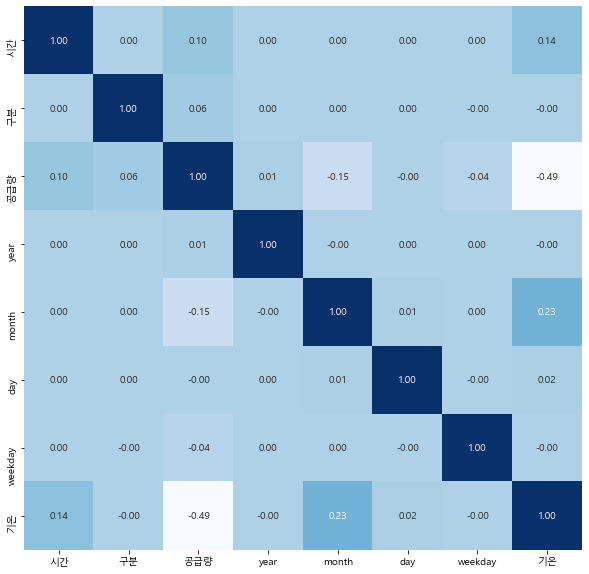

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False)

# 랜덤포레스트회귀 모델 기온 예측(2013-2018년)

### 훈련(2013-2018년)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
col = ['month', '구분', '시간']
X = df[col]
y = df['기온']

### 다항 특성

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 9), (92022, 9), (276066,), (92022,))

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [35]:
%%time
rf_r = RandomForestRegressor(n_jobs=3)
rf_r.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(rf_r, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(rf_r, X_test, y_test, cv=kfold).mean()

Wall time: 5min 14s


In [54]:
print("기온 예측 평가")
print(f"훈련 셋 결정계수 점수 = {rf_r.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {rf_r.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

기온 예측 평가
훈련 셋 결정계수 점수 = 0.9838874121764328
테스트 셋 결정계수 점수 = 0.9516676024289876
훈련 셋 교차검증 결정계수 = 0.9511810789164512
테스트 셋 교차검증 결정계수 = 0.9531157001047015


## 기온 예측하기(2019년)

### 2019년 데이터 불러오기

In [44]:
total = pd.read_csv('../data/test.csv')
total.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [45]:
total[['year', 'month', 'day', '시간', '구분']] = total['일자|시간|구분'].str.split(r'-| ').tolist()
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,A
1,2019-01-01 02 A,2019,01,01,02,A
2,2019-01-01 03 A,2019,01,01,03,A
3,2019-01-01 04 A,2019,01,01,04,A
4,2019-01-01 05 A,2019,01,01,05,A


In [46]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,0
1,2019-01-01 02 A,2019,01,01,02,0
2,2019-01-01 03 A,2019,01,01,03,0
3,2019-01-01 04 A,2019,01,01,04,0
4,2019-01-01 05 A,2019,01,01,05,0


In [47]:
# 2019년 입력 값
col = ['month', '구분', '시간']
temp_X = total[col]

### 다항특성

In [48]:
# 다항 특성
pol_temp_X = pol.transform(temp_X)
pol_temp_X.shape

(15120, 9)

#### 2019년 기온 예측

In [49]:
temp_pred = rf_r.predict(pol_temp_X)
temp_pred

array([-2.51155931, -2.35683147, -2.30641064, ...,  5.31930817,
        4.35784842,  3.81973572])

### 2019년 데이터(total)에 기온값 추가

In [50]:
total['기온'] = temp_pred
total.head()

,일자|시간|구분,year,month,day,시간,구분,기온
0,2019-01-01 01 A,2019,01,01,01,0,-2.511559
1,2019-01-01 02 A,2019,01,01,02,0,-2.356831
2,2019-01-01 03 A,2019,01,01,03,0,-2.306411
3,2019-01-01 04 A,2019,01,01,04,0,-2.550298
4,2019-01-01 05 A,2019,01,01,05,0,-2.801002


# 랜덤포레스트회귀 모델 가스공급량 훈련(2013-2018)

### 기온 포함해서 훈련(2013-2018)

In [51]:
# 훈련 특성(기온 포함)
col = ['month', '시간', '구분', '기온']
X = df[col]
y = df['공급량']

### 다항특성

In [52]:
# 다항 특성
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)
# 훈련, 검증 셋 분할
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
# 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 14), (92022, 14), (276066,), (92022,))

In [53]:
%%time
rf_r = RandomForestRegressor(n_jobs=3)
rf_r.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(rf_r, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(rf_r, X_test, y_test, cv=kfold).mean()

Wall time: 20min 47s


In [55]:
print("가스공급량 예측 평가")
print(f"훈련 셋 결정계수 점수 = {rf_r.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {rf_r.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

가스공급량 예측 평가
훈련 셋 결정계수 점수 = 0.9838874121764328
테스트 셋 결정계수 점수 = 0.9516676024289876
훈련 셋 교차검증 결정계수 = 0.9511810789164512
테스트 셋 교차검증 결정계수 = 0.9531157001047015


# 랜덤포레스트회귀 가스 공급량 예측(2019년)

### 기온 포함해서 예측(2019년)

In [56]:
# 2019년 가스공급량 예측(RF)
col = ['month', '시간', '구분', '기온']
final_X = total[col]

# 다항 특성
pol_final_X = pol.transform(final_X)

In [57]:
gas_pred = rf_r.predict(pol_final_X)

In [58]:
# 데이터 셋으로 만들기
pred_rf = pd.DataFrame({'공급량':gas_pred})
pred_rf.describe()

,공급량
count,15120.000000
mean,1540.457216
std,1065.491546
min,100.503943
25%,490.319223
50%,1442.117477
75%,2286.562432
max,4475.814776


In [59]:
pred_rf.loc[pred_rf['공급량']< 0, '공급량'] = 0
pred_rf.describe()

,공급량
count,15120.000000
mean,1540.457216
std,1065.491546
min,100.503943
25%,490.319223
50%,1442.117477
75%,2286.562432
max,4475.814776


# [CatBoost]

# 가스공급량과 기온 데이터 불러오기(2013-2018년)

In [60]:
df = pd.read_csv('../2013-2018년_가스공급량과_기온2.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4


## catboost회귀 모델 기온 예측(2013-2018년)

### 훈련(2013-2018년)

In [61]:
col = ['month', '구분', '시간']
X = df[col]
y = df['기온']

In [62]:
# 다항 특성
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)
# 훈련, 검증 셋 분할
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
# 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 9), (92022, 9), (276066,), (92022,))

In [63]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

In [64]:
%%time
cb = CatBoostRegressor()
cb.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold).mean()

Learning rate set to 0.099508
0:	learn: 9.6140525	total: 209ms	remaining: 3m 28s
1:	learn: 8.9035744	total: 239ms	remaining: 1m 59s
2:	learn: 8.2709255	total: 269ms	remaining: 1m 29s
3:	learn: 7.7228521	total: 298ms	remaining: 1m 14s
4:	learn: 7.2260020	total: 328ms	remaining: 1m 5s
5:	learn: 6.7924337	total: 356ms	remaining: 59s
6:	learn: 6.3967026	total: 385ms	remaining: 54.6s
7:	learn: 6.0397386	total: 413ms	remaining: 51.2s
8:	learn: 5.7481863	total: 449ms	remaining: 49.5s
9:	learn: 5.4735061	total: 480ms	remaining: 47.6s
10:	learn: 5.2310555	total: 513ms	remaining: 46.1s
11:	learn: 5.0287899	total: 559ms	remaining: 46s
12:	learn: 4.8485680	total: 599ms	remaining: 45.5s
13:	learn: 4.6915289	total: 643ms	remaining: 45.3s
14:	learn: 4.5561181	total: 698ms	remaining: 45.9s
15:	learn: 4.4418381	total: 729ms	remaining: 44.8s
16:	learn: 4.3498169	total: 759ms	remaining: 43.9s
17:	learn: 4.2610059	total: 789ms	remaining: 43s
18:	learn: 4.1876242	total: 820ms	remaining: 42.4s
19:	learn: 4.

160:	learn: 3.6880437	total: 5.24s	remaining: 27.3s
161:	learn: 3.6879968	total: 5.27s	remaining: 27.3s
162:	learn: 3.6879676	total: 5.29s	remaining: 27.2s
163:	learn: 3.6879448	total: 5.32s	remaining: 27.1s
164:	learn: 3.6879281	total: 5.35s	remaining: 27.1s
165:	learn: 3.6878825	total: 5.38s	remaining: 27s
166:	learn: 3.6878497	total: 5.41s	remaining: 27s
167:	learn: 3.6878317	total: 5.44s	remaining: 26.9s
168:	learn: 3.6878110	total: 5.47s	remaining: 26.9s
169:	learn: 3.6877822	total: 5.5s	remaining: 26.9s
170:	learn: 3.6877665	total: 5.54s	remaining: 26.8s
171:	learn: 3.6877383	total: 5.56s	remaining: 26.8s
172:	learn: 3.6876966	total: 5.59s	remaining: 26.7s
173:	learn: 3.6876755	total: 5.62s	remaining: 26.7s
174:	learn: 3.6876620	total: 5.65s	remaining: 26.6s
175:	learn: 3.6876361	total: 5.68s	remaining: 26.6s
176:	learn: 3.6876018	total: 5.71s	remaining: 26.6s
177:	learn: 3.6875657	total: 5.74s	remaining: 26.5s
178:	learn: 3.6875294	total: 5.77s	remaining: 26.5s
179:	learn: 3.687

324:	learn: 3.6856296	total: 10.1s	remaining: 21s
325:	learn: 3.6856212	total: 10.2s	remaining: 21s
326:	learn: 3.6856141	total: 10.2s	remaining: 20.9s
327:	learn: 3.6856062	total: 10.2s	remaining: 20.9s
328:	learn: 3.6856001	total: 10.2s	remaining: 20.9s
329:	learn: 3.6855964	total: 10.3s	remaining: 20.8s
330:	learn: 3.6855846	total: 10.3s	remaining: 20.8s
331:	learn: 3.6855768	total: 10.3s	remaining: 20.8s
332:	learn: 3.6855716	total: 10.4s	remaining: 20.8s
333:	learn: 3.6855665	total: 10.4s	remaining: 20.7s
334:	learn: 3.6855605	total: 10.4s	remaining: 20.7s
335:	learn: 3.6855575	total: 10.5s	remaining: 20.7s
336:	learn: 3.6855507	total: 10.5s	remaining: 20.6s
337:	learn: 3.6855420	total: 10.5s	remaining: 20.6s
338:	learn: 3.6855350	total: 10.6s	remaining: 20.6s
339:	learn: 3.6855254	total: 10.6s	remaining: 20.6s
340:	learn: 3.6855210	total: 10.6s	remaining: 20.5s
341:	learn: 3.6855107	total: 10.7s	remaining: 20.5s
342:	learn: 3.6855039	total: 10.7s	remaining: 20.5s
343:	learn: 3.68

486:	learn: 3.6847997	total: 15.6s	remaining: 16.4s
487:	learn: 3.6847946	total: 15.6s	remaining: 16.4s
488:	learn: 3.6847898	total: 15.6s	remaining: 16.3s
489:	learn: 3.6847868	total: 15.7s	remaining: 16.3s
490:	learn: 3.6847829	total: 15.7s	remaining: 16.3s
491:	learn: 3.6847791	total: 15.7s	remaining: 16.2s
492:	learn: 3.6847769	total: 15.7s	remaining: 16.2s
493:	learn: 3.6847739	total: 15.8s	remaining: 16.2s
494:	learn: 3.6847722	total: 15.8s	remaining: 16.1s
495:	learn: 3.6847687	total: 15.8s	remaining: 16.1s
496:	learn: 3.6847660	total: 15.9s	remaining: 16.1s
497:	learn: 3.6847643	total: 15.9s	remaining: 16s
498:	learn: 3.6847603	total: 15.9s	remaining: 16s
499:	learn: 3.6847548	total: 16s	remaining: 16s
500:	learn: 3.6847485	total: 16s	remaining: 15.9s
501:	learn: 3.6847454	total: 16s	remaining: 15.9s
502:	learn: 3.6847411	total: 16.1s	remaining: 15.9s
503:	learn: 3.6847372	total: 16.1s	remaining: 15.9s
504:	learn: 3.6847342	total: 16.1s	remaining: 15.8s
505:	learn: 3.6847294	to

650:	learn: 3.6843400	total: 20.8s	remaining: 11.2s
651:	learn: 3.6843392	total: 20.8s	remaining: 11.1s
652:	learn: 3.6843365	total: 20.9s	remaining: 11.1s
653:	learn: 3.6843352	total: 20.9s	remaining: 11s
654:	learn: 3.6843318	total: 20.9s	remaining: 11s
655:	learn: 3.6843306	total: 20.9s	remaining: 11s
656:	learn: 3.6843284	total: 21s	remaining: 10.9s
657:	learn: 3.6843243	total: 21s	remaining: 10.9s
658:	learn: 3.6843234	total: 21s	remaining: 10.9s
659:	learn: 3.6843220	total: 21.1s	remaining: 10.9s
660:	learn: 3.6843210	total: 21.1s	remaining: 10.8s
661:	learn: 3.6843181	total: 21.1s	remaining: 10.8s
662:	learn: 3.6843173	total: 21.2s	remaining: 10.8s
663:	learn: 3.6843155	total: 21.2s	remaining: 10.7s
664:	learn: 3.6843119	total: 21.2s	remaining: 10.7s
665:	learn: 3.6843088	total: 21.3s	remaining: 10.7s
666:	learn: 3.6843056	total: 21.3s	remaining: 10.6s
667:	learn: 3.6843038	total: 21.3s	remaining: 10.6s
668:	learn: 3.6843017	total: 21.3s	remaining: 10.6s
669:	learn: 3.6842988	to

814:	learn: 3.6840436	total: 25.7s	remaining: 5.84s
815:	learn: 3.6840427	total: 25.8s	remaining: 5.81s
816:	learn: 3.6840413	total: 25.8s	remaining: 5.78s
817:	learn: 3.6840399	total: 25.8s	remaining: 5.74s
818:	learn: 3.6840373	total: 25.8s	remaining: 5.71s
819:	learn: 3.6840357	total: 25.9s	remaining: 5.68s
820:	learn: 3.6840329	total: 25.9s	remaining: 5.65s
821:	learn: 3.6840313	total: 25.9s	remaining: 5.62s
822:	learn: 3.6840291	total: 26s	remaining: 5.58s
823:	learn: 3.6840273	total: 26s	remaining: 5.55s
824:	learn: 3.6840263	total: 26s	remaining: 5.52s
825:	learn: 3.6840260	total: 26.1s	remaining: 5.49s
826:	learn: 3.6840247	total: 26.1s	remaining: 5.46s
827:	learn: 3.6840230	total: 26.1s	remaining: 5.43s
828:	learn: 3.6840222	total: 26.1s	remaining: 5.39s
829:	learn: 3.6840212	total: 26.2s	remaining: 5.36s
830:	learn: 3.6840203	total: 26.2s	remaining: 5.33s
831:	learn: 3.6840193	total: 26.2s	remaining: 5.3s
832:	learn: 3.6840174	total: 26.3s	remaining: 5.26s
833:	learn: 3.68401

975:	learn: 3.6838487	total: 30.5s	remaining: 750ms
976:	learn: 3.6838480	total: 30.5s	remaining: 719ms
977:	learn: 3.6838474	total: 30.6s	remaining: 687ms
978:	learn: 3.6838457	total: 30.6s	remaining: 656ms
979:	learn: 3.6838448	total: 30.6s	remaining: 625ms
980:	learn: 3.6838437	total: 30.6s	remaining: 594ms
981:	learn: 3.6838431	total: 30.7s	remaining: 562ms
982:	learn: 3.6838425	total: 30.7s	remaining: 531ms
983:	learn: 3.6838414	total: 30.7s	remaining: 500ms
984:	learn: 3.6838392	total: 30.8s	remaining: 469ms
985:	learn: 3.6838385	total: 30.8s	remaining: 437ms
986:	learn: 3.6838372	total: 30.8s	remaining: 406ms
987:	learn: 3.6838349	total: 30.9s	remaining: 375ms
988:	learn: 3.6838342	total: 30.9s	remaining: 344ms
989:	learn: 3.6838333	total: 30.9s	remaining: 312ms
990:	learn: 3.6838321	total: 31s	remaining: 281ms
991:	learn: 3.6838302	total: 31s	remaining: 250ms
992:	learn: 3.6838288	total: 31s	remaining: 219ms
993:	learn: 3.6838283	total: 31s	remaining: 187ms
994:	learn: 3.683827

143:	learn: 3.6830765	total: 3.46s	remaining: 20.6s
144:	learn: 3.6830325	total: 3.48s	remaining: 20.5s
145:	learn: 3.6829594	total: 3.51s	remaining: 20.5s
146:	learn: 3.6828908	total: 3.53s	remaining: 20.5s
147:	learn: 3.6828480	total: 3.56s	remaining: 20.5s
148:	learn: 3.6828311	total: 3.58s	remaining: 20.4s
149:	learn: 3.6828090	total: 3.6s	remaining: 20.4s
150:	learn: 3.6827767	total: 3.62s	remaining: 20.4s
151:	learn: 3.6827505	total: 3.64s	remaining: 20.3s
152:	learn: 3.6826885	total: 3.67s	remaining: 20.3s
153:	learn: 3.6826296	total: 3.7s	remaining: 20.3s
154:	learn: 3.6826022	total: 3.72s	remaining: 20.3s
155:	learn: 3.6825639	total: 3.74s	remaining: 20.2s
156:	learn: 3.6825454	total: 3.76s	remaining: 20.2s
157:	learn: 3.6825230	total: 3.78s	remaining: 20.2s
158:	learn: 3.6824907	total: 3.81s	remaining: 20.1s
159:	learn: 3.6824536	total: 3.83s	remaining: 20.1s
160:	learn: 3.6824094	total: 3.85s	remaining: 20.1s
161:	learn: 3.6823740	total: 3.88s	remaining: 20.1s
162:	learn: 3.

307:	learn: 3.6794778	total: 7.35s	remaining: 16.5s
308:	learn: 3.6794512	total: 7.37s	remaining: 16.5s
309:	learn: 3.6794372	total: 7.4s	remaining: 16.5s
310:	learn: 3.6794224	total: 7.42s	remaining: 16.4s
311:	learn: 3.6794087	total: 7.44s	remaining: 16.4s
312:	learn: 3.6793955	total: 7.47s	remaining: 16.4s
313:	learn: 3.6793874	total: 7.49s	remaining: 16.4s
314:	learn: 3.6793745	total: 7.51s	remaining: 16.3s
315:	learn: 3.6793671	total: 7.54s	remaining: 16.3s
316:	learn: 3.6793521	total: 7.56s	remaining: 16.3s
317:	learn: 3.6793381	total: 7.59s	remaining: 16.3s
318:	learn: 3.6793277	total: 7.61s	remaining: 16.2s
319:	learn: 3.6793123	total: 7.63s	remaining: 16.2s
320:	learn: 3.6793039	total: 7.65s	remaining: 16.2s
321:	learn: 3.6792876	total: 7.68s	remaining: 16.2s
322:	learn: 3.6792790	total: 7.7s	remaining: 16.1s
323:	learn: 3.6792623	total: 7.72s	remaining: 16.1s
324:	learn: 3.6792501	total: 7.75s	remaining: 16.1s
325:	learn: 3.6792368	total: 7.77s	remaining: 16.1s
326:	learn: 3.

470:	learn: 3.6780218	total: 11.3s	remaining: 12.6s
471:	learn: 3.6780162	total: 11.3s	remaining: 12.6s
472:	learn: 3.6780102	total: 11.3s	remaining: 12.6s
473:	learn: 3.6780040	total: 11.3s	remaining: 12.6s
474:	learn: 3.6780011	total: 11.3s	remaining: 12.5s
475:	learn: 3.6779957	total: 11.4s	remaining: 12.5s
476:	learn: 3.6779875	total: 11.4s	remaining: 12.5s
477:	learn: 3.6779775	total: 11.4s	remaining: 12.5s
478:	learn: 3.6779740	total: 11.4s	remaining: 12.4s
479:	learn: 3.6779682	total: 11.5s	remaining: 12.4s
480:	learn: 3.6779571	total: 11.5s	remaining: 12.4s
481:	learn: 3.6779485	total: 11.5s	remaining: 12.4s
482:	learn: 3.6779407	total: 11.5s	remaining: 12.3s
483:	learn: 3.6779384	total: 11.6s	remaining: 12.3s
484:	learn: 3.6779331	total: 11.6s	remaining: 12.3s
485:	learn: 3.6779281	total: 11.6s	remaining: 12.3s
486:	learn: 3.6779208	total: 11.6s	remaining: 12.2s
487:	learn: 3.6779159	total: 11.6s	remaining: 12.2s
488:	learn: 3.6779112	total: 11.7s	remaining: 12.2s
489:	learn: 

634:	learn: 3.6771595	total: 15.2s	remaining: 8.72s
635:	learn: 3.6771558	total: 15.2s	remaining: 8.69s
636:	learn: 3.6771545	total: 15.2s	remaining: 8.67s
637:	learn: 3.6771512	total: 15.2s	remaining: 8.64s
638:	learn: 3.6771495	total: 15.3s	remaining: 8.62s
639:	learn: 3.6771445	total: 15.3s	remaining: 8.6s
640:	learn: 3.6771407	total: 15.3s	remaining: 8.57s
641:	learn: 3.6771334	total: 15.3s	remaining: 8.55s
642:	learn: 3.6771303	total: 15.3s	remaining: 8.52s
643:	learn: 3.6771272	total: 15.4s	remaining: 8.5s
644:	learn: 3.6771228	total: 15.4s	remaining: 8.47s
645:	learn: 3.6771174	total: 15.4s	remaining: 8.45s
646:	learn: 3.6771120	total: 15.4s	remaining: 8.43s
647:	learn: 3.6771096	total: 15.5s	remaining: 8.4s
648:	learn: 3.6771058	total: 15.5s	remaining: 8.38s
649:	learn: 3.6771003	total: 15.5s	remaining: 8.36s
650:	learn: 3.6770960	total: 15.5s	remaining: 8.33s
651:	learn: 3.6770908	total: 15.6s	remaining: 8.31s
652:	learn: 3.6770872	total: 15.6s	remaining: 8.29s
653:	learn: 3.6

800:	learn: 3.6766133	total: 19.1s	remaining: 4.74s
801:	learn: 3.6766108	total: 19.1s	remaining: 4.72s
802:	learn: 3.6766071	total: 19.1s	remaining: 4.69s
803:	learn: 3.6766054	total: 19.2s	remaining: 4.67s
804:	learn: 3.6766041	total: 19.2s	remaining: 4.64s
805:	learn: 3.6766010	total: 19.2s	remaining: 4.62s
806:	learn: 3.6765955	total: 19.2s	remaining: 4.6s
807:	learn: 3.6765930	total: 19.2s	remaining: 4.57s
808:	learn: 3.6765910	total: 19.3s	remaining: 4.55s
809:	learn: 3.6765884	total: 19.3s	remaining: 4.53s
810:	learn: 3.6765859	total: 19.3s	remaining: 4.5s
811:	learn: 3.6765837	total: 19.3s	remaining: 4.48s
812:	learn: 3.6765820	total: 19.4s	remaining: 4.46s
813:	learn: 3.6765806	total: 19.4s	remaining: 4.43s
814:	learn: 3.6765779	total: 19.4s	remaining: 4.41s
815:	learn: 3.6765757	total: 19.4s	remaining: 4.38s
816:	learn: 3.6765723	total: 19.5s	remaining: 4.36s
817:	learn: 3.6765708	total: 19.5s	remaining: 4.33s
818:	learn: 3.6765682	total: 19.5s	remaining: 4.31s
819:	learn: 3.

966:	learn: 3.6762200	total: 23s	remaining: 786ms
967:	learn: 3.6762173	total: 23.1s	remaining: 762ms
968:	learn: 3.6762153	total: 23.1s	remaining: 739ms
969:	learn: 3.6762130	total: 23.1s	remaining: 715ms
970:	learn: 3.6762121	total: 23.1s	remaining: 691ms
971:	learn: 3.6762099	total: 23.2s	remaining: 667ms
972:	learn: 3.6762069	total: 23.2s	remaining: 643ms
973:	learn: 3.6762062	total: 23.2s	remaining: 619ms
974:	learn: 3.6762046	total: 23.2s	remaining: 596ms
975:	learn: 3.6762029	total: 23.2s	remaining: 572ms
976:	learn: 3.6761994	total: 23.3s	remaining: 548ms
977:	learn: 3.6761979	total: 23.3s	remaining: 524ms
978:	learn: 3.6761964	total: 23.3s	remaining: 500ms
979:	learn: 3.6761948	total: 23.3s	remaining: 476ms
980:	learn: 3.6761929	total: 23.4s	remaining: 453ms
981:	learn: 3.6761911	total: 23.4s	remaining: 429ms
982:	learn: 3.6761895	total: 23.4s	remaining: 405ms
983:	learn: 3.6761878	total: 23.4s	remaining: 381ms
984:	learn: 3.6761870	total: 23.5s	remaining: 357ms
985:	learn: 3.

132:	learn: 3.6871452	total: 3.3s	remaining: 21.5s
133:	learn: 3.6870890	total: 3.33s	remaining: 21.5s
134:	learn: 3.6870364	total: 3.35s	remaining: 21.5s
135:	learn: 3.6869537	total: 3.38s	remaining: 21.5s
136:	learn: 3.6868416	total: 3.4s	remaining: 21.4s
137:	learn: 3.6868103	total: 3.43s	remaining: 21.4s
138:	learn: 3.6867776	total: 3.45s	remaining: 21.4s
139:	learn: 3.6867362	total: 3.48s	remaining: 21.4s
140:	learn: 3.6866830	total: 3.5s	remaining: 21.3s
141:	learn: 3.6866265	total: 3.53s	remaining: 21.4s
142:	learn: 3.6865900	total: 3.56s	remaining: 21.3s
143:	learn: 3.6865044	total: 3.58s	remaining: 21.3s
144:	learn: 3.6864402	total: 3.6s	remaining: 21.3s
145:	learn: 3.6863794	total: 3.63s	remaining: 21.2s
146:	learn: 3.6863452	total: 3.65s	remaining: 21.2s
147:	learn: 3.6862691	total: 3.67s	remaining: 21.2s
148:	learn: 3.6862468	total: 3.69s	remaining: 21.1s
149:	learn: 3.6861956	total: 3.72s	remaining: 21.1s
150:	learn: 3.6861290	total: 3.75s	remaining: 21.1s
151:	learn: 3.68

293:	learn: 3.6826417	total: 7.15s	remaining: 17.2s
294:	learn: 3.6826294	total: 7.18s	remaining: 17.2s
295:	learn: 3.6826152	total: 7.2s	remaining: 17.1s
296:	learn: 3.6825989	total: 7.22s	remaining: 17.1s
297:	learn: 3.6825903	total: 7.25s	remaining: 17.1s
298:	learn: 3.6825775	total: 7.27s	remaining: 17s
299:	learn: 3.6825617	total: 7.29s	remaining: 17s
300:	learn: 3.6825462	total: 7.32s	remaining: 17s
301:	learn: 3.6825352	total: 7.34s	remaining: 17s
302:	learn: 3.6825275	total: 7.37s	remaining: 16.9s
303:	learn: 3.6825151	total: 7.39s	remaining: 16.9s
304:	learn: 3.6825010	total: 7.42s	remaining: 16.9s
305:	learn: 3.6824926	total: 7.44s	remaining: 16.9s
306:	learn: 3.6824803	total: 7.46s	remaining: 16.8s
307:	learn: 3.6824702	total: 7.48s	remaining: 16.8s
308:	learn: 3.6824535	total: 7.51s	remaining: 16.8s
309:	learn: 3.6824411	total: 7.53s	remaining: 16.8s
310:	learn: 3.6824291	total: 7.56s	remaining: 16.7s
311:	learn: 3.6824102	total: 7.59s	remaining: 16.7s
312:	learn: 3.6823983

454:	learn: 3.6811302	total: 11s	remaining: 13.1s
455:	learn: 3.6811190	total: 11s	remaining: 13.1s
456:	learn: 3.6811106	total: 11s	remaining: 13.1s
457:	learn: 3.6811047	total: 11s	remaining: 13s
458:	learn: 3.6810958	total: 11.1s	remaining: 13s
459:	learn: 3.6810884	total: 11.1s	remaining: 13s
460:	learn: 3.6810827	total: 11.1s	remaining: 13s
461:	learn: 3.6810738	total: 11.1s	remaining: 13s
462:	learn: 3.6810671	total: 11.1s	remaining: 12.9s
463:	learn: 3.6810574	total: 11.2s	remaining: 12.9s
464:	learn: 3.6810479	total: 11.2s	remaining: 12.9s
465:	learn: 3.6810420	total: 11.2s	remaining: 12.9s
466:	learn: 3.6810326	total: 11.2s	remaining: 12.8s
467:	learn: 3.6810248	total: 11.3s	remaining: 12.8s
468:	learn: 3.6810222	total: 11.3s	remaining: 12.8s
469:	learn: 3.6810183	total: 11.3s	remaining: 12.7s
470:	learn: 3.6810084	total: 11.3s	remaining: 12.7s
471:	learn: 3.6809991	total: 11.4s	remaining: 12.7s
472:	learn: 3.6809904	total: 11.4s	remaining: 12.7s
473:	learn: 3.6809820	total: 1

617:	learn: 3.6802450	total: 14.8s	remaining: 9.16s
618:	learn: 3.6802426	total: 14.8s	remaining: 9.13s
619:	learn: 3.6802351	total: 14.9s	remaining: 9.11s
620:	learn: 3.6802321	total: 14.9s	remaining: 9.09s
621:	learn: 3.6802284	total: 14.9s	remaining: 9.06s
622:	learn: 3.6802234	total: 14.9s	remaining: 9.04s
623:	learn: 3.6802193	total: 15s	remaining: 9.01s
624:	learn: 3.6802119	total: 15s	remaining: 8.98s
625:	learn: 3.6802079	total: 15s	remaining: 8.96s
626:	learn: 3.6802005	total: 15.1s	remaining: 8.96s
627:	learn: 3.6801973	total: 15.1s	remaining: 8.95s
628:	learn: 3.6801918	total: 15.1s	remaining: 8.93s
629:	learn: 3.6801886	total: 15.2s	remaining: 8.91s
630:	learn: 3.6801829	total: 15.2s	remaining: 8.89s
631:	learn: 3.6801779	total: 15.2s	remaining: 8.87s
632:	learn: 3.6801747	total: 15.3s	remaining: 8.84s
633:	learn: 3.6801718	total: 15.3s	remaining: 8.82s
634:	learn: 3.6801675	total: 15.3s	remaining: 8.79s
635:	learn: 3.6801585	total: 15.3s	remaining: 8.77s
636:	learn: 3.6801

776:	learn: 3.6796754	total: 18.7s	remaining: 5.37s
777:	learn: 3.6796691	total: 18.8s	remaining: 5.35s
778:	learn: 3.6796654	total: 18.8s	remaining: 5.33s
779:	learn: 3.6796622	total: 18.8s	remaining: 5.3s
780:	learn: 3.6796576	total: 18.8s	remaining: 5.28s
781:	learn: 3.6796561	total: 18.8s	remaining: 5.25s
782:	learn: 3.6796528	total: 18.9s	remaining: 5.23s
783:	learn: 3.6796512	total: 18.9s	remaining: 5.21s
784:	learn: 3.6796479	total: 18.9s	remaining: 5.18s
785:	learn: 3.6796432	total: 18.9s	remaining: 5.16s
786:	learn: 3.6796376	total: 19s	remaining: 5.13s
787:	learn: 3.6796335	total: 19s	remaining: 5.11s
788:	learn: 3.6796307	total: 19s	remaining: 5.08s
789:	learn: 3.6796272	total: 19s	remaining: 5.06s
790:	learn: 3.6796257	total: 19.1s	remaining: 5.04s
791:	learn: 3.6796216	total: 19.1s	remaining: 5.01s
792:	learn: 3.6796199	total: 19.1s	remaining: 4.99s
793:	learn: 3.6796174	total: 19.1s	remaining: 4.96s
794:	learn: 3.6796153	total: 19.2s	remaining: 4.94s
795:	learn: 3.6796116

940:	learn: 3.6792688	total: 22.6s	remaining: 1.42s
941:	learn: 3.6792673	total: 22.6s	remaining: 1.39s
942:	learn: 3.6792631	total: 22.6s	remaining: 1.37s
943:	learn: 3.6792610	total: 22.7s	remaining: 1.34s
944:	learn: 3.6792602	total: 22.7s	remaining: 1.32s
945:	learn: 3.6792591	total: 22.7s	remaining: 1.29s
946:	learn: 3.6792566	total: 22.7s	remaining: 1.27s
947:	learn: 3.6792556	total: 22.7s	remaining: 1.25s
948:	learn: 3.6792542	total: 22.8s	remaining: 1.22s
949:	learn: 3.6792509	total: 22.8s	remaining: 1.2s
950:	learn: 3.6792498	total: 22.8s	remaining: 1.18s
951:	learn: 3.6792479	total: 22.8s	remaining: 1.15s
952:	learn: 3.6792449	total: 22.9s	remaining: 1.13s
953:	learn: 3.6792432	total: 22.9s	remaining: 1.1s
954:	learn: 3.6792405	total: 22.9s	remaining: 1.08s
955:	learn: 3.6792384	total: 22.9s	remaining: 1.05s
956:	learn: 3.6792362	total: 22.9s	remaining: 1.03s
957:	learn: 3.6792339	total: 23s	remaining: 1.01s
958:	learn: 3.6792324	total: 23s	remaining: 983ms
959:	learn: 3.6792

106:	learn: 3.6920961	total: 2.58s	remaining: 21.5s
107:	learn: 3.6920776	total: 2.6s	remaining: 21.5s
108:	learn: 3.6920330	total: 2.62s	remaining: 21.4s
109:	learn: 3.6920150	total: 2.64s	remaining: 21.4s
110:	learn: 3.6918539	total: 2.67s	remaining: 21.4s
111:	learn: 3.6917950	total: 2.69s	remaining: 21.3s
112:	learn: 3.6917306	total: 2.71s	remaining: 21.3s
113:	learn: 3.6915921	total: 2.74s	remaining: 21.3s
114:	learn: 3.6914013	total: 2.76s	remaining: 21.3s
115:	learn: 3.6912710	total: 2.79s	remaining: 21.3s
116:	learn: 3.6912264	total: 2.81s	remaining: 21.2s
117:	learn: 3.6912062	total: 2.83s	remaining: 21.2s
118:	learn: 3.6911302	total: 2.86s	remaining: 21.2s
119:	learn: 3.6909845	total: 2.88s	remaining: 21.1s
120:	learn: 3.6909231	total: 2.91s	remaining: 21.1s
121:	learn: 3.6908758	total: 2.93s	remaining: 21.1s
122:	learn: 3.6907809	total: 2.96s	remaining: 21.1s
123:	learn: 3.6907040	total: 2.98s	remaining: 21.1s
124:	learn: 3.6906609	total: 3.01s	remaining: 21.1s
125:	learn: 3

271:	learn: 3.6865644	total: 6.51s	remaining: 17.4s
272:	learn: 3.6865464	total: 6.53s	remaining: 17.4s
273:	learn: 3.6865230	total: 6.55s	remaining: 17.4s
274:	learn: 3.6865077	total: 6.58s	remaining: 17.3s
275:	learn: 3.6864985	total: 6.6s	remaining: 17.3s
276:	learn: 3.6864853	total: 6.62s	remaining: 17.3s
277:	learn: 3.6864652	total: 6.64s	remaining: 17.3s
278:	learn: 3.6864472	total: 6.67s	remaining: 17.2s
279:	learn: 3.6864330	total: 6.69s	remaining: 17.2s
280:	learn: 3.6864206	total: 6.72s	remaining: 17.2s
281:	learn: 3.6864062	total: 6.74s	remaining: 17.2s
282:	learn: 3.6864010	total: 6.76s	remaining: 17.1s
283:	learn: 3.6863937	total: 6.79s	remaining: 17.1s
284:	learn: 3.6863800	total: 6.81s	remaining: 17.1s
285:	learn: 3.6863635	total: 6.83s	remaining: 17.1s
286:	learn: 3.6863464	total: 6.86s	remaining: 17s
287:	learn: 3.6863362	total: 6.88s	remaining: 17s
288:	learn: 3.6863243	total: 6.9s	remaining: 17s
289:	learn: 3.6863091	total: 6.93s	remaining: 17s
290:	learn: 3.6862999	

432:	learn: 3.6849301	total: 10.4s	remaining: 13.6s
433:	learn: 3.6849232	total: 10.4s	remaining: 13.6s
434:	learn: 3.6849132	total: 10.4s	remaining: 13.5s
435:	learn: 3.6849049	total: 10.4s	remaining: 13.5s
436:	learn: 3.6848971	total: 10.5s	remaining: 13.5s
437:	learn: 3.6848870	total: 10.5s	remaining: 13.5s
438:	learn: 3.6848784	total: 10.5s	remaining: 13.4s
439:	learn: 3.6848728	total: 10.5s	remaining: 13.4s
440:	learn: 3.6848643	total: 10.6s	remaining: 13.4s
441:	learn: 3.6848529	total: 10.6s	remaining: 13.4s
442:	learn: 3.6848459	total: 10.6s	remaining: 13.3s
443:	learn: 3.6848402	total: 10.6s	remaining: 13.3s
444:	learn: 3.6848322	total: 10.7s	remaining: 13.3s
445:	learn: 3.6848245	total: 10.7s	remaining: 13.3s
446:	learn: 3.6848097	total: 10.7s	remaining: 13.3s
447:	learn: 3.6848078	total: 10.7s	remaining: 13.2s
448:	learn: 3.6848023	total: 10.8s	remaining: 13.2s
449:	learn: 3.6847887	total: 10.8s	remaining: 13.2s
450:	learn: 3.6847820	total: 10.8s	remaining: 13.2s
451:	learn: 

599:	learn: 3.6839082	total: 14.3s	remaining: 9.56s
600:	learn: 3.6839019	total: 14.4s	remaining: 9.54s
601:	learn: 3.6838975	total: 14.4s	remaining: 9.52s
602:	learn: 3.6838943	total: 14.4s	remaining: 9.49s
603:	learn: 3.6838885	total: 14.4s	remaining: 9.47s
604:	learn: 3.6838852	total: 14.5s	remaining: 9.44s
605:	learn: 3.6838777	total: 14.5s	remaining: 9.42s
606:	learn: 3.6838703	total: 14.5s	remaining: 9.4s
607:	learn: 3.6838691	total: 14.5s	remaining: 9.38s
608:	learn: 3.6838633	total: 14.6s	remaining: 9.35s
609:	learn: 3.6838599	total: 14.6s	remaining: 9.33s
610:	learn: 3.6838523	total: 14.6s	remaining: 9.31s
611:	learn: 3.6838458	total: 14.6s	remaining: 9.29s
612:	learn: 3.6838371	total: 14.7s	remaining: 9.26s
613:	learn: 3.6838294	total: 14.7s	remaining: 9.24s
614:	learn: 3.6838228	total: 14.7s	remaining: 9.21s
615:	learn: 3.6838206	total: 14.7s	remaining: 9.19s
616:	learn: 3.6838159	total: 14.8s	remaining: 9.16s
617:	learn: 3.6838114	total: 14.8s	remaining: 9.14s
618:	learn: 3

762:	learn: 3.6832955	total: 18.2s	remaining: 5.66s
763:	learn: 3.6832943	total: 18.2s	remaining: 5.63s
764:	learn: 3.6832874	total: 18.3s	remaining: 5.61s
765:	learn: 3.6832852	total: 18.3s	remaining: 5.59s
766:	learn: 3.6832825	total: 18.3s	remaining: 5.56s
767:	learn: 3.6832798	total: 18.3s	remaining: 5.54s
768:	learn: 3.6832775	total: 18.4s	remaining: 5.51s
769:	learn: 3.6832741	total: 18.4s	remaining: 5.49s
770:	learn: 3.6832722	total: 18.4s	remaining: 5.46s
771:	learn: 3.6832713	total: 18.4s	remaining: 5.44s
772:	learn: 3.6832694	total: 18.4s	remaining: 5.42s
773:	learn: 3.6832660	total: 18.5s	remaining: 5.4s
774:	learn: 3.6832644	total: 18.5s	remaining: 5.37s
775:	learn: 3.6832633	total: 18.5s	remaining: 5.35s
776:	learn: 3.6832612	total: 18.5s	remaining: 5.32s
777:	learn: 3.6832599	total: 18.6s	remaining: 5.3s
778:	learn: 3.6832564	total: 18.6s	remaining: 5.28s
779:	learn: 3.6832537	total: 18.6s	remaining: 5.25s
780:	learn: 3.6832495	total: 18.6s	remaining: 5.23s
781:	learn: 3.

926:	learn: 3.6828787	total: 22.1s	remaining: 1.74s
927:	learn: 3.6828760	total: 22.1s	remaining: 1.72s
928:	learn: 3.6828749	total: 22.1s	remaining: 1.69s
929:	learn: 3.6828740	total: 22.2s	remaining: 1.67s
930:	learn: 3.6828729	total: 22.2s	remaining: 1.64s
931:	learn: 3.6828713	total: 22.2s	remaining: 1.62s
932:	learn: 3.6828688	total: 22.2s	remaining: 1.6s
933:	learn: 3.6828673	total: 22.2s	remaining: 1.57s
934:	learn: 3.6828661	total: 22.3s	remaining: 1.55s
935:	learn: 3.6828636	total: 22.3s	remaining: 1.52s
936:	learn: 3.6828599	total: 22.3s	remaining: 1.5s
937:	learn: 3.6828587	total: 22.3s	remaining: 1.48s
938:	learn: 3.6828559	total: 22.4s	remaining: 1.45s
939:	learn: 3.6828542	total: 22.4s	remaining: 1.43s
940:	learn: 3.6828525	total: 22.4s	remaining: 1.41s
941:	learn: 3.6828488	total: 22.4s	remaining: 1.38s
942:	learn: 3.6828462	total: 22.5s	remaining: 1.36s
943:	learn: 3.6828450	total: 22.5s	remaining: 1.33s
944:	learn: 3.6828416	total: 22.5s	remaining: 1.31s
945:	learn: 3.

87:	learn: 3.6958221	total: 2.15s	remaining: 22.3s
88:	learn: 3.6957489	total: 2.18s	remaining: 22.3s
89:	learn: 3.6956360	total: 2.2s	remaining: 22.3s
90:	learn: 3.6955203	total: 2.23s	remaining: 22.2s
91:	learn: 3.6954131	total: 2.25s	remaining: 22.2s
92:	learn: 3.6952972	total: 2.27s	remaining: 22.2s
93:	learn: 3.6950682	total: 2.3s	remaining: 22.1s
94:	learn: 3.6949890	total: 2.32s	remaining: 22.1s
95:	learn: 3.6948364	total: 2.35s	remaining: 22.1s
96:	learn: 3.6947199	total: 2.37s	remaining: 22.1s
97:	learn: 3.6946637	total: 2.4s	remaining: 22.1s
98:	learn: 3.6945748	total: 2.42s	remaining: 22s
99:	learn: 3.6944388	total: 2.44s	remaining: 22s
100:	learn: 3.6943554	total: 2.46s	remaining: 21.9s
101:	learn: 3.6942684	total: 2.49s	remaining: 21.9s
102:	learn: 3.6941530	total: 2.51s	remaining: 21.9s
103:	learn: 3.6941064	total: 2.54s	remaining: 21.9s
104:	learn: 3.6940300	total: 2.56s	remaining: 21.8s
105:	learn: 3.6939455	total: 2.59s	remaining: 21.8s
106:	learn: 3.6938362	total: 2.6

250:	learn: 3.6878740	total: 6.03s	remaining: 18s
251:	learn: 3.6878563	total: 6.06s	remaining: 18s
252:	learn: 3.6878385	total: 6.08s	remaining: 18s
253:	learn: 3.6878224	total: 6.1s	remaining: 17.9s
254:	learn: 3.6878053	total: 6.12s	remaining: 17.9s
255:	learn: 3.6877870	total: 6.15s	remaining: 17.9s
256:	learn: 3.6877670	total: 6.17s	remaining: 17.8s
257:	learn: 3.6877403	total: 6.2s	remaining: 17.8s
258:	learn: 3.6877315	total: 6.22s	remaining: 17.8s
259:	learn: 3.6877142	total: 6.24s	remaining: 17.8s
260:	learn: 3.6876956	total: 6.27s	remaining: 17.7s
261:	learn: 3.6876759	total: 6.29s	remaining: 17.7s
262:	learn: 3.6876631	total: 6.31s	remaining: 17.7s
263:	learn: 3.6876552	total: 6.33s	remaining: 17.7s
264:	learn: 3.6876398	total: 6.36s	remaining: 17.6s
265:	learn: 3.6876115	total: 6.38s	remaining: 17.6s
266:	learn: 3.6876002	total: 6.4s	remaining: 17.6s
267:	learn: 3.6875840	total: 6.42s	remaining: 17.6s
268:	learn: 3.6875730	total: 6.45s	remaining: 17.5s
269:	learn: 3.6875619

411:	learn: 3.6859318	total: 9.91s	remaining: 14.1s
412:	learn: 3.6859229	total: 9.93s	remaining: 14.1s
413:	learn: 3.6859148	total: 9.96s	remaining: 14.1s
414:	learn: 3.6859048	total: 9.98s	remaining: 14.1s
415:	learn: 3.6858997	total: 10s	remaining: 14s
416:	learn: 3.6858925	total: 10s	remaining: 14s
417:	learn: 3.6858814	total: 10.1s	remaining: 14s
418:	learn: 3.6858759	total: 10.1s	remaining: 14s
419:	learn: 3.6858615	total: 10.1s	remaining: 13.9s
420:	learn: 3.6858528	total: 10.1s	remaining: 13.9s
421:	learn: 3.6858475	total: 10.2s	remaining: 13.9s
422:	learn: 3.6858392	total: 10.2s	remaining: 13.9s
423:	learn: 3.6858228	total: 10.2s	remaining: 13.9s
424:	learn: 3.6858182	total: 10.2s	remaining: 13.8s
425:	learn: 3.6858137	total: 10.2s	remaining: 13.8s
426:	learn: 3.6858018	total: 10.3s	remaining: 13.8s
427:	learn: 3.6857909	total: 10.3s	remaining: 13.7s
428:	learn: 3.6857829	total: 10.3s	remaining: 13.7s
429:	learn: 3.6857715	total: 10.3s	remaining: 13.7s
430:	learn: 3.6857639	to

575:	learn: 3.6848275	total: 13.8s	remaining: 10.2s
576:	learn: 3.6848245	total: 13.8s	remaining: 10.1s
577:	learn: 3.6848178	total: 13.9s	remaining: 10.1s
578:	learn: 3.6848114	total: 13.9s	remaining: 10.1s
579:	learn: 3.6848034	total: 13.9s	remaining: 10.1s
580:	learn: 3.6847971	total: 13.9s	remaining: 10s
581:	learn: 3.6847909	total: 13.9s	remaining: 10s
582:	learn: 3.6847833	total: 14s	remaining: 9.99s
583:	learn: 3.6847796	total: 14s	remaining: 9.97s
584:	learn: 3.6847728	total: 14s	remaining: 9.95s
585:	learn: 3.6847696	total: 14.1s	remaining: 9.93s
586:	learn: 3.6847640	total: 14.1s	remaining: 9.9s
587:	learn: 3.6847571	total: 14.1s	remaining: 9.88s
588:	learn: 3.6847512	total: 14.1s	remaining: 9.85s
589:	learn: 3.6847462	total: 14.1s	remaining: 9.83s
590:	learn: 3.6847418	total: 14.2s	remaining: 9.8s
591:	learn: 3.6847355	total: 14.2s	remaining: 9.78s
592:	learn: 3.6847336	total: 14.2s	remaining: 9.75s
593:	learn: 3.6847290	total: 14.2s	remaining: 9.73s
594:	learn: 3.6847263	to

736:	learn: 3.6841432	total: 17.6s	remaining: 6.3s
737:	learn: 3.6841396	total: 17.7s	remaining: 6.27s
738:	learn: 3.6841368	total: 17.7s	remaining: 6.25s
739:	learn: 3.6841338	total: 17.7s	remaining: 6.22s
740:	learn: 3.6841317	total: 17.7s	remaining: 6.2s
741:	learn: 3.6841300	total: 17.8s	remaining: 6.17s
742:	learn: 3.6841281	total: 17.8s	remaining: 6.15s
743:	learn: 3.6841257	total: 17.8s	remaining: 6.13s
744:	learn: 3.6841215	total: 17.8s	remaining: 6.1s
745:	learn: 3.6841200	total: 17.8s	remaining: 6.08s
746:	learn: 3.6841169	total: 17.9s	remaining: 6.05s
747:	learn: 3.6841126	total: 17.9s	remaining: 6.03s
748:	learn: 3.6841094	total: 17.9s	remaining: 6s
749:	learn: 3.6841049	total: 17.9s	remaining: 5.98s
750:	learn: 3.6841022	total: 18s	remaining: 5.96s
751:	learn: 3.6840991	total: 18s	remaining: 5.93s
752:	learn: 3.6840943	total: 18s	remaining: 5.91s
753:	learn: 3.6840916	total: 18s	remaining: 5.88s
754:	learn: 3.6840871	total: 18.1s	remaining: 5.86s
755:	learn: 3.6840827	tota

901:	learn: 3.6836474	total: 21.5s	remaining: 2.34s
902:	learn: 3.6836461	total: 21.5s	remaining: 2.31s
903:	learn: 3.6836445	total: 21.6s	remaining: 2.29s
904:	learn: 3.6836429	total: 21.6s	remaining: 2.27s
905:	learn: 3.6836379	total: 21.6s	remaining: 2.24s
906:	learn: 3.6836364	total: 21.6s	remaining: 2.22s
907:	learn: 3.6836339	total: 21.7s	remaining: 2.19s
908:	learn: 3.6836315	total: 21.7s	remaining: 2.17s
909:	learn: 3.6836302	total: 21.7s	remaining: 2.15s
910:	learn: 3.6836272	total: 21.7s	remaining: 2.12s
911:	learn: 3.6836249	total: 21.8s	remaining: 2.1s
912:	learn: 3.6836225	total: 21.8s	remaining: 2.08s
913:	learn: 3.6836197	total: 21.8s	remaining: 2.05s
914:	learn: 3.6836178	total: 21.8s	remaining: 2.03s
915:	learn: 3.6836161	total: 21.8s	remaining: 2s
916:	learn: 3.6836128	total: 21.9s	remaining: 1.98s
917:	learn: 3.6836112	total: 21.9s	remaining: 1.96s
918:	learn: 3.6836084	total: 21.9s	remaining: 1.93s
919:	learn: 3.6836030	total: 21.9s	remaining: 1.91s
920:	learn: 3.68

61:	learn: 3.7033481	total: 1.51s	remaining: 22.8s
62:	learn: 3.7029228	total: 1.53s	remaining: 22.8s
63:	learn: 3.7023001	total: 1.56s	remaining: 22.8s
64:	learn: 3.7017712	total: 1.58s	remaining: 22.7s
65:	learn: 3.7014384	total: 1.6s	remaining: 22.7s
66:	learn: 3.7010091	total: 1.63s	remaining: 22.7s
67:	learn: 3.7005520	total: 1.65s	remaining: 22.6s
68:	learn: 3.7001082	total: 1.67s	remaining: 22.6s
69:	learn: 3.6998819	total: 1.69s	remaining: 22.5s
70:	learn: 3.6996747	total: 1.72s	remaining: 22.5s
71:	learn: 3.6992099	total: 1.74s	remaining: 22.5s
72:	learn: 3.6988460	total: 1.76s	remaining: 22.4s
73:	learn: 3.6985588	total: 1.79s	remaining: 22.4s
74:	learn: 3.6982211	total: 1.81s	remaining: 22.4s
75:	learn: 3.6979985	total: 1.84s	remaining: 22.3s
76:	learn: 3.6977672	total: 1.86s	remaining: 22.3s
77:	learn: 3.6974900	total: 1.89s	remaining: 22.3s
78:	learn: 3.6973840	total: 1.91s	remaining: 22.2s
79:	learn: 3.6972487	total: 1.93s	remaining: 22.2s
80:	learn: 3.6970741	total: 1.96

222:	learn: 3.6883352	total: 5.33s	remaining: 18.6s
223:	learn: 3.6883140	total: 5.35s	remaining: 18.5s
224:	learn: 3.6882791	total: 5.38s	remaining: 18.5s
225:	learn: 3.6882665	total: 5.4s	remaining: 18.5s
226:	learn: 3.6882487	total: 5.42s	remaining: 18.5s
227:	learn: 3.6882214	total: 5.45s	remaining: 18.4s
228:	learn: 3.6882077	total: 5.47s	remaining: 18.4s
229:	learn: 3.6881897	total: 5.49s	remaining: 18.4s
230:	learn: 3.6881774	total: 5.51s	remaining: 18.3s
231:	learn: 3.6881647	total: 5.54s	remaining: 18.3s
232:	learn: 3.6881521	total: 5.57s	remaining: 18.3s
233:	learn: 3.6881308	total: 5.59s	remaining: 18.3s
234:	learn: 3.6881111	total: 5.61s	remaining: 18.3s
235:	learn: 3.6880958	total: 5.64s	remaining: 18.2s
236:	learn: 3.6880722	total: 5.66s	remaining: 18.2s
237:	learn: 3.6880552	total: 5.68s	remaining: 18.2s
238:	learn: 3.6880269	total: 5.71s	remaining: 18.2s
239:	learn: 3.6880133	total: 5.73s	remaining: 18.1s
240:	learn: 3.6879940	total: 5.75s	remaining: 18.1s
241:	learn: 3

385:	learn: 3.6862370	total: 9.2s	remaining: 14.6s
386:	learn: 3.6862298	total: 9.22s	remaining: 14.6s
387:	learn: 3.6862199	total: 9.24s	remaining: 14.6s
388:	learn: 3.6862110	total: 9.26s	remaining: 14.6s
389:	learn: 3.6862043	total: 9.29s	remaining: 14.5s
390:	learn: 3.6861944	total: 9.31s	remaining: 14.5s
391:	learn: 3.6861893	total: 9.33s	remaining: 14.5s
392:	learn: 3.6861821	total: 9.36s	remaining: 14.4s
393:	learn: 3.6861707	total: 9.38s	remaining: 14.4s
394:	learn: 3.6861638	total: 9.41s	remaining: 14.4s
395:	learn: 3.6861509	total: 9.43s	remaining: 14.4s
396:	learn: 3.6861362	total: 9.45s	remaining: 14.4s
397:	learn: 3.6861308	total: 9.48s	remaining: 14.3s
398:	learn: 3.6861247	total: 9.5s	remaining: 14.3s
399:	learn: 3.6861206	total: 9.52s	remaining: 14.3s
400:	learn: 3.6861135	total: 9.54s	remaining: 14.3s
401:	learn: 3.6861067	total: 9.57s	remaining: 14.2s
402:	learn: 3.6860962	total: 9.6s	remaining: 14.2s
403:	learn: 3.6860893	total: 9.62s	remaining: 14.2s
404:	learn: 3.6

549:	learn: 3.6851584	total: 13.1s	remaining: 10.7s
550:	learn: 3.6851528	total: 13.1s	remaining: 10.7s
551:	learn: 3.6851469	total: 13.1s	remaining: 10.7s
552:	learn: 3.6851405	total: 13.2s	remaining: 10.6s
553:	learn: 3.6851312	total: 13.2s	remaining: 10.6s
554:	learn: 3.6851201	total: 13.2s	remaining: 10.6s
555:	learn: 3.6851142	total: 13.2s	remaining: 10.6s
556:	learn: 3.6851101	total: 13.3s	remaining: 10.6s
557:	learn: 3.6851044	total: 13.3s	remaining: 10.5s
558:	learn: 3.6851004	total: 13.3s	remaining: 10.5s
559:	learn: 3.6850967	total: 13.3s	remaining: 10.5s
560:	learn: 3.6850946	total: 13.4s	remaining: 10.5s
561:	learn: 3.6850897	total: 13.4s	remaining: 10.4s
562:	learn: 3.6850829	total: 13.4s	remaining: 10.4s
563:	learn: 3.6850745	total: 13.4s	remaining: 10.4s
564:	learn: 3.6850682	total: 13.5s	remaining: 10.4s
565:	learn: 3.6850657	total: 13.5s	remaining: 10.3s
566:	learn: 3.6850635	total: 13.5s	remaining: 10.3s
567:	learn: 3.6850583	total: 13.5s	remaining: 10.3s
568:	learn: 

713:	learn: 3.6844225	total: 17s	remaining: 6.8s
714:	learn: 3.6844207	total: 17s	remaining: 6.78s
715:	learn: 3.6844162	total: 17s	remaining: 6.75s
716:	learn: 3.6844133	total: 17.1s	remaining: 6.73s
717:	learn: 3.6844113	total: 17.1s	remaining: 6.71s
718:	learn: 3.6844069	total: 17.1s	remaining: 6.68s
719:	learn: 3.6844026	total: 17.1s	remaining: 6.66s
720:	learn: 3.6844009	total: 17.1s	remaining: 6.64s
721:	learn: 3.6843958	total: 17.2s	remaining: 6.61s
722:	learn: 3.6843917	total: 17.2s	remaining: 6.59s
723:	learn: 3.6843905	total: 17.2s	remaining: 6.57s
724:	learn: 3.6843891	total: 17.2s	remaining: 6.54s
725:	learn: 3.6843856	total: 17.3s	remaining: 6.52s
726:	learn: 3.6843835	total: 17.3s	remaining: 6.49s
727:	learn: 3.6843802	total: 17.3s	remaining: 6.47s
728:	learn: 3.6843785	total: 17.3s	remaining: 6.44s
729:	learn: 3.6843754	total: 17.4s	remaining: 6.42s
730:	learn: 3.6843681	total: 17.4s	remaining: 6.39s
731:	learn: 3.6843654	total: 17.4s	remaining: 6.37s
732:	learn: 3.68436

877:	learn: 3.6839606	total: 20.9s	remaining: 2.9s
878:	learn: 3.6839574	total: 20.9s	remaining: 2.87s
879:	learn: 3.6839541	total: 20.9s	remaining: 2.85s
880:	learn: 3.6839501	total: 20.9s	remaining: 2.83s
881:	learn: 3.6839483	total: 20.9s	remaining: 2.8s
882:	learn: 3.6839445	total: 21s	remaining: 2.78s
883:	learn: 3.6839431	total: 21s	remaining: 2.75s
884:	learn: 3.6839395	total: 21s	remaining: 2.73s
885:	learn: 3.6839380	total: 21s	remaining: 2.71s
886:	learn: 3.6839356	total: 21.1s	remaining: 2.68s
887:	learn: 3.6839301	total: 21.1s	remaining: 2.66s
888:	learn: 3.6839275	total: 21.1s	remaining: 2.64s
889:	learn: 3.6839245	total: 21.1s	remaining: 2.61s
890:	learn: 3.6839220	total: 21.2s	remaining: 2.59s
891:	learn: 3.6839194	total: 21.2s	remaining: 2.56s
892:	learn: 3.6839171	total: 21.2s	remaining: 2.54s
893:	learn: 3.6839156	total: 21.2s	remaining: 2.52s
894:	learn: 3.6839135	total: 21.3s	remaining: 2.49s
895:	learn: 3.6839104	total: 21.3s	remaining: 2.47s
896:	learn: 3.6839072	

55:	learn: 3.6920052	total: 548ms	remaining: 9.23s
56:	learn: 3.6907075	total: 558ms	remaining: 9.23s
57:	learn: 3.6892542	total: 568ms	remaining: 9.23s
58:	learn: 3.6877891	total: 577ms	remaining: 9.21s
59:	learn: 3.6864399	total: 586ms	remaining: 9.19s
60:	learn: 3.6852427	total: 597ms	remaining: 9.19s
61:	learn: 3.6841326	total: 608ms	remaining: 9.2s
62:	learn: 3.6834141	total: 617ms	remaining: 9.18s
63:	learn: 3.6826915	total: 626ms	remaining: 9.15s
64:	learn: 3.6819277	total: 634ms	remaining: 9.12s
65:	learn: 3.6811891	total: 643ms	remaining: 9.1s
66:	learn: 3.6804331	total: 652ms	remaining: 9.08s
67:	learn: 3.6796643	total: 660ms	remaining: 9.05s
68:	learn: 3.6791380	total: 669ms	remaining: 9.03s
69:	learn: 3.6784175	total: 678ms	remaining: 9.01s
70:	learn: 3.6775578	total: 687ms	remaining: 8.98s
71:	learn: 3.6770659	total: 696ms	remaining: 8.96s
72:	learn: 3.6765978	total: 704ms	remaining: 8.93s
73:	learn: 3.6759518	total: 712ms	remaining: 8.91s
74:	learn: 3.6755022	total: 721ms

222:	learn: 3.6544411	total: 2.08s	remaining: 7.24s
223:	learn: 3.6543442	total: 2.09s	remaining: 7.23s
224:	learn: 3.6542885	total: 2.1s	remaining: 7.22s
225:	learn: 3.6542324	total: 2.11s	remaining: 7.21s
226:	learn: 3.6541827	total: 2.12s	remaining: 7.2s
227:	learn: 3.6541142	total: 2.12s	remaining: 7.19s
228:	learn: 3.6540290	total: 2.13s	remaining: 7.18s
229:	learn: 3.6539602	total: 2.14s	remaining: 7.17s
230:	learn: 3.6538378	total: 2.15s	remaining: 7.15s
231:	learn: 3.6537667	total: 2.16s	remaining: 7.14s
232:	learn: 3.6536934	total: 2.17s	remaining: 7.13s
233:	learn: 3.6536208	total: 2.17s	remaining: 7.12s
234:	learn: 3.6535581	total: 2.18s	remaining: 7.11s
235:	learn: 3.6534927	total: 2.19s	remaining: 7.1s
236:	learn: 3.6534039	total: 2.2s	remaining: 7.09s
237:	learn: 3.6533469	total: 2.21s	remaining: 7.07s
238:	learn: 3.6532891	total: 2.22s	remaining: 7.06s
239:	learn: 3.6532058	total: 2.23s	remaining: 7.05s
240:	learn: 3.6531204	total: 2.23s	remaining: 7.04s
241:	learn: 3.65

396:	learn: 3.6447881	total: 3.81s	remaining: 5.79s
397:	learn: 3.6447284	total: 3.82s	remaining: 5.78s
398:	learn: 3.6446769	total: 3.83s	remaining: 5.77s
399:	learn: 3.6446496	total: 3.84s	remaining: 5.76s
400:	learn: 3.6446126	total: 3.85s	remaining: 5.75s
401:	learn: 3.6445585	total: 3.86s	remaining: 5.74s
402:	learn: 3.6445072	total: 3.87s	remaining: 5.73s
403:	learn: 3.6444529	total: 3.88s	remaining: 5.72s
404:	learn: 3.6444301	total: 3.88s	remaining: 5.71s
405:	learn: 3.6444044	total: 3.89s	remaining: 5.69s
406:	learn: 3.6443759	total: 3.9s	remaining: 5.68s
407:	learn: 3.6443384	total: 3.91s	remaining: 5.67s
408:	learn: 3.6442916	total: 3.92s	remaining: 5.66s
409:	learn: 3.6442578	total: 3.93s	remaining: 5.65s
410:	learn: 3.6442296	total: 3.94s	remaining: 5.64s
411:	learn: 3.6441705	total: 3.94s	remaining: 5.63s
412:	learn: 3.6441390	total: 3.95s	remaining: 5.62s
413:	learn: 3.6440918	total: 3.96s	remaining: 5.61s
414:	learn: 3.6440596	total: 3.97s	remaining: 5.6s
415:	learn: 3.

566:	learn: 3.6392311	total: 5.36s	remaining: 4.09s
567:	learn: 3.6392107	total: 5.37s	remaining: 4.08s
568:	learn: 3.6391661	total: 5.38s	remaining: 4.07s
569:	learn: 3.6391395	total: 5.39s	remaining: 4.06s
570:	learn: 3.6391218	total: 5.4s	remaining: 4.05s
571:	learn: 3.6391122	total: 5.41s	remaining: 4.04s
572:	learn: 3.6390874	total: 5.41s	remaining: 4.03s
573:	learn: 3.6390618	total: 5.42s	remaining: 4.03s
574:	learn: 3.6390306	total: 5.43s	remaining: 4.01s
575:	learn: 3.6390158	total: 5.44s	remaining: 4s
576:	learn: 3.6389951	total: 5.45s	remaining: 3.99s
577:	learn: 3.6389683	total: 5.46s	remaining: 3.98s
578:	learn: 3.6389440	total: 5.46s	remaining: 3.97s
579:	learn: 3.6389325	total: 5.47s	remaining: 3.96s
580:	learn: 3.6389071	total: 5.48s	remaining: 3.95s
581:	learn: 3.6388954	total: 5.49s	remaining: 3.94s
582:	learn: 3.6388709	total: 5.5s	remaining: 3.93s
583:	learn: 3.6388418	total: 5.51s	remaining: 3.92s
584:	learn: 3.6388104	total: 5.52s	remaining: 3.91s
585:	learn: 3.638

732:	learn: 3.6355731	total: 6.88s	remaining: 2.5s
733:	learn: 3.6355658	total: 6.89s	remaining: 2.5s
734:	learn: 3.6355334	total: 6.9s	remaining: 2.49s
735:	learn: 3.6355062	total: 6.91s	remaining: 2.48s
736:	learn: 3.6354786	total: 6.91s	remaining: 2.47s
737:	learn: 3.6354677	total: 6.92s	remaining: 2.46s
738:	learn: 3.6354478	total: 6.93s	remaining: 2.45s
739:	learn: 3.6354180	total: 6.94s	remaining: 2.44s
740:	learn: 3.6354100	total: 6.95s	remaining: 2.43s
741:	learn: 3.6353907	total: 6.96s	remaining: 2.42s
742:	learn: 3.6353652	total: 6.96s	remaining: 2.41s
743:	learn: 3.6353313	total: 6.97s	remaining: 2.4s
744:	learn: 3.6353145	total: 6.98s	remaining: 2.39s
745:	learn: 3.6352942	total: 6.99s	remaining: 2.38s
746:	learn: 3.6352671	total: 7s	remaining: 2.37s
747:	learn: 3.6352572	total: 7.01s	remaining: 2.36s
748:	learn: 3.6352242	total: 7.02s	remaining: 2.35s
749:	learn: 3.6351980	total: 7.03s	remaining: 2.34s
750:	learn: 3.6351684	total: 7.04s	remaining: 2.33s
751:	learn: 3.63516

901:	learn: 3.6327539	total: 8.4s	remaining: 913ms
902:	learn: 3.6327495	total: 8.41s	remaining: 904ms
903:	learn: 3.6327338	total: 8.42s	remaining: 894ms
904:	learn: 3.6327182	total: 8.43s	remaining: 885ms
905:	learn: 3.6326967	total: 8.44s	remaining: 876ms
906:	learn: 3.6326795	total: 8.45s	remaining: 866ms
907:	learn: 3.6326641	total: 8.46s	remaining: 857ms
908:	learn: 3.6326585	total: 8.47s	remaining: 848ms
909:	learn: 3.6326450	total: 8.47s	remaining: 838ms
910:	learn: 3.6326311	total: 8.48s	remaining: 829ms
911:	learn: 3.6326134	total: 8.49s	remaining: 820ms
912:	learn: 3.6326062	total: 8.5s	remaining: 810ms
913:	learn: 3.6325921	total: 8.51s	remaining: 801ms
914:	learn: 3.6325730	total: 8.52s	remaining: 791ms
915:	learn: 3.6325618	total: 8.53s	remaining: 782ms
916:	learn: 3.6325474	total: 8.54s	remaining: 773ms
917:	learn: 3.6325298	total: 8.55s	remaining: 763ms
918:	learn: 3.6325242	total: 8.56s	remaining: 754ms
919:	learn: 3.6325091	total: 8.57s	remaining: 745ms
920:	learn: 3.

75:	learn: 3.6968895	total: 717ms	remaining: 8.71s
76:	learn: 3.6965610	total: 726ms	remaining: 8.7s
77:	learn: 3.6959150	total: 736ms	remaining: 8.71s
78:	learn: 3.6953605	total: 747ms	remaining: 8.71s
79:	learn: 3.6950708	total: 756ms	remaining: 8.7s
80:	learn: 3.6949737	total: 765ms	remaining: 8.68s
81:	learn: 3.6947096	total: 774ms	remaining: 8.66s
82:	learn: 3.6943970	total: 782ms	remaining: 8.64s
83:	learn: 3.6939735	total: 791ms	remaining: 8.62s
84:	learn: 3.6937581	total: 798ms	remaining: 8.59s
85:	learn: 3.6934511	total: 807ms	remaining: 8.58s
86:	learn: 3.6932070	total: 817ms	remaining: 8.57s
87:	learn: 3.6929697	total: 826ms	remaining: 8.56s
88:	learn: 3.6927234	total: 835ms	remaining: 8.54s
89:	learn: 3.6924850	total: 844ms	remaining: 8.53s
90:	learn: 3.6921486	total: 854ms	remaining: 8.53s
91:	learn: 3.6919138	total: 862ms	remaining: 8.51s
92:	learn: 3.6917413	total: 871ms	remaining: 8.49s
93:	learn: 3.6917375	total: 876ms	remaining: 8.44s
94:	learn: 3.6916556	total: 884ms

240:	learn: 3.6747853	total: 2.22s	remaining: 7s
241:	learn: 3.6746898	total: 2.24s	remaining: 7.01s
242:	learn: 3.6746146	total: 2.25s	remaining: 7.01s
243:	learn: 3.6745291	total: 2.26s	remaining: 7s
244:	learn: 3.6745100	total: 2.27s	remaining: 6.99s
245:	learn: 3.6744101	total: 2.28s	remaining: 6.98s
246:	learn: 3.6743164	total: 2.29s	remaining: 6.97s
247:	learn: 3.6742459	total: 2.29s	remaining: 6.96s
248:	learn: 3.6741474	total: 2.31s	remaining: 6.95s
249:	learn: 3.6740908	total: 2.31s	remaining: 6.94s
250:	learn: 3.6740040	total: 2.32s	remaining: 6.93s
251:	learn: 3.6739487	total: 2.33s	remaining: 6.92s
252:	learn: 3.6738643	total: 2.34s	remaining: 6.91s
253:	learn: 3.6737905	total: 2.35s	remaining: 6.9s
254:	learn: 3.6737438	total: 2.36s	remaining: 6.89s
255:	learn: 3.6736956	total: 2.37s	remaining: 6.88s
256:	learn: 3.6736493	total: 2.38s	remaining: 6.87s
257:	learn: 3.6735607	total: 2.39s	remaining: 6.86s
258:	learn: 3.6734735	total: 2.4s	remaining: 6.86s
259:	learn: 3.673421

411:	learn: 3.6659635	total: 3.77s	remaining: 5.39s
412:	learn: 3.6659275	total: 3.79s	remaining: 5.38s
413:	learn: 3.6658931	total: 3.8s	remaining: 5.37s
414:	learn: 3.6658435	total: 3.81s	remaining: 5.37s
415:	learn: 3.6658141	total: 3.81s	remaining: 5.35s
416:	learn: 3.6657421	total: 3.82s	remaining: 5.34s
417:	learn: 3.6657090	total: 3.83s	remaining: 5.33s
418:	learn: 3.6656659	total: 3.84s	remaining: 5.32s
419:	learn: 3.6656233	total: 3.85s	remaining: 5.31s
420:	learn: 3.6656084	total: 3.85s	remaining: 5.3s
421:	learn: 3.6655767	total: 3.86s	remaining: 5.29s
422:	learn: 3.6655553	total: 3.87s	remaining: 5.28s
423:	learn: 3.6655035	total: 3.88s	remaining: 5.27s
424:	learn: 3.6654592	total: 3.89s	remaining: 5.26s
425:	learn: 3.6654103	total: 3.9s	remaining: 5.25s
426:	learn: 3.6653808	total: 3.9s	remaining: 5.24s
427:	learn: 3.6653463	total: 3.92s	remaining: 5.23s
428:	learn: 3.6653024	total: 3.92s	remaining: 5.22s
429:	learn: 3.6652598	total: 3.93s	remaining: 5.21s
430:	learn: 3.66

578:	learn: 3.6606563	total: 5.28s	remaining: 3.84s
579:	learn: 3.6606412	total: 5.29s	remaining: 3.83s
580:	learn: 3.6606165	total: 5.3s	remaining: 3.82s
581:	learn: 3.6605995	total: 5.31s	remaining: 3.81s
582:	learn: 3.6605752	total: 5.32s	remaining: 3.8s
583:	learn: 3.6605558	total: 5.33s	remaining: 3.79s
584:	learn: 3.6605307	total: 5.34s	remaining: 3.79s
585:	learn: 3.6604834	total: 5.34s	remaining: 3.78s
586:	learn: 3.6604753	total: 5.35s	remaining: 3.77s
587:	learn: 3.6604466	total: 5.36s	remaining: 3.76s
588:	learn: 3.6604198	total: 5.37s	remaining: 3.75s
589:	learn: 3.6603811	total: 5.38s	remaining: 3.74s
590:	learn: 3.6603682	total: 5.39s	remaining: 3.73s
591:	learn: 3.6603397	total: 5.39s	remaining: 3.72s
592:	learn: 3.6603227	total: 5.4s	remaining: 3.71s
593:	learn: 3.6602918	total: 5.41s	remaining: 3.7s
594:	learn: 3.6602669	total: 5.42s	remaining: 3.69s
595:	learn: 3.6602480	total: 5.43s	remaining: 3.68s
596:	learn: 3.6602306	total: 5.44s	remaining: 3.67s
597:	learn: 3.66

748:	learn: 3.6568115	total: 6.8s	remaining: 2.28s
749:	learn: 3.6567952	total: 6.81s	remaining: 2.27s
750:	learn: 3.6567772	total: 6.82s	remaining: 2.26s
751:	learn: 3.6567548	total: 6.83s	remaining: 2.25s
752:	learn: 3.6567393	total: 6.83s	remaining: 2.24s
753:	learn: 3.6567232	total: 6.84s	remaining: 2.23s
754:	learn: 3.6567082	total: 6.85s	remaining: 2.22s
755:	learn: 3.6566919	total: 6.86s	remaining: 2.21s
756:	learn: 3.6566648	total: 6.87s	remaining: 2.2s
757:	learn: 3.6566399	total: 6.88s	remaining: 2.2s
758:	learn: 3.6566173	total: 6.89s	remaining: 2.19s
759:	learn: 3.6566076	total: 6.9s	remaining: 2.18s
760:	learn: 3.6565858	total: 6.91s	remaining: 2.17s
761:	learn: 3.6565735	total: 6.91s	remaining: 2.16s
762:	learn: 3.6565604	total: 6.92s	remaining: 2.15s
763:	learn: 3.6565477	total: 6.93s	remaining: 2.14s
764:	learn: 3.6565361	total: 6.94s	remaining: 2.13s
765:	learn: 3.6565157	total: 6.95s	remaining: 2.12s
766:	learn: 3.6564972	total: 6.96s	remaining: 2.11s
767:	learn: 3.65

913:	learn: 3.6542189	total: 8.35s	remaining: 786ms
914:	learn: 3.6542047	total: 8.36s	remaining: 777ms
915:	learn: 3.6541960	total: 8.37s	remaining: 768ms
916:	learn: 3.6541813	total: 8.38s	remaining: 758ms
917:	learn: 3.6541696	total: 8.39s	remaining: 749ms
918:	learn: 3.6541627	total: 8.4s	remaining: 740ms
919:	learn: 3.6541563	total: 8.4s	remaining: 731ms
920:	learn: 3.6541335	total: 8.41s	remaining: 722ms
921:	learn: 3.6541195	total: 8.42s	remaining: 713ms
922:	learn: 3.6541099	total: 8.43s	remaining: 703ms
923:	learn: 3.6540847	total: 8.44s	remaining: 695ms
924:	learn: 3.6540678	total: 8.45s	remaining: 686ms
925:	learn: 3.6540555	total: 8.46s	remaining: 676ms
926:	learn: 3.6540426	total: 8.47s	remaining: 667ms
927:	learn: 3.6540329	total: 8.48s	remaining: 658ms
928:	learn: 3.6540281	total: 8.49s	remaining: 649ms
929:	learn: 3.6540166	total: 8.5s	remaining: 640ms
930:	learn: 3.6540057	total: 8.5s	remaining: 630ms
931:	learn: 3.6539747	total: 8.51s	remaining: 621ms
932:	learn: 3.65

77:	learn: 3.7024908	total: 736ms	remaining: 8.7s
78:	learn: 3.7020293	total: 746ms	remaining: 8.7s
79:	learn: 3.7017707	total: 757ms	remaining: 8.71s
80:	learn: 3.7013552	total: 766ms	remaining: 8.7s
81:	learn: 3.7010898	total: 776ms	remaining: 8.69s
82:	learn: 3.7007147	total: 785ms	remaining: 8.67s
83:	learn: 3.7003506	total: 793ms	remaining: 8.65s
84:	learn: 3.7000590	total: 802ms	remaining: 8.63s
85:	learn: 3.6997617	total: 810ms	remaining: 8.61s
86:	learn: 3.6995018	total: 819ms	remaining: 8.59s
87:	learn: 3.6993991	total: 827ms	remaining: 8.57s
88:	learn: 3.6991988	total: 836ms	remaining: 8.56s
89:	learn: 3.6990947	total: 845ms	remaining: 8.54s
90:	learn: 3.6988142	total: 854ms	remaining: 8.53s
91:	learn: 3.6986181	total: 862ms	remaining: 8.51s
92:	learn: 3.6984007	total: 873ms	remaining: 8.52s
93:	learn: 3.6981956	total: 882ms	remaining: 8.5s
94:	learn: 3.6979893	total: 891ms	remaining: 8.49s
95:	learn: 3.6977897	total: 900ms	remaining: 8.47s
96:	learn: 3.6976355	total: 909ms	r

242:	learn: 3.6827305	total: 2.24s	remaining: 6.99s
243:	learn: 3.6826701	total: 2.25s	remaining: 6.98s
244:	learn: 3.6825710	total: 2.26s	remaining: 6.97s
245:	learn: 3.6824746	total: 2.27s	remaining: 6.96s
246:	learn: 3.6824103	total: 2.28s	remaining: 6.96s
247:	learn: 3.6823352	total: 2.29s	remaining: 6.95s
248:	learn: 3.6822906	total: 2.3s	remaining: 6.94s
249:	learn: 3.6822127	total: 2.31s	remaining: 6.93s
250:	learn: 3.6821591	total: 2.32s	remaining: 6.92s
251:	learn: 3.6820898	total: 2.33s	remaining: 6.9s
252:	learn: 3.6820003	total: 2.33s	remaining: 6.89s
253:	learn: 3.6819256	total: 2.34s	remaining: 6.88s
254:	learn: 3.6818567	total: 2.35s	remaining: 6.87s
255:	learn: 3.6817886	total: 2.36s	remaining: 6.87s
256:	learn: 3.6817172	total: 2.37s	remaining: 6.86s
257:	learn: 3.6816471	total: 2.38s	remaining: 6.84s
258:	learn: 3.6815877	total: 2.39s	remaining: 6.83s
259:	learn: 3.6815303	total: 2.4s	remaining: 6.82s
260:	learn: 3.6814718	total: 2.41s	remaining: 6.81s
261:	learn: 3.6

412:	learn: 3.6740377	total: 3.79s	remaining: 5.38s
413:	learn: 3.6740175	total: 3.8s	remaining: 5.37s
414:	learn: 3.6739821	total: 3.81s	remaining: 5.37s
415:	learn: 3.6739440	total: 3.82s	remaining: 5.36s
416:	learn: 3.6739108	total: 3.83s	remaining: 5.35s
417:	learn: 3.6738680	total: 3.83s	remaining: 5.34s
418:	learn: 3.6738253	total: 3.84s	remaining: 5.33s
419:	learn: 3.6737647	total: 3.85s	remaining: 5.32s
420:	learn: 3.6737376	total: 3.86s	remaining: 5.31s
421:	learn: 3.6736742	total: 3.87s	remaining: 5.3s
422:	learn: 3.6736509	total: 3.88s	remaining: 5.29s
423:	learn: 3.6736153	total: 3.89s	remaining: 5.28s
424:	learn: 3.6735965	total: 3.89s	remaining: 5.27s
425:	learn: 3.6735563	total: 3.9s	remaining: 5.26s
426:	learn: 3.6735166	total: 3.91s	remaining: 5.25s
427:	learn: 3.6734842	total: 3.92s	remaining: 5.24s
428:	learn: 3.6734465	total: 3.93s	remaining: 5.23s
429:	learn: 3.6733984	total: 3.94s	remaining: 5.22s
430:	learn: 3.6733650	total: 3.95s	remaining: 5.21s
431:	learn: 3.6

580:	learn: 3.6687449	total: 5.32s	remaining: 3.84s
581:	learn: 3.6687086	total: 5.33s	remaining: 3.83s
582:	learn: 3.6686820	total: 5.34s	remaining: 3.82s
583:	learn: 3.6686714	total: 5.35s	remaining: 3.81s
584:	learn: 3.6686474	total: 5.36s	remaining: 3.8s
585:	learn: 3.6686087	total: 5.37s	remaining: 3.79s
586:	learn: 3.6685791	total: 5.38s	remaining: 3.78s
587:	learn: 3.6685648	total: 5.39s	remaining: 3.77s
588:	learn: 3.6685551	total: 5.39s	remaining: 3.77s
589:	learn: 3.6685340	total: 5.4s	remaining: 3.75s
590:	learn: 3.6684922	total: 5.41s	remaining: 3.75s
591:	learn: 3.6684797	total: 5.42s	remaining: 3.74s
592:	learn: 3.6684482	total: 5.43s	remaining: 3.73s
593:	learn: 3.6684197	total: 5.44s	remaining: 3.72s
594:	learn: 3.6683965	total: 5.45s	remaining: 3.71s
595:	learn: 3.6683566	total: 5.46s	remaining: 3.7s
596:	learn: 3.6683304	total: 5.47s	remaining: 3.69s
597:	learn: 3.6683115	total: 5.47s	remaining: 3.68s
598:	learn: 3.6682859	total: 5.48s	remaining: 3.67s
599:	learn: 3.6

755:	learn: 3.6651967	total: 6.88s	remaining: 2.22s
756:	learn: 3.6651853	total: 6.89s	remaining: 2.21s
757:	learn: 3.6651652	total: 6.9s	remaining: 2.2s
758:	learn: 3.6651603	total: 6.91s	remaining: 2.19s
759:	learn: 3.6651497	total: 6.91s	remaining: 2.18s
760:	learn: 3.6651399	total: 6.92s	remaining: 2.17s
761:	learn: 3.6651253	total: 6.93s	remaining: 2.16s
762:	learn: 3.6651157	total: 6.94s	remaining: 2.15s
763:	learn: 3.6650928	total: 6.95s	remaining: 2.15s
764:	learn: 3.6650640	total: 6.96s	remaining: 2.14s
765:	learn: 3.6650482	total: 6.97s	remaining: 2.13s
766:	learn: 3.6650257	total: 6.97s	remaining: 2.12s
767:	learn: 3.6650064	total: 6.98s	remaining: 2.11s
768:	learn: 3.6649841	total: 6.99s	remaining: 2.1s
769:	learn: 3.6649553	total: 7s	remaining: 2.09s
770:	learn: 3.6649491	total: 7.01s	remaining: 2.08s
771:	learn: 3.6649424	total: 7.02s	remaining: 2.07s
772:	learn: 3.6649116	total: 7.03s	remaining: 2.06s
773:	learn: 3.6648976	total: 7.04s	remaining: 2.05s
774:	learn: 3.6648

927:	learn: 3.6625671	total: 8.42s	remaining: 654ms
928:	learn: 3.6625407	total: 8.44s	remaining: 645ms
929:	learn: 3.6625245	total: 8.45s	remaining: 636ms
930:	learn: 3.6625151	total: 8.45s	remaining: 626ms
931:	learn: 3.6625123	total: 8.46s	remaining: 617ms
932:	learn: 3.6625052	total: 8.47s	remaining: 608ms
933:	learn: 3.6624886	total: 8.48s	remaining: 599ms
934:	learn: 3.6624643	total: 8.49s	remaining: 590ms
935:	learn: 3.6624543	total: 8.49s	remaining: 581ms
936:	learn: 3.6624262	total: 8.5s	remaining: 572ms
937:	learn: 3.6624196	total: 8.51s	remaining: 563ms
938:	learn: 3.6623984	total: 8.52s	remaining: 554ms
939:	learn: 3.6623848	total: 8.53s	remaining: 545ms
940:	learn: 3.6623755	total: 8.54s	remaining: 535ms
941:	learn: 3.6623675	total: 8.55s	remaining: 526ms
942:	learn: 3.6623468	total: 8.56s	remaining: 517ms
943:	learn: 3.6623286	total: 8.57s	remaining: 508ms
944:	learn: 3.6623158	total: 8.57s	remaining: 499ms
945:	learn: 3.6622963	total: 8.58s	remaining: 490ms
946:	learn: 3

98:	learn: 3.6910553	total: 923ms	remaining: 8.4s
99:	learn: 3.6908705	total: 933ms	remaining: 8.4s
100:	learn: 3.6907676	total: 943ms	remaining: 8.39s
101:	learn: 3.6905419	total: 952ms	remaining: 8.38s
102:	learn: 3.6904311	total: 960ms	remaining: 8.36s
103:	learn: 3.6902915	total: 969ms	remaining: 8.35s
104:	learn: 3.6902058	total: 978ms	remaining: 8.34s
105:	learn: 3.6900987	total: 987ms	remaining: 8.32s
106:	learn: 3.6899451	total: 998ms	remaining: 8.33s
107:	learn: 3.6897661	total: 1.01s	remaining: 8.33s
108:	learn: 3.6895405	total: 1.02s	remaining: 8.32s
109:	learn: 3.6894618	total: 1.03s	remaining: 8.3s
110:	learn: 3.6892293	total: 1.03s	remaining: 8.29s
111:	learn: 3.6890940	total: 1.04s	remaining: 8.28s
112:	learn: 3.6890011	total: 1.05s	remaining: 8.26s
113:	learn: 3.6888565	total: 1.06s	remaining: 8.24s
114:	learn: 3.6887322	total: 1.07s	remaining: 8.24s
115:	learn: 3.6885794	total: 1.08s	remaining: 8.23s
116:	learn: 3.6883946	total: 1.09s	remaining: 8.22s
117:	learn: 3.688

273:	learn: 3.6728930	total: 2.5s	remaining: 6.63s
274:	learn: 3.6728251	total: 2.51s	remaining: 6.62s
275:	learn: 3.6727529	total: 2.52s	remaining: 6.61s
276:	learn: 3.6726875	total: 2.53s	remaining: 6.61s
277:	learn: 3.6726283	total: 2.54s	remaining: 6.6s
278:	learn: 3.6725914	total: 2.55s	remaining: 6.58s
279:	learn: 3.6725537	total: 2.56s	remaining: 6.57s
280:	learn: 3.6724940	total: 2.56s	remaining: 6.56s
281:	learn: 3.6724541	total: 2.57s	remaining: 6.55s
282:	learn: 3.6724004	total: 2.58s	remaining: 6.54s
283:	learn: 3.6723468	total: 2.59s	remaining: 6.53s
284:	learn: 3.6722822	total: 2.6s	remaining: 6.52s
285:	learn: 3.6722147	total: 2.61s	remaining: 6.51s
286:	learn: 3.6721554	total: 2.62s	remaining: 6.51s
287:	learn: 3.6721111	total: 2.63s	remaining: 6.5s
288:	learn: 3.6720575	total: 2.64s	remaining: 6.49s
289:	learn: 3.6719938	total: 2.64s	remaining: 6.47s
290:	learn: 3.6719524	total: 2.65s	remaining: 6.47s
291:	learn: 3.6719144	total: 2.66s	remaining: 6.46s
292:	learn: 3.67

443:	learn: 3.6653707	total: 4.03s	remaining: 5.05s
444:	learn: 3.6653454	total: 4.04s	remaining: 5.04s
445:	learn: 3.6652848	total: 4.05s	remaining: 5.03s
446:	learn: 3.6652465	total: 4.06s	remaining: 5.02s
447:	learn: 3.6651955	total: 4.07s	remaining: 5.01s
448:	learn: 3.6651598	total: 4.08s	remaining: 5s
449:	learn: 3.6651410	total: 4.08s	remaining: 4.99s
450:	learn: 3.6651179	total: 4.09s	remaining: 4.98s
451:	learn: 3.6650864	total: 4.1s	remaining: 4.97s
452:	learn: 3.6650322	total: 4.11s	remaining: 4.96s
453:	learn: 3.6649675	total: 4.12s	remaining: 4.95s
454:	learn: 3.6649376	total: 4.13s	remaining: 4.95s
455:	learn: 3.6649144	total: 4.14s	remaining: 4.94s
456:	learn: 3.6648876	total: 4.15s	remaining: 4.93s
457:	learn: 3.6648297	total: 4.17s	remaining: 4.93s
458:	learn: 3.6648018	total: 4.18s	remaining: 4.93s
459:	learn: 3.6647614	total: 4.19s	remaining: 4.92s
460:	learn: 3.6647215	total: 4.2s	remaining: 4.91s
461:	learn: 3.6646789	total: 4.22s	remaining: 4.91s
462:	learn: 3.664

604:	learn: 3.6605484	total: 5.6s	remaining: 3.65s
605:	learn: 3.6605304	total: 5.61s	remaining: 3.65s
606:	learn: 3.6604953	total: 5.62s	remaining: 3.64s
607:	learn: 3.6604834	total: 5.62s	remaining: 3.63s
608:	learn: 3.6604659	total: 5.63s	remaining: 3.62s
609:	learn: 3.6604411	total: 5.64s	remaining: 3.61s
610:	learn: 3.6604133	total: 5.65s	remaining: 3.6s
611:	learn: 3.6603777	total: 5.66s	remaining: 3.59s
612:	learn: 3.6603562	total: 5.67s	remaining: 3.58s
613:	learn: 3.6603310	total: 5.68s	remaining: 3.57s
614:	learn: 3.6603205	total: 5.68s	remaining: 3.56s
615:	learn: 3.6602999	total: 5.69s	remaining: 3.55s
616:	learn: 3.6602770	total: 5.7s	remaining: 3.54s
617:	learn: 3.6602650	total: 5.71s	remaining: 3.53s
618:	learn: 3.6602433	total: 5.72s	remaining: 3.52s
619:	learn: 3.6602253	total: 5.73s	remaining: 3.51s
620:	learn: 3.6602047	total: 5.74s	remaining: 3.5s
621:	learn: 3.6601813	total: 5.75s	remaining: 3.49s
622:	learn: 3.6601656	total: 5.75s	remaining: 3.48s
623:	learn: 3.66

771:	learn: 3.6570355	total: 7.11s	remaining: 2.1s
772:	learn: 3.6570184	total: 7.12s	remaining: 2.09s
773:	learn: 3.6570029	total: 7.13s	remaining: 2.08s
774:	learn: 3.6569861	total: 7.14s	remaining: 2.07s
775:	learn: 3.6569687	total: 7.15s	remaining: 2.06s
776:	learn: 3.6569534	total: 7.16s	remaining: 2.05s
777:	learn: 3.6569255	total: 7.17s	remaining: 2.04s
778:	learn: 3.6569091	total: 7.17s	remaining: 2.04s
779:	learn: 3.6568871	total: 7.18s	remaining: 2.03s
780:	learn: 3.6568739	total: 7.19s	remaining: 2.02s
781:	learn: 3.6568522	total: 7.2s	remaining: 2.01s
782:	learn: 3.6568445	total: 7.21s	remaining: 2s
783:	learn: 3.6568274	total: 7.22s	remaining: 1.99s
784:	learn: 3.6568081	total: 7.23s	remaining: 1.98s
785:	learn: 3.6568011	total: 7.24s	remaining: 1.97s
786:	learn: 3.6567956	total: 7.24s	remaining: 1.96s
787:	learn: 3.6567868	total: 7.25s	remaining: 1.95s
788:	learn: 3.6567656	total: 7.26s	remaining: 1.94s
789:	learn: 3.6567579	total: 7.27s	remaining: 1.93s
790:	learn: 3.656

943:	learn: 3.6545362	total: 8.65s	remaining: 513ms
944:	learn: 3.6545167	total: 8.66s	remaining: 504ms
945:	learn: 3.6544957	total: 8.67s	remaining: 495ms
946:	learn: 3.6544798	total: 8.68s	remaining: 486ms
947:	learn: 3.6544710	total: 8.69s	remaining: 477ms
948:	learn: 3.6544531	total: 8.7s	remaining: 467ms
949:	learn: 3.6544313	total: 8.71s	remaining: 458ms
950:	learn: 3.6544264	total: 8.71s	remaining: 449ms
951:	learn: 3.6544177	total: 8.72s	remaining: 440ms
952:	learn: 3.6544045	total: 8.73s	remaining: 431ms
953:	learn: 3.6543936	total: 8.74s	remaining: 421ms
954:	learn: 3.6543778	total: 8.75s	remaining: 412ms
955:	learn: 3.6543665	total: 8.76s	remaining: 403ms
956:	learn: 3.6543596	total: 8.77s	remaining: 394ms
957:	learn: 3.6543525	total: 8.77s	remaining: 385ms
958:	learn: 3.6543321	total: 8.78s	remaining: 376ms
959:	learn: 3.6543212	total: 8.79s	remaining: 366ms
960:	learn: 3.6543093	total: 8.8s	remaining: 357ms
961:	learn: 3.6542942	total: 8.81s	remaining: 348ms
962:	learn: 3.

106:	learn: 3.6801300	total: 1.12s	remaining: 9.34s
107:	learn: 3.6799476	total: 1.13s	remaining: 9.34s
108:	learn: 3.6798073	total: 1.14s	remaining: 9.33s
109:	learn: 3.6796616	total: 1.15s	remaining: 9.32s
110:	learn: 3.6795745	total: 1.16s	remaining: 9.31s
111:	learn: 3.6794310	total: 1.17s	remaining: 9.29s
112:	learn: 3.6793313	total: 1.18s	remaining: 9.28s
113:	learn: 3.6792360	total: 1.19s	remaining: 9.28s
114:	learn: 3.6789110	total: 1.2s	remaining: 9.27s
115:	learn: 3.6788258	total: 1.21s	remaining: 9.25s
116:	learn: 3.6788005	total: 1.22s	remaining: 9.21s
117:	learn: 3.6786865	total: 1.23s	remaining: 9.2s
118:	learn: 3.6785851	total: 1.24s	remaining: 9.18s
119:	learn: 3.6784409	total: 1.25s	remaining: 9.17s
120:	learn: 3.6783225	total: 1.26s	remaining: 9.16s
121:	learn: 3.6782418	total: 1.27s	remaining: 9.15s
122:	learn: 3.6781435	total: 1.28s	remaining: 9.14s
123:	learn: 3.6779301	total: 1.29s	remaining: 9.13s
124:	learn: 3.6776812	total: 1.3s	remaining: 9.13s
125:	learn: 3.6

271:	learn: 3.6643298	total: 2.87s	remaining: 7.67s
272:	learn: 3.6642891	total: 2.88s	remaining: 7.67s
273:	learn: 3.6642118	total: 2.89s	remaining: 7.66s
274:	learn: 3.6641386	total: 2.9s	remaining: 7.64s
275:	learn: 3.6641080	total: 2.91s	remaining: 7.63s
276:	learn: 3.6640283	total: 2.92s	remaining: 7.62s
277:	learn: 3.6639822	total: 2.93s	remaining: 7.61s
278:	learn: 3.6639065	total: 2.94s	remaining: 7.59s
279:	learn: 3.6638686	total: 2.95s	remaining: 7.58s
280:	learn: 3.6637990	total: 2.96s	remaining: 7.57s
281:	learn: 3.6637337	total: 2.97s	remaining: 7.55s
282:	learn: 3.6636574	total: 2.98s	remaining: 7.55s
283:	learn: 3.6636147	total: 2.99s	remaining: 7.53s
284:	learn: 3.6635672	total: 3s	remaining: 7.52s
285:	learn: 3.6635317	total: 3.01s	remaining: 7.51s
286:	learn: 3.6634932	total: 3.02s	remaining: 7.5s
287:	learn: 3.6634363	total: 3.03s	remaining: 7.49s
288:	learn: 3.6633774	total: 3.04s	remaining: 7.48s
289:	learn: 3.6633380	total: 3.05s	remaining: 7.47s
290:	learn: 3.663

451:	learn: 3.6557877	total: 4.6s	remaining: 5.58s
452:	learn: 3.6557569	total: 4.61s	remaining: 5.57s
453:	learn: 3.6557042	total: 4.62s	remaining: 5.56s
454:	learn: 3.6556799	total: 4.63s	remaining: 5.54s
455:	learn: 3.6556370	total: 4.64s	remaining: 5.53s
456:	learn: 3.6556261	total: 4.64s	remaining: 5.52s
457:	learn: 3.6556065	total: 4.65s	remaining: 5.51s
458:	learn: 3.6555620	total: 4.66s	remaining: 5.5s
459:	learn: 3.6555410	total: 4.67s	remaining: 5.48s
460:	learn: 3.6555165	total: 4.68s	remaining: 5.47s
461:	learn: 3.6554883	total: 4.69s	remaining: 5.46s
462:	learn: 3.6554553	total: 4.7s	remaining: 5.45s
463:	learn: 3.6554320	total: 4.71s	remaining: 5.44s
464:	learn: 3.6553903	total: 4.71s	remaining: 5.42s
465:	learn: 3.6553637	total: 4.72s	remaining: 5.41s
466:	learn: 3.6553213	total: 4.73s	remaining: 5.4s
467:	learn: 3.6552934	total: 4.74s	remaining: 5.39s
468:	learn: 3.6552612	total: 4.75s	remaining: 5.38s
469:	learn: 3.6552429	total: 4.76s	remaining: 5.36s
470:	learn: 3.65

620:	learn: 3.6512039	total: 6.12s	remaining: 3.73s
621:	learn: 3.6511543	total: 6.13s	remaining: 3.72s
622:	learn: 3.6511244	total: 6.14s	remaining: 3.71s
623:	learn: 3.6510943	total: 6.15s	remaining: 3.7s
624:	learn: 3.6510714	total: 6.16s	remaining: 3.69s
625:	learn: 3.6510448	total: 6.16s	remaining: 3.68s
626:	learn: 3.6510345	total: 6.17s	remaining: 3.67s
627:	learn: 3.6510248	total: 6.18s	remaining: 3.66s
628:	learn: 3.6509970	total: 6.19s	remaining: 3.65s
629:	learn: 3.6509696	total: 6.2s	remaining: 3.64s
630:	learn: 3.6509463	total: 6.21s	remaining: 3.63s
631:	learn: 3.6509202	total: 6.21s	remaining: 3.62s
632:	learn: 3.6508911	total: 6.22s	remaining: 3.61s
633:	learn: 3.6508510	total: 6.23s	remaining: 3.6s
634:	learn: 3.6508224	total: 6.24s	remaining: 3.59s
635:	learn: 3.6507996	total: 6.25s	remaining: 3.58s
636:	learn: 3.6507656	total: 6.26s	remaining: 3.57s
637:	learn: 3.6507401	total: 6.27s	remaining: 3.56s
638:	learn: 3.6507318	total: 6.28s	remaining: 3.55s
639:	learn: 3.6

789:	learn: 3.6476898	total: 7.64s	remaining: 2.03s
790:	learn: 3.6476701	total: 7.65s	remaining: 2.02s
791:	learn: 3.6476612	total: 7.66s	remaining: 2.01s
792:	learn: 3.6476508	total: 7.67s	remaining: 2s
793:	learn: 3.6476241	total: 7.67s	remaining: 1.99s
794:	learn: 3.6475996	total: 7.68s	remaining: 1.98s
795:	learn: 3.6475811	total: 7.69s	remaining: 1.97s
796:	learn: 3.6475618	total: 7.7s	remaining: 1.96s
797:	learn: 3.6475464	total: 7.71s	remaining: 1.95s
798:	learn: 3.6475261	total: 7.72s	remaining: 1.94s
799:	learn: 3.6475184	total: 7.72s	remaining: 1.93s
800:	learn: 3.6474915	total: 7.73s	remaining: 1.92s
801:	learn: 3.6474828	total: 7.74s	remaining: 1.91s
802:	learn: 3.6474646	total: 7.75s	remaining: 1.9s
803:	learn: 3.6474591	total: 7.76s	remaining: 1.89s
804:	learn: 3.6474470	total: 7.77s	remaining: 1.88s
805:	learn: 3.6474271	total: 7.78s	remaining: 1.87s
806:	learn: 3.6474063	total: 7.79s	remaining: 1.86s
807:	learn: 3.6473836	total: 7.79s	remaining: 1.85s
808:	learn: 3.647

961:	learn: 3.6452366	total: 9.17s	remaining: 362ms
962:	learn: 3.6452137	total: 9.18s	remaining: 353ms
963:	learn: 3.6452054	total: 9.19s	remaining: 343ms
964:	learn: 3.6451998	total: 9.2s	remaining: 334ms
965:	learn: 3.6451778	total: 9.21s	remaining: 324ms
966:	learn: 3.6451673	total: 9.22s	remaining: 315ms
967:	learn: 3.6451596	total: 9.22s	remaining: 305ms
968:	learn: 3.6451513	total: 9.23s	remaining: 295ms
969:	learn: 3.6451253	total: 9.24s	remaining: 286ms
970:	learn: 3.6451190	total: 9.25s	remaining: 276ms
971:	learn: 3.6451150	total: 9.26s	remaining: 267ms
972:	learn: 3.6451057	total: 9.27s	remaining: 257ms
973:	learn: 3.6450922	total: 9.28s	remaining: 248ms
974:	learn: 3.6450731	total: 9.28s	remaining: 238ms
975:	learn: 3.6450463	total: 9.29s	remaining: 229ms
976:	learn: 3.6450410	total: 9.3s	remaining: 219ms
977:	learn: 3.6450221	total: 9.31s	remaining: 209ms
978:	learn: 3.6450037	total: 9.32s	remaining: 200ms
979:	learn: 3.6449940	total: 9.33s	remaining: 190ms
980:	learn: 3.

In [65]:
print("기온 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

기온 예측 평가
훈련 셋 결정계수 점수 = 0.8753029607563801
테스트 셋 결정계수 점수 = 0.8749026584707443
훈련 셋 교차검증 결정계수 = 0.8739948750305032
테스트 셋 교차검증 결정계수 = 0.873850147645534


# 기온 예측하기(2019년)

### 2019년 데이터 불러오기

In [66]:
total = pd.read_csv('../data/test.csv')
total.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [67]:
total[['year', 'month', 'day', '시간', '구분']] = total['일자|시간|구분'].str.split(r'-| ').tolist()
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,A
1,2019-01-01 02 A,2019,01,01,02,A
2,2019-01-01 03 A,2019,01,01,03,A
3,2019-01-01 04 A,2019,01,01,04,A
4,2019-01-01 05 A,2019,01,01,05,A


In [68]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,0
1,2019-01-01 02 A,2019,01,01,02,0
2,2019-01-01 03 A,2019,01,01,03,0
3,2019-01-01 04 A,2019,01,01,04,0
4,2019-01-01 05 A,2019,01,01,05,0


In [69]:
# 2019년 입력 값
col = ['month', '구분', '시간']
temp_X = total[col]

#### 2019년 기온 예측

In [70]:
# 다항 특성
pol_temp_X = pol.transform(temp_X)
pol_temp_X.shape

(15120, 9)

In [71]:
temp_pred = cb.predict(pol_temp_X)
temp_pred

array([-2.4292753 , -2.32541336, -2.33484656, ...,  5.33795838,
        4.33721617,  3.85645493])

### 2019년 데이터(total)에 기온값 추가

In [72]:
total['기온'] = temp_pred
total.head()

,일자|시간|구분,year,month,day,시간,구분,기온
0,2019-01-01 01 A,2019,01,01,01,0,-2.429275
1,2019-01-01 02 A,2019,01,01,02,0,-2.325413
2,2019-01-01 03 A,2019,01,01,03,0,-2.334847
3,2019-01-01 04 A,2019,01,01,04,0,-2.562155
4,2019-01-01 05 A,2019,01,01,05,0,-2.816924


# catboost회귀 모델 가스공급량 훈련(2013-2018)

### 기온 포함해서 훈련(2013-2018)

In [73]:
# 훈련 특성(기온 포함)
col = ['month', '시간', '구분', '기온']
X = df[col]
y = df['공급량']

In [74]:
# 다항 특성
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)
# 훈련, 검증 셋 분할
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
# 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 14), (92022, 14), (276066,), (92022,))

In [75]:
%%time
cb = CatBoostRegressor()
cb.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold).mean()

Learning rate set to 0.099508
0:	learn: 854.6713344	total: 34.9ms	remaining: 34.9s
1:	learn: 789.9544316	total: 71.6ms	remaining: 35.7s
2:	learn: 732.7055385	total: 106ms	remaining: 35.1s
3:	learn: 681.4725481	total: 148ms	remaining: 36.8s
4:	learn: 636.6014258	total: 182ms	remaining: 36.2s
5:	learn: 596.1062929	total: 214ms	remaining: 35.4s
6:	learn: 561.1291079	total: 251ms	remaining: 35.6s
7:	learn: 530.6932384	total: 287ms	remaining: 35.6s
8:	learn: 499.9803802	total: 327ms	remaining: 36s
9:	learn: 475.6030120	total: 374ms	remaining: 37s
10:	learn: 454.1468645	total: 406ms	remaining: 36.5s
11:	learn: 432.3433828	total: 436ms	remaining: 35.9s
12:	learn: 409.4075597	total: 481ms	remaining: 36.5s
13:	learn: 389.1619036	total: 535ms	remaining: 37.7s
14:	learn: 372.5357260	total: 585ms	remaining: 38.4s
15:	learn: 359.1526637	total: 647ms	remaining: 39.8s
16:	learn: 344.1167155	total: 682ms	remaining: 39.4s
17:	learn: 330.3573834	total: 719ms	remaining: 39.2s
18:	learn: 319.7852840	total

157:	learn: 185.9006141	total: 5.94s	remaining: 31.7s
158:	learn: 185.8502617	total: 5.98s	remaining: 31.6s
159:	learn: 185.8007254	total: 6.02s	remaining: 31.6s
160:	learn: 185.7332729	total: 6.05s	remaining: 31.5s
161:	learn: 185.6607388	total: 6.08s	remaining: 31.4s
162:	learn: 185.5892999	total: 6.11s	remaining: 31.4s
163:	learn: 185.5032715	total: 6.14s	remaining: 31.3s
164:	learn: 185.4364922	total: 6.18s	remaining: 31.3s
165:	learn: 185.3921133	total: 6.21s	remaining: 31.2s
166:	learn: 185.3420220	total: 6.24s	remaining: 31.1s
167:	learn: 185.2939414	total: 6.27s	remaining: 31.1s
168:	learn: 185.2444900	total: 6.3s	remaining: 31s
169:	learn: 185.2037248	total: 6.33s	remaining: 30.9s
170:	learn: 185.1429803	total: 6.36s	remaining: 30.8s
171:	learn: 185.0577351	total: 6.41s	remaining: 30.9s
172:	learn: 184.9962042	total: 6.44s	remaining: 30.8s
173:	learn: 184.9412714	total: 6.48s	remaining: 30.7s
174:	learn: 184.9049475	total: 6.5s	remaining: 30.7s
175:	learn: 184.8511263	total: 6

311:	learn: 180.1334887	total: 11.4s	remaining: 25.2s
312:	learn: 180.1079016	total: 11.5s	remaining: 25.2s
313:	learn: 180.0842580	total: 11.5s	remaining: 25.1s
314:	learn: 180.0674812	total: 11.5s	remaining: 25.1s
315:	learn: 180.0463744	total: 11.6s	remaining: 25s
316:	learn: 180.0227606	total: 11.6s	remaining: 25s
317:	learn: 180.0005374	total: 11.6s	remaining: 25s
318:	learn: 179.9833987	total: 11.7s	remaining: 24.9s
319:	learn: 179.9700957	total: 11.7s	remaining: 24.9s
320:	learn: 179.9448495	total: 11.7s	remaining: 24.8s
321:	learn: 179.9286686	total: 11.8s	remaining: 24.8s
322:	learn: 179.9074751	total: 11.8s	remaining: 24.7s
323:	learn: 179.8841457	total: 11.8s	remaining: 24.7s
324:	learn: 179.8618016	total: 11.9s	remaining: 24.6s
325:	learn: 179.8334302	total: 11.9s	remaining: 24.6s
326:	learn: 179.8104718	total: 11.9s	remaining: 24.6s
327:	learn: 179.7912550	total: 12s	remaining: 24.5s
328:	learn: 179.7699776	total: 12s	remaining: 24.5s
329:	learn: 179.7458836	total: 12s	rem

464:	learn: 177.5961653	total: 16.5s	remaining: 19s
465:	learn: 177.5816625	total: 16.6s	remaining: 19s
466:	learn: 177.5729591	total: 16.6s	remaining: 18.9s
467:	learn: 177.5562628	total: 16.6s	remaining: 18.9s
468:	learn: 177.5488973	total: 16.7s	remaining: 18.9s
469:	learn: 177.5306472	total: 16.7s	remaining: 18.8s
470:	learn: 177.5179939	total: 16.7s	remaining: 18.8s
471:	learn: 177.5075273	total: 16.8s	remaining: 18.8s
472:	learn: 177.4924641	total: 16.8s	remaining: 18.7s
473:	learn: 177.4809920	total: 16.8s	remaining: 18.7s
474:	learn: 177.4645919	total: 16.9s	remaining: 18.6s
475:	learn: 177.4376525	total: 16.9s	remaining: 18.6s
476:	learn: 177.4215993	total: 16.9s	remaining: 18.6s
477:	learn: 177.4082446	total: 17s	remaining: 18.5s
478:	learn: 177.3878169	total: 17s	remaining: 18.5s
479:	learn: 177.3782883	total: 17s	remaining: 18.5s
480:	learn: 177.3583399	total: 17.1s	remaining: 18.4s
481:	learn: 177.3422643	total: 17.1s	remaining: 18.4s
482:	learn: 177.3297457	total: 17.1s	r

623:	learn: 175.7317829	total: 22s	remaining: 13.2s
624:	learn: 175.7246128	total: 22s	remaining: 13.2s
625:	learn: 175.7149891	total: 22.1s	remaining: 13.2s
626:	learn: 175.7035699	total: 22.1s	remaining: 13.1s
627:	learn: 175.6954543	total: 22.1s	remaining: 13.1s
628:	learn: 175.6825541	total: 22.2s	remaining: 13.1s
629:	learn: 175.6756797	total: 22.2s	remaining: 13s
630:	learn: 175.6668504	total: 22.2s	remaining: 13s
631:	learn: 175.6532945	total: 22.3s	remaining: 13s
632:	learn: 175.6451677	total: 22.3s	remaining: 12.9s
633:	learn: 175.6393611	total: 22.3s	remaining: 12.9s
634:	learn: 175.6277901	total: 22.4s	remaining: 12.9s
635:	learn: 175.6186535	total: 22.4s	remaining: 12.8s
636:	learn: 175.6088460	total: 22.4s	remaining: 12.8s
637:	learn: 175.5983903	total: 22.5s	remaining: 12.8s
638:	learn: 175.5867853	total: 22.5s	remaining: 12.7s
639:	learn: 175.5748861	total: 22.6s	remaining: 12.7s
640:	learn: 175.5645909	total: 22.6s	remaining: 12.7s
641:	learn: 175.5531336	total: 22.6s	r

782:	learn: 174.2737913	total: 27.5s	remaining: 7.61s
783:	learn: 174.2668882	total: 27.5s	remaining: 7.58s
784:	learn: 174.2567213	total: 27.5s	remaining: 7.54s
785:	learn: 174.2474263	total: 27.6s	remaining: 7.5s
786:	learn: 174.2399671	total: 27.6s	remaining: 7.47s
787:	learn: 174.2290406	total: 27.6s	remaining: 7.43s
788:	learn: 174.2232767	total: 27.7s	remaining: 7.39s
789:	learn: 174.2161445	total: 27.7s	remaining: 7.36s
790:	learn: 174.2061744	total: 27.7s	remaining: 7.33s
791:	learn: 174.1913327	total: 27.8s	remaining: 7.29s
792:	learn: 174.1853408	total: 27.8s	remaining: 7.25s
793:	learn: 174.1825479	total: 27.8s	remaining: 7.22s
794:	learn: 174.1661081	total: 27.9s	remaining: 7.18s
795:	learn: 174.1582638	total: 27.9s	remaining: 7.15s
796:	learn: 174.1517300	total: 27.9s	remaining: 7.11s
797:	learn: 174.1416417	total: 28s	remaining: 7.08s
798:	learn: 174.1338626	total: 28s	remaining: 7.04s
799:	learn: 174.1296049	total: 28s	remaining: 7.01s
800:	learn: 174.1167933	total: 28.1

938:	learn: 173.0374481	total: 32.7s	remaining: 2.13s
939:	learn: 173.0332977	total: 32.8s	remaining: 2.09s
940:	learn: 173.0290485	total: 32.8s	remaining: 2.06s
941:	learn: 173.0191577	total: 32.8s	remaining: 2.02s
942:	learn: 173.0130700	total: 32.9s	remaining: 1.99s
943:	learn: 173.0069870	total: 32.9s	remaining: 1.95s
944:	learn: 172.9963282	total: 32.9s	remaining: 1.92s
945:	learn: 172.9928357	total: 33s	remaining: 1.88s
946:	learn: 172.9867926	total: 33s	remaining: 1.85s
947:	learn: 172.9793152	total: 33s	remaining: 1.81s
948:	learn: 172.9707751	total: 33.1s	remaining: 1.78s
949:	learn: 172.9641847	total: 33.1s	remaining: 1.74s
950:	learn: 172.9558984	total: 33.1s	remaining: 1.71s
951:	learn: 172.9496783	total: 33.2s	remaining: 1.67s
952:	learn: 172.9447890	total: 33.2s	remaining: 1.64s
953:	learn: 172.9410532	total: 33.2s	remaining: 1.6s
954:	learn: 172.9380573	total: 33.3s	remaining: 1.57s
955:	learn: 172.9320036	total: 33.3s	remaining: 1.53s
956:	learn: 172.9288919	total: 33.3

98:	learn: 193.6813916	total: 2.6s	remaining: 23.6s
99:	learn: 193.5006668	total: 2.62s	remaining: 23.6s
100:	learn: 193.3364727	total: 2.65s	remaining: 23.6s
101:	learn: 193.1986108	total: 2.67s	remaining: 23.5s
102:	learn: 193.0488477	total: 2.7s	remaining: 23.5s
103:	learn: 192.7820153	total: 2.72s	remaining: 23.4s
104:	learn: 192.5443427	total: 2.75s	remaining: 23.4s
105:	learn: 192.3183914	total: 2.77s	remaining: 23.4s
106:	learn: 192.1407422	total: 2.8s	remaining: 23.4s
107:	learn: 191.9606506	total: 2.83s	remaining: 23.4s
108:	learn: 191.7792523	total: 2.86s	remaining: 23.4s
109:	learn: 191.5982800	total: 2.88s	remaining: 23.3s
110:	learn: 191.3382824	total: 2.91s	remaining: 23.3s
111:	learn: 191.2489089	total: 2.93s	remaining: 23.3s
112:	learn: 191.0787382	total: 2.96s	remaining: 23.3s
113:	learn: 190.8218311	total: 2.99s	remaining: 23.3s
114:	learn: 190.6627727	total: 3.03s	remaining: 23.3s
115:	learn: 190.5125708	total: 3.06s	remaining: 23.3s
116:	learn: 190.3555619	total: 3.

251:	learn: 181.1723460	total: 6.73s	remaining: 20s
252:	learn: 181.1408418	total: 6.76s	remaining: 19.9s
253:	learn: 181.0888704	total: 6.78s	remaining: 19.9s
254:	learn: 181.0567252	total: 6.81s	remaining: 19.9s
255:	learn: 181.0247176	total: 6.83s	remaining: 19.9s
256:	learn: 180.9831168	total: 6.86s	remaining: 19.8s
257:	learn: 180.9402444	total: 6.88s	remaining: 19.8s
258:	learn: 180.9170148	total: 6.9s	remaining: 19.8s
259:	learn: 180.8762093	total: 6.93s	remaining: 19.7s
260:	learn: 180.8476981	total: 6.97s	remaining: 19.7s
261:	learn: 180.8079095	total: 7s	remaining: 19.7s
262:	learn: 180.7658319	total: 7.02s	remaining: 19.7s
263:	learn: 180.7322064	total: 7.04s	remaining: 19.6s
264:	learn: 180.7049871	total: 7.07s	remaining: 19.6s
265:	learn: 180.6425181	total: 7.09s	remaining: 19.6s
266:	learn: 180.6117472	total: 7.12s	remaining: 19.5s
267:	learn: 180.5883225	total: 7.15s	remaining: 19.5s
268:	learn: 180.5737154	total: 7.17s	remaining: 19.5s
269:	learn: 180.5464983	total: 7.2

406:	learn: 177.5565303	total: 10.7s	remaining: 15.7s
407:	learn: 177.5419927	total: 10.8s	remaining: 15.6s
408:	learn: 177.5267227	total: 10.8s	remaining: 15.6s
409:	learn: 177.5093101	total: 10.8s	remaining: 15.6s
410:	learn: 177.4969295	total: 10.9s	remaining: 15.6s
411:	learn: 177.4765976	total: 10.9s	remaining: 15.5s
412:	learn: 177.4653115	total: 10.9s	remaining: 15.5s
413:	learn: 177.4464825	total: 10.9s	remaining: 15.5s
414:	learn: 177.4341392	total: 11s	remaining: 15.5s
415:	learn: 177.4235004	total: 11s	remaining: 15.4s
416:	learn: 177.4121784	total: 11s	remaining: 15.4s
417:	learn: 177.4010423	total: 11s	remaining: 15.4s
418:	learn: 177.3807852	total: 11.1s	remaining: 15.3s
419:	learn: 177.3624896	total: 11.1s	remaining: 15.3s
420:	learn: 177.3549546	total: 11.1s	remaining: 15.3s
421:	learn: 177.3386318	total: 11.1s	remaining: 15.3s
422:	learn: 177.3248190	total: 11.2s	remaining: 15.2s
423:	learn: 177.3131573	total: 11.2s	remaining: 15.2s
424:	learn: 177.3050119	total: 11.2s

563:	learn: 175.4458968	total: 14.9s	remaining: 11.5s
564:	learn: 175.4370625	total: 14.9s	remaining: 11.5s
565:	learn: 175.4234841	total: 14.9s	remaining: 11.4s
566:	learn: 175.4113779	total: 15s	remaining: 11.4s
567:	learn: 175.4022297	total: 15s	remaining: 11.4s
568:	learn: 175.3924526	total: 15s	remaining: 11.4s
569:	learn: 175.3787967	total: 15s	remaining: 11.3s
570:	learn: 175.3600326	total: 15.1s	remaining: 11.3s
571:	learn: 175.3439179	total: 15.1s	remaining: 11.3s
572:	learn: 175.3312290	total: 15.1s	remaining: 11.3s
573:	learn: 175.3151756	total: 15.1s	remaining: 11.2s
574:	learn: 175.3049662	total: 15.2s	remaining: 11.2s
575:	learn: 175.2958937	total: 15.2s	remaining: 11.2s
576:	learn: 175.2799070	total: 15.2s	remaining: 11.2s
577:	learn: 175.2687725	total: 15.2s	remaining: 11.1s
578:	learn: 175.2568122	total: 15.3s	remaining: 11.1s
579:	learn: 175.2413571	total: 15.3s	remaining: 11.1s
580:	learn: 175.2262537	total: 15.3s	remaining: 11.1s
581:	learn: 175.2176668	total: 15.4s

720:	learn: 173.7866875	total: 19s	remaining: 7.35s
721:	learn: 173.7733902	total: 19s	remaining: 7.33s
722:	learn: 173.7705246	total: 19s	remaining: 7.3s
723:	learn: 173.7542816	total: 19.1s	remaining: 7.27s
724:	learn: 173.7431235	total: 19.1s	remaining: 7.24s
725:	learn: 173.7340885	total: 19.1s	remaining: 7.21s
726:	learn: 173.7232684	total: 19.1s	remaining: 7.19s
727:	learn: 173.7185592	total: 19.2s	remaining: 7.16s
728:	learn: 173.7057966	total: 19.2s	remaining: 7.14s
729:	learn: 173.7004906	total: 19.2s	remaining: 7.11s
730:	learn: 173.6918552	total: 19.3s	remaining: 7.08s
731:	learn: 173.6834921	total: 19.3s	remaining: 7.06s
732:	learn: 173.6679181	total: 19.3s	remaining: 7.03s
733:	learn: 173.6628758	total: 19.3s	remaining: 7s
734:	learn: 173.6585163	total: 19.3s	remaining: 6.97s
735:	learn: 173.6486151	total: 19.4s	remaining: 6.95s
736:	learn: 173.6418698	total: 19.4s	remaining: 6.92s
737:	learn: 173.6319609	total: 19.4s	remaining: 6.89s
738:	learn: 173.6155219	total: 19.5s	r

874:	learn: 172.3646823	total: 23s	remaining: 3.29s
875:	learn: 172.3569584	total: 23.1s	remaining: 3.26s
876:	learn: 172.3482156	total: 23.1s	remaining: 3.24s
877:	learn: 172.3301545	total: 23.1s	remaining: 3.21s
878:	learn: 172.3191107	total: 23.1s	remaining: 3.18s
879:	learn: 172.3112544	total: 23.1s	remaining: 3.16s
880:	learn: 172.2967767	total: 23.2s	remaining: 3.13s
881:	learn: 172.2911802	total: 23.2s	remaining: 3.1s
882:	learn: 172.2834317	total: 23.2s	remaining: 3.08s
883:	learn: 172.2772672	total: 23.3s	remaining: 3.05s
884:	learn: 172.2721713	total: 23.3s	remaining: 3.02s
885:	learn: 172.2659140	total: 23.3s	remaining: 3s
886:	learn: 172.2561554	total: 23.3s	remaining: 2.97s
887:	learn: 172.2496220	total: 23.4s	remaining: 2.94s
888:	learn: 172.2418291	total: 23.4s	remaining: 2.92s
889:	learn: 172.2366425	total: 23.4s	remaining: 2.89s
890:	learn: 172.2296056	total: 23.4s	remaining: 2.87s
891:	learn: 172.2194560	total: 23.5s	remaining: 2.84s
892:	learn: 172.2124594	total: 23.

27:	learn: 262.9670856	total: 769ms	remaining: 26.7s
28:	learn: 259.9039266	total: 795ms	remaining: 26.6s
29:	learn: 256.1979805	total: 820ms	remaining: 26.5s
30:	learn: 252.7721153	total: 843ms	remaining: 26.4s
31:	learn: 249.6220929	total: 868ms	remaining: 26.3s
32:	learn: 246.2685476	total: 892ms	remaining: 26.1s
33:	learn: 243.3606012	total: 917ms	remaining: 26.1s
34:	learn: 240.9971509	total: 943ms	remaining: 26s
35:	learn: 239.1962561	total: 965ms	remaining: 25.8s
36:	learn: 237.4228129	total: 1s	remaining: 26s
37:	learn: 235.1529151	total: 1.03s	remaining: 26s
38:	learn: 233.6439724	total: 1.05s	remaining: 25.9s
39:	learn: 231.8257038	total: 1.07s	remaining: 25.8s
40:	learn: 230.0905718	total: 1.1s	remaining: 25.7s
41:	learn: 228.4645530	total: 1.12s	remaining: 25.6s
42:	learn: 226.9348140	total: 1.14s	remaining: 25.5s
43:	learn: 225.3047681	total: 1.17s	remaining: 25.4s
44:	learn: 224.1509973	total: 1.19s	remaining: 25.3s
45:	learn: 222.8801774	total: 1.22s	remaining: 25.4s
46:

182:	learn: 185.1745046	total: 4.82s	remaining: 21.5s
183:	learn: 185.1163904	total: 4.84s	remaining: 21.5s
184:	learn: 185.0399268	total: 4.87s	remaining: 21.5s
185:	learn: 184.9966852	total: 4.89s	remaining: 21.4s
186:	learn: 184.9404304	total: 4.92s	remaining: 21.4s
187:	learn: 184.8947737	total: 4.94s	remaining: 21.4s
188:	learn: 184.8271157	total: 4.97s	remaining: 21.3s
189:	learn: 184.7895963	total: 5s	remaining: 21.3s
190:	learn: 184.7139955	total: 5.03s	remaining: 21.3s
191:	learn: 184.6718568	total: 5.05s	remaining: 21.3s
192:	learn: 184.6205634	total: 5.08s	remaining: 21.2s
193:	learn: 184.5888148	total: 5.1s	remaining: 21.2s
194:	learn: 184.5351419	total: 5.13s	remaining: 21.2s
195:	learn: 184.4785288	total: 5.16s	remaining: 21.2s
196:	learn: 184.4073762	total: 5.18s	remaining: 21.1s
197:	learn: 184.3686201	total: 5.21s	remaining: 21.1s
198:	learn: 184.3318596	total: 5.24s	remaining: 21.1s
199:	learn: 184.2821355	total: 5.26s	remaining: 21.1s
200:	learn: 184.2254258	total: 5

343:	learn: 179.8117546	total: 9.06s	remaining: 17.3s
344:	learn: 179.7984919	total: 9.08s	remaining: 17.2s
345:	learn: 179.7741098	total: 9.11s	remaining: 17.2s
346:	learn: 179.7440361	total: 9.13s	remaining: 17.2s
347:	learn: 179.7291576	total: 9.16s	remaining: 17.2s
348:	learn: 179.7050788	total: 9.18s	remaining: 17.1s
349:	learn: 179.6775865	total: 9.21s	remaining: 17.1s
350:	learn: 179.6543684	total: 9.23s	remaining: 17.1s
351:	learn: 179.6268019	total: 9.26s	remaining: 17s
352:	learn: 179.6043685	total: 9.29s	remaining: 17s
353:	learn: 179.5816874	total: 9.31s	remaining: 17s
354:	learn: 179.5623909	total: 9.34s	remaining: 17s
355:	learn: 179.5400593	total: 9.36s	remaining: 16.9s
356:	learn: 179.5171452	total: 9.38s	remaining: 16.9s
357:	learn: 179.4991286	total: 9.41s	remaining: 16.9s
358:	learn: 179.4815105	total: 9.44s	remaining: 16.9s
359:	learn: 179.4667527	total: 9.47s	remaining: 16.8s
360:	learn: 179.4554428	total: 9.49s	remaining: 16.8s
361:	learn: 179.4370319	total: 9.53s

496:	learn: 177.3559587	total: 13s	remaining: 13.2s
497:	learn: 177.3430258	total: 13.1s	remaining: 13.2s
498:	learn: 177.3223789	total: 13.1s	remaining: 13.1s
499:	learn: 177.3084774	total: 13.1s	remaining: 13.1s
500:	learn: 177.2957200	total: 13.1s	remaining: 13.1s
501:	learn: 177.2871593	total: 13.2s	remaining: 13.1s
502:	learn: 177.2724966	total: 13.2s	remaining: 13s
503:	learn: 177.2630511	total: 13.2s	remaining: 13s
504:	learn: 177.2522069	total: 13.3s	remaining: 13s
505:	learn: 177.2402905	total: 13.3s	remaining: 13s
506:	learn: 177.2344251	total: 13.3s	remaining: 12.9s
507:	learn: 177.2241037	total: 13.3s	remaining: 12.9s
508:	learn: 177.2094787	total: 13.4s	remaining: 12.9s
509:	learn: 177.2010489	total: 13.4s	remaining: 12.9s
510:	learn: 177.1950821	total: 13.4s	remaining: 12.8s
511:	learn: 177.1770981	total: 13.4s	remaining: 12.8s
512:	learn: 177.1628736	total: 13.5s	remaining: 12.8s
513:	learn: 177.1462215	total: 13.5s	remaining: 12.8s
514:	learn: 177.1368249	total: 13.5s	r

650:	learn: 175.6388454	total: 17s	remaining: 9.11s
651:	learn: 175.6222453	total: 17s	remaining: 9.09s
652:	learn: 175.6067346	total: 17.1s	remaining: 9.06s
653:	learn: 175.5976179	total: 17.1s	remaining: 9.04s
654:	learn: 175.5883526	total: 17.1s	remaining: 9.01s
655:	learn: 175.5791023	total: 17.1s	remaining: 8.98s
656:	learn: 175.5557796	total: 17.2s	remaining: 8.96s
657:	learn: 175.5447723	total: 17.2s	remaining: 8.93s
658:	learn: 175.5403454	total: 17.2s	remaining: 8.9s
659:	learn: 175.5312100	total: 17.2s	remaining: 8.88s
660:	learn: 175.5225628	total: 17.3s	remaining: 8.85s
661:	learn: 175.5181948	total: 17.3s	remaining: 8.82s
662:	learn: 175.5095774	total: 17.3s	remaining: 8.8s
663:	learn: 175.4930876	total: 17.3s	remaining: 8.77s
664:	learn: 175.4831948	total: 17.4s	remaining: 8.74s
665:	learn: 175.4666652	total: 17.4s	remaining: 8.71s
666:	learn: 175.4601775	total: 17.4s	remaining: 8.69s
667:	learn: 175.4523828	total: 17.4s	remaining: 8.66s
668:	learn: 175.4443381	total: 17.

808:	learn: 174.1655587	total: 21.2s	remaining: 5s
809:	learn: 174.1561662	total: 21.2s	remaining: 4.98s
810:	learn: 174.1520522	total: 21.2s	remaining: 4.95s
811:	learn: 174.1390728	total: 21.3s	remaining: 4.92s
812:	learn: 174.1296815	total: 21.3s	remaining: 4.9s
813:	learn: 174.1223812	total: 21.3s	remaining: 4.87s
814:	learn: 174.1172457	total: 21.4s	remaining: 4.85s
815:	learn: 174.1134496	total: 21.4s	remaining: 4.82s
816:	learn: 174.1021430	total: 21.4s	remaining: 4.79s
817:	learn: 174.0901190	total: 21.4s	remaining: 4.77s
818:	learn: 174.0827697	total: 21.5s	remaining: 4.74s
819:	learn: 174.0752562	total: 21.5s	remaining: 4.71s
820:	learn: 174.0686143	total: 21.5s	remaining: 4.69s
821:	learn: 174.0602217	total: 21.5s	remaining: 4.66s
822:	learn: 174.0560470	total: 21.6s	remaining: 4.63s
823:	learn: 174.0479581	total: 21.6s	remaining: 4.61s
824:	learn: 174.0361805	total: 21.6s	remaining: 4.58s
825:	learn: 174.0269727	total: 21.6s	remaining: 4.56s
826:	learn: 174.0158721	total: 2

963:	learn: 172.9468815	total: 25.2s	remaining: 940ms
964:	learn: 172.9383491	total: 25.2s	remaining: 914ms
965:	learn: 172.9267377	total: 25.2s	remaining: 888ms
966:	learn: 172.9196963	total: 25.3s	remaining: 862ms
967:	learn: 172.9117511	total: 25.3s	remaining: 836ms
968:	learn: 172.9040943	total: 25.3s	remaining: 810ms
969:	learn: 172.8973319	total: 25.3s	remaining: 783ms
970:	learn: 172.8926796	total: 25.4s	remaining: 757ms
971:	learn: 172.8867283	total: 25.4s	remaining: 731ms
972:	learn: 172.8844109	total: 25.4s	remaining: 705ms
973:	learn: 172.8817058	total: 25.4s	remaining: 679ms
974:	learn: 172.8752600	total: 25.5s	remaining: 653ms
975:	learn: 172.8662354	total: 25.5s	remaining: 627ms
976:	learn: 172.8600058	total: 25.5s	remaining: 601ms
977:	learn: 172.8565202	total: 25.5s	remaining: 575ms
978:	learn: 172.8525089	total: 25.6s	remaining: 549ms
979:	learn: 172.8481331	total: 25.6s	remaining: 522ms
980:	learn: 172.8424690	total: 25.6s	remaining: 496ms
981:	learn: 172.8347731	tota

121:	learn: 190.3627386	total: 3.23s	remaining: 23.2s
122:	learn: 190.2589288	total: 3.25s	remaining: 23.2s
123:	learn: 190.1312371	total: 3.27s	remaining: 23.1s
124:	learn: 190.0003685	total: 3.3s	remaining: 23.1s
125:	learn: 189.8074280	total: 3.33s	remaining: 23.1s
126:	learn: 189.7026529	total: 3.35s	remaining: 23s
127:	learn: 189.6176765	total: 3.37s	remaining: 23s
128:	learn: 189.4793003	total: 3.4s	remaining: 23s
129:	learn: 189.3704968	total: 3.42s	remaining: 22.9s
130:	learn: 189.2622437	total: 3.46s	remaining: 22.9s
131:	learn: 189.1142322	total: 3.48s	remaining: 22.9s
132:	learn: 189.0262540	total: 3.5s	remaining: 22.9s
133:	learn: 188.9041595	total: 3.53s	remaining: 22.8s
134:	learn: 188.8196109	total: 3.56s	remaining: 22.8s
135:	learn: 188.7090634	total: 3.58s	remaining: 22.8s
136:	learn: 188.6084252	total: 3.61s	remaining: 22.7s
137:	learn: 188.5300391	total: 3.63s	remaining: 22.7s
138:	learn: 188.4284433	total: 3.66s	remaining: 22.7s
139:	learn: 188.3148950	total: 3.69s	

274:	learn: 181.4338812	total: 7.24s	remaining: 19.1s
275:	learn: 181.4120776	total: 7.26s	remaining: 19.1s
276:	learn: 181.3768657	total: 7.29s	remaining: 19s
277:	learn: 181.3430176	total: 7.32s	remaining: 19s
278:	learn: 181.3142849	total: 7.34s	remaining: 19s
279:	learn: 181.2930174	total: 7.36s	remaining: 18.9s
280:	learn: 181.2650290	total: 7.39s	remaining: 18.9s
281:	learn: 181.2399676	total: 7.42s	remaining: 18.9s
282:	learn: 181.2209217	total: 7.44s	remaining: 18.9s
283:	learn: 181.1964471	total: 7.47s	remaining: 18.8s
284:	learn: 181.1798394	total: 7.49s	remaining: 18.8s
285:	learn: 181.1655278	total: 7.52s	remaining: 18.8s
286:	learn: 181.1331184	total: 7.54s	remaining: 18.7s
287:	learn: 181.1109958	total: 7.57s	remaining: 18.7s
288:	learn: 181.0873437	total: 7.59s	remaining: 18.7s
289:	learn: 181.0589734	total: 7.62s	remaining: 18.7s
290:	learn: 181.0378284	total: 7.65s	remaining: 18.6s
291:	learn: 181.0093717	total: 7.68s	remaining: 18.6s
292:	learn: 180.9869872	total: 7.7

432:	learn: 178.3535268	total: 11.4s	remaining: 14.9s
433:	learn: 178.3416197	total: 11.4s	remaining: 14.9s
434:	learn: 178.3278164	total: 11.4s	remaining: 14.8s
435:	learn: 178.3172345	total: 11.4s	remaining: 14.8s
436:	learn: 178.2981380	total: 11.5s	remaining: 14.8s
437:	learn: 178.2789967	total: 11.5s	remaining: 14.7s
438:	learn: 178.2643568	total: 11.5s	remaining: 14.7s
439:	learn: 178.2428430	total: 11.5s	remaining: 14.7s
440:	learn: 178.2300029	total: 11.6s	remaining: 14.7s
441:	learn: 178.2052518	total: 11.6s	remaining: 14.6s
442:	learn: 178.1786316	total: 11.6s	remaining: 14.6s
443:	learn: 178.1642858	total: 11.6s	remaining: 14.6s
444:	learn: 178.1532838	total: 11.7s	remaining: 14.6s
445:	learn: 178.1367709	total: 11.7s	remaining: 14.5s
446:	learn: 178.1202607	total: 11.7s	remaining: 14.5s
447:	learn: 178.1050692	total: 11.8s	remaining: 14.5s
448:	learn: 178.0988714	total: 11.8s	remaining: 14.5s
449:	learn: 178.0847581	total: 11.8s	remaining: 14.4s
450:	learn: 178.0699030	tota

588:	learn: 176.3501369	total: 15.4s	remaining: 10.7s
589:	learn: 176.3339232	total: 15.4s	remaining: 10.7s
590:	learn: 176.3235019	total: 15.4s	remaining: 10.7s
591:	learn: 176.3131743	total: 15.5s	remaining: 10.7s
592:	learn: 176.3030323	total: 15.5s	remaining: 10.6s
593:	learn: 176.2857152	total: 15.5s	remaining: 10.6s
594:	learn: 176.2716523	total: 15.5s	remaining: 10.6s
595:	learn: 176.2589621	total: 15.5s	remaining: 10.5s
596:	learn: 176.2490404	total: 15.6s	remaining: 10.5s
597:	learn: 176.2403879	total: 15.6s	remaining: 10.5s
598:	learn: 176.2321216	total: 15.6s	remaining: 10.5s
599:	learn: 176.2193669	total: 15.7s	remaining: 10.4s
600:	learn: 176.2095551	total: 15.7s	remaining: 10.4s
601:	learn: 176.2039000	total: 15.7s	remaining: 10.4s
602:	learn: 176.1964995	total: 15.7s	remaining: 10.4s
603:	learn: 176.1841488	total: 15.8s	remaining: 10.3s
604:	learn: 176.1736825	total: 15.8s	remaining: 10.3s
605:	learn: 176.1639912	total: 15.8s	remaining: 10.3s
606:	learn: 176.1484794	tota

742:	learn: 174.8390559	total: 19.4s	remaining: 6.71s
743:	learn: 174.8302489	total: 19.4s	remaining: 6.68s
744:	learn: 174.8226297	total: 19.4s	remaining: 6.65s
745:	learn: 174.8176036	total: 19.5s	remaining: 6.63s
746:	learn: 174.8048742	total: 19.5s	remaining: 6.6s
747:	learn: 174.7938023	total: 19.5s	remaining: 6.58s
748:	learn: 174.7871294	total: 19.5s	remaining: 6.55s
749:	learn: 174.7788436	total: 19.6s	remaining: 6.52s
750:	learn: 174.7683118	total: 19.6s	remaining: 6.5s
751:	learn: 174.7521229	total: 19.6s	remaining: 6.47s
752:	learn: 174.7415911	total: 19.7s	remaining: 6.45s
753:	learn: 174.7274792	total: 19.7s	remaining: 6.42s
754:	learn: 174.7168432	total: 19.7s	remaining: 6.39s
755:	learn: 174.7099662	total: 19.7s	remaining: 6.37s
756:	learn: 174.7045886	total: 19.8s	remaining: 6.34s
757:	learn: 174.6932713	total: 19.8s	remaining: 6.32s
758:	learn: 174.6842647	total: 19.8s	remaining: 6.29s
759:	learn: 174.6750237	total: 19.8s	remaining: 6.26s
760:	learn: 174.6626738	total:

902:	learn: 173.4449991	total: 23.7s	remaining: 2.54s
903:	learn: 173.4344615	total: 23.7s	remaining: 2.52s
904:	learn: 173.4298935	total: 23.8s	remaining: 2.49s
905:	learn: 173.4213474	total: 23.8s	remaining: 2.47s
906:	learn: 173.4131570	total: 23.8s	remaining: 2.44s
907:	learn: 173.4076348	total: 23.9s	remaining: 2.42s
908:	learn: 173.4005312	total: 23.9s	remaining: 2.39s
909:	learn: 173.3926225	total: 23.9s	remaining: 2.37s
910:	learn: 173.3842334	total: 23.9s	remaining: 2.34s
911:	learn: 173.3770507	total: 24s	remaining: 2.31s
912:	learn: 173.3738662	total: 24s	remaining: 2.29s
913:	learn: 173.3670472	total: 24s	remaining: 2.26s
914:	learn: 173.3535939	total: 24.1s	remaining: 2.24s
915:	learn: 173.3416023	total: 24.1s	remaining: 2.21s
916:	learn: 173.3381173	total: 24.1s	remaining: 2.18s
917:	learn: 173.3300489	total: 24.2s	remaining: 2.16s
918:	learn: 173.3127218	total: 24.2s	remaining: 2.13s
919:	learn: 173.3068531	total: 24.2s	remaining: 2.11s
920:	learn: 173.3042045	total: 24.

58:	learn: 212.4664641	total: 1.7s	remaining: 27.1s
59:	learn: 211.6620677	total: 1.74s	remaining: 27.2s
60:	learn: 210.9763840	total: 1.77s	remaining: 27.2s
61:	learn: 210.1894639	total: 1.8s	remaining: 27.3s
62:	learn: 209.0366747	total: 1.84s	remaining: 27.3s
63:	learn: 208.4465192	total: 1.87s	remaining: 27.3s
64:	learn: 207.9549880	total: 1.9s	remaining: 27.3s
65:	learn: 207.3579555	total: 1.94s	remaining: 27.4s
66:	learn: 206.8509929	total: 1.96s	remaining: 27.4s
67:	learn: 206.4679380	total: 1.99s	remaining: 27.3s
68:	learn: 206.0339119	total: 2.01s	remaining: 27.2s
69:	learn: 205.6046450	total: 2.04s	remaining: 27.1s
70:	learn: 205.1776030	total: 2.06s	remaining: 27s
71:	learn: 204.6468444	total: 2.09s	remaining: 27s
72:	learn: 204.0880614	total: 2.13s	remaining: 27s
73:	learn: 203.6412043	total: 2.16s	remaining: 27.1s
74:	learn: 203.2084294	total: 2.2s	remaining: 27.1s
75:	learn: 202.7454240	total: 2.23s	remaining: 27.1s
76:	learn: 202.3200132	total: 2.26s	remaining: 27.1s
77:

215:	learn: 183.8726538	total: 6.39s	remaining: 23.2s
216:	learn: 183.8434086	total: 6.42s	remaining: 23.2s
217:	learn: 183.8040535	total: 6.45s	remaining: 23.1s
218:	learn: 183.7767957	total: 6.47s	remaining: 23.1s
219:	learn: 183.7389672	total: 6.5s	remaining: 23.1s
220:	learn: 183.6939384	total: 6.53s	remaining: 23s
221:	learn: 183.6678277	total: 6.57s	remaining: 23s
222:	learn: 183.6258200	total: 6.6s	remaining: 23s
223:	learn: 183.5948240	total: 6.64s	remaining: 23s
224:	learn: 183.5437655	total: 6.67s	remaining: 23s
225:	learn: 183.5218692	total: 6.7s	remaining: 22.9s
226:	learn: 183.4516467	total: 6.73s	remaining: 22.9s
227:	learn: 183.3990137	total: 6.77s	remaining: 22.9s
228:	learn: 183.3693883	total: 6.82s	remaining: 22.9s
229:	learn: 183.3403724	total: 6.84s	remaining: 22.9s
230:	learn: 183.2907754	total: 6.88s	remaining: 22.9s
231:	learn: 183.2607561	total: 6.9s	remaining: 22.9s
232:	learn: 183.2204223	total: 6.93s	remaining: 22.8s
233:	learn: 183.2004462	total: 6.96s	remai

374:	learn: 179.5272194	total: 11.5s	remaining: 19.1s
375:	learn: 179.5014568	total: 11.5s	remaining: 19.1s
376:	learn: 179.4780353	total: 11.5s	remaining: 19s
377:	learn: 179.4568052	total: 11.5s	remaining: 19s
378:	learn: 179.4410400	total: 11.6s	remaining: 19s
379:	learn: 179.4264195	total: 11.6s	remaining: 18.9s
380:	learn: 179.4093669	total: 11.6s	remaining: 18.9s
381:	learn: 179.3950170	total: 11.6s	remaining: 18.8s
382:	learn: 179.3786924	total: 11.7s	remaining: 18.8s
383:	learn: 179.3595506	total: 11.7s	remaining: 18.8s
384:	learn: 179.3465726	total: 11.7s	remaining: 18.7s
385:	learn: 179.3284441	total: 11.8s	remaining: 18.7s
386:	learn: 179.3021252	total: 11.8s	remaining: 18.7s
387:	learn: 179.2910885	total: 11.8s	remaining: 18.6s
388:	learn: 179.2752382	total: 11.9s	remaining: 18.6s
389:	learn: 179.2570840	total: 11.9s	remaining: 18.6s
390:	learn: 179.2426192	total: 11.9s	remaining: 18.6s
391:	learn: 179.2249282	total: 12s	remaining: 18.5s
392:	learn: 179.1966710	total: 12s	r

531:	learn: 177.2340226	total: 15.8s	remaining: 13.9s
532:	learn: 177.2253008	total: 15.8s	remaining: 13.9s
533:	learn: 177.2120503	total: 15.9s	remaining: 13.9s
534:	learn: 177.2038020	total: 15.9s	remaining: 13.8s
535:	learn: 177.1958533	total: 16s	remaining: 13.8s
536:	learn: 177.1918518	total: 16s	remaining: 13.8s
537:	learn: 177.1830786	total: 16s	remaining: 13.8s
538:	learn: 177.1673539	total: 16.1s	remaining: 13.7s
539:	learn: 177.1549147	total: 16.1s	remaining: 13.7s
540:	learn: 177.1434668	total: 16.1s	remaining: 13.7s
541:	learn: 177.1363322	total: 16.2s	remaining: 13.7s
542:	learn: 177.1268248	total: 16.2s	remaining: 13.6s
543:	learn: 177.1126253	total: 16.2s	remaining: 13.6s
544:	learn: 177.0969257	total: 16.3s	remaining: 13.6s
545:	learn: 177.0811962	total: 16.3s	remaining: 13.6s
546:	learn: 177.0695834	total: 16.3s	remaining: 13.5s
547:	learn: 177.0634933	total: 16.4s	remaining: 13.5s
548:	learn: 177.0528610	total: 16.4s	remaining: 13.5s
549:	learn: 177.0421114	total: 16.

686:	learn: 175.5265603	total: 21.9s	remaining: 9.99s
687:	learn: 175.5103845	total: 21.9s	remaining: 9.95s
688:	learn: 175.4942384	total: 22s	remaining: 9.92s
689:	learn: 175.4819366	total: 22s	remaining: 9.89s
690:	learn: 175.4705948	total: 22.1s	remaining: 9.87s
691:	learn: 175.4567650	total: 22.1s	remaining: 9.84s
692:	learn: 175.4451629	total: 22.1s	remaining: 9.8s
693:	learn: 175.4352836	total: 22.2s	remaining: 9.77s
694:	learn: 175.4250769	total: 22.2s	remaining: 9.74s
695:	learn: 175.4163400	total: 22.2s	remaining: 9.71s
696:	learn: 175.4099840	total: 22.3s	remaining: 9.67s
697:	learn: 175.3989101	total: 22.3s	remaining: 9.64s
698:	learn: 175.3958342	total: 22.3s	remaining: 9.61s
699:	learn: 175.3876129	total: 22.3s	remaining: 9.57s
700:	learn: 175.3785620	total: 22.4s	remaining: 9.54s
701:	learn: 175.3670470	total: 22.4s	remaining: 9.51s
702:	learn: 175.3553652	total: 22.4s	remaining: 9.48s
703:	learn: 175.3445730	total: 22.5s	remaining: 9.45s
704:	learn: 175.3317357	total: 22

840:	learn: 174.1121675	total: 27.1s	remaining: 5.12s
841:	learn: 174.1043762	total: 27.1s	remaining: 5.09s
842:	learn: 174.0989127	total: 27.2s	remaining: 5.06s
843:	learn: 174.0898014	total: 27.2s	remaining: 5.03s
844:	learn: 174.0846030	total: 27.2s	remaining: 5s
845:	learn: 174.0770071	total: 27.3s	remaining: 4.96s
846:	learn: 174.0658583	total: 27.3s	remaining: 4.93s
847:	learn: 174.0571574	total: 27.3s	remaining: 4.9s
848:	learn: 174.0540330	total: 27.4s	remaining: 4.87s
849:	learn: 174.0474002	total: 27.4s	remaining: 4.84s
850:	learn: 174.0403879	total: 27.4s	remaining: 4.8s
851:	learn: 174.0322672	total: 27.5s	remaining: 4.77s
852:	learn: 174.0241589	total: 27.5s	remaining: 4.74s
853:	learn: 174.0147298	total: 27.5s	remaining: 4.71s
854:	learn: 174.0038966	total: 27.6s	remaining: 4.68s
855:	learn: 173.9968445	total: 27.6s	remaining: 4.65s
856:	learn: 173.9893137	total: 27.7s	remaining: 4.61s
857:	learn: 173.9832244	total: 27.7s	remaining: 4.58s
858:	learn: 173.9783138	total: 27

997:	learn: 172.8900861	total: 32.8s	remaining: 65.8ms
998:	learn: 172.8803040	total: 32.9s	remaining: 32.9ms
999:	learn: 172.8704601	total: 32.9s	remaining: 0us
Learning rate set to 0.096061
0:	learn: 858.6758175	total: 35.2ms	remaining: 35.2s
1:	learn: 796.9297079	total: 69.3ms	remaining: 34.6s
2:	learn: 740.8715289	total: 112ms	remaining: 37.1s
3:	learn: 690.3128666	total: 141ms	remaining: 35s
4:	learn: 646.1363396	total: 168ms	remaining: 33.5s
5:	learn: 605.9421037	total: 197ms	remaining: 32.6s
6:	learn: 571.1541767	total: 227ms	remaining: 32.2s
7:	learn: 540.7610439	total: 253ms	remaining: 31.4s
8:	learn: 514.0412337	total: 286ms	remaining: 31.4s
9:	learn: 490.5365906	total: 318ms	remaining: 31.5s
10:	learn: 464.3587316	total: 354ms	remaining: 31.9s
11:	learn: 445.0446458	total: 391ms	remaining: 32.2s
12:	learn: 420.4228994	total: 427ms	remaining: 32.4s
13:	learn: 399.7520800	total: 480ms	remaining: 33.8s
14:	learn: 380.9225697	total: 516ms	remaining: 33.9s
15:	learn: 364.7315390	

156:	learn: 186.6198423	total: 5.42s	remaining: 29.1s
157:	learn: 186.5711608	total: 5.46s	remaining: 29.1s
158:	learn: 186.4716051	total: 5.48s	remaining: 29s
159:	learn: 186.3840024	total: 5.51s	remaining: 28.9s
160:	learn: 186.2864027	total: 5.54s	remaining: 28.9s
161:	learn: 186.2377007	total: 5.56s	remaining: 28.8s
162:	learn: 186.1990610	total: 5.59s	remaining: 28.7s
163:	learn: 186.1340334	total: 5.61s	remaining: 28.6s
164:	learn: 186.0229524	total: 5.64s	remaining: 28.6s
165:	learn: 185.9603142	total: 5.67s	remaining: 28.5s
166:	learn: 185.8852095	total: 5.7s	remaining: 28.4s
167:	learn: 185.8325001	total: 5.72s	remaining: 28.3s
168:	learn: 185.7638551	total: 5.75s	remaining: 28.3s
169:	learn: 185.7074977	total: 5.78s	remaining: 28.2s
170:	learn: 185.6630854	total: 5.8s	remaining: 28.1s
171:	learn: 185.6216409	total: 5.83s	remaining: 28.1s
172:	learn: 185.5706790	total: 5.86s	remaining: 28s
173:	learn: 185.5244214	total: 5.88s	remaining: 27.9s
174:	learn: 185.4569416	total: 5.9

311:	learn: 180.4239825	total: 9.86s	remaining: 21.7s
312:	learn: 180.3914209	total: 9.89s	remaining: 21.7s
313:	learn: 180.3585862	total: 9.92s	remaining: 21.7s
314:	learn: 180.3344996	total: 9.94s	remaining: 21.6s
315:	learn: 180.2929715	total: 9.97s	remaining: 21.6s
316:	learn: 180.2801619	total: 10s	remaining: 21.5s
317:	learn: 180.2667396	total: 10s	remaining: 21.5s
318:	learn: 180.2457602	total: 10s	remaining: 21.4s
319:	learn: 180.2275358	total: 10.1s	remaining: 21.4s
320:	learn: 180.2147965	total: 10.1s	remaining: 21.4s
321:	learn: 180.1753652	total: 10.1s	remaining: 21.3s
322:	learn: 180.1588265	total: 10.2s	remaining: 21.3s
323:	learn: 180.1404763	total: 10.2s	remaining: 21.2s
324:	learn: 180.1088295	total: 10.2s	remaining: 21.2s
325:	learn: 180.0972525	total: 10.2s	remaining: 21.1s
326:	learn: 180.0587614	total: 10.3s	remaining: 21.1s
327:	learn: 180.0293893	total: 10.3s	remaining: 21.1s
328:	learn: 180.0117657	total: 10.3s	remaining: 21.1s
329:	learn: 179.9951152	total: 10.

466:	learn: 177.7128630	total: 14.4s	remaining: 16.5s
467:	learn: 177.7047575	total: 14.5s	remaining: 16.5s
468:	learn: 177.6866607	total: 14.5s	remaining: 16.4s
469:	learn: 177.6743769	total: 14.6s	remaining: 16.4s
470:	learn: 177.6593788	total: 14.6s	remaining: 16.4s
471:	learn: 177.6456150	total: 14.6s	remaining: 16.3s
472:	learn: 177.6296951	total: 14.6s	remaining: 16.3s
473:	learn: 177.6167691	total: 14.7s	remaining: 16.3s
474:	learn: 177.6021777	total: 14.7s	remaining: 16.3s
475:	learn: 177.5838218	total: 14.7s	remaining: 16.2s
476:	learn: 177.5737437	total: 14.8s	remaining: 16.2s
477:	learn: 177.5593625	total: 14.8s	remaining: 16.1s
478:	learn: 177.5506913	total: 14.8s	remaining: 16.1s
479:	learn: 177.5373523	total: 14.8s	remaining: 16.1s
480:	learn: 177.5213233	total: 14.9s	remaining: 16s
481:	learn: 177.5114339	total: 14.9s	remaining: 16s
482:	learn: 177.4989013	total: 14.9s	remaining: 16s
483:	learn: 177.4847509	total: 14.9s	remaining: 15.9s
484:	learn: 177.4727349	total: 15s

620:	learn: 175.8752895	total: 18.8s	remaining: 11.4s
621:	learn: 175.8671788	total: 18.8s	remaining: 11.4s
622:	learn: 175.8579263	total: 18.8s	remaining: 11.4s
623:	learn: 175.8485607	total: 18.8s	remaining: 11.3s
624:	learn: 175.8311497	total: 18.8s	remaining: 11.3s
625:	learn: 175.8142918	total: 18.9s	remaining: 11.3s
626:	learn: 175.8064707	total: 18.9s	remaining: 11.2s
627:	learn: 175.7668358	total: 18.9s	remaining: 11.2s
628:	learn: 175.7514084	total: 18.9s	remaining: 11.2s
629:	learn: 175.7349187	total: 19s	remaining: 11.1s
630:	learn: 175.7236027	total: 19s	remaining: 11.1s
631:	learn: 175.7092827	total: 19s	remaining: 11.1s
632:	learn: 175.6992431	total: 19.1s	remaining: 11.1s
633:	learn: 175.6906921	total: 19.1s	remaining: 11s
634:	learn: 175.6796762	total: 19.1s	remaining: 11s
635:	learn: 175.6738903	total: 19.1s	remaining: 10.9s
636:	learn: 175.6609988	total: 19.2s	remaining: 10.9s
637:	learn: 175.6533491	total: 19.2s	remaining: 10.9s
638:	learn: 175.6375743	total: 19.2s	r

778:	learn: 174.3228113	total: 23.1s	remaining: 6.55s
779:	learn: 174.3153222	total: 23.1s	remaining: 6.53s
780:	learn: 174.3073261	total: 23.2s	remaining: 6.5s
781:	learn: 174.3012948	total: 23.2s	remaining: 6.46s
782:	learn: 174.2955450	total: 23.2s	remaining: 6.43s
783:	learn: 174.2884800	total: 23.3s	remaining: 6.41s
784:	learn: 174.2823111	total: 23.3s	remaining: 6.38s
785:	learn: 174.2735629	total: 23.3s	remaining: 6.35s
786:	learn: 174.2623559	total: 23.4s	remaining: 6.32s
787:	learn: 174.2507290	total: 23.4s	remaining: 6.29s
788:	learn: 174.2354561	total: 23.4s	remaining: 6.26s
789:	learn: 174.2284294	total: 23.4s	remaining: 6.23s
790:	learn: 174.2211923	total: 23.5s	remaining: 6.2s
791:	learn: 174.2141201	total: 23.5s	remaining: 6.17s
792:	learn: 174.2029190	total: 23.5s	remaining: 6.14s
793:	learn: 174.1919670	total: 23.5s	remaining: 6.11s
794:	learn: 174.1852421	total: 23.6s	remaining: 6.08s
795:	learn: 174.1762946	total: 23.6s	remaining: 6.05s
796:	learn: 174.1722127	total:

934:	learn: 173.0849812	total: 27.5s	remaining: 1.91s
935:	learn: 173.0807533	total: 27.5s	remaining: 1.88s
936:	learn: 173.0754869	total: 27.5s	remaining: 1.85s
937:	learn: 173.0644835	total: 27.6s	remaining: 1.82s
938:	learn: 173.0540942	total: 27.6s	remaining: 1.79s
939:	learn: 173.0499282	total: 27.6s	remaining: 1.76s
940:	learn: 173.0440212	total: 27.6s	remaining: 1.73s
941:	learn: 173.0334843	total: 27.7s	remaining: 1.7s
942:	learn: 173.0277782	total: 27.7s	remaining: 1.67s
943:	learn: 173.0211184	total: 27.7s	remaining: 1.64s
944:	learn: 173.0097602	total: 27.7s	remaining: 1.61s
945:	learn: 173.0069506	total: 27.8s	remaining: 1.58s
946:	learn: 172.9971924	total: 27.8s	remaining: 1.55s
947:	learn: 172.9829113	total: 27.8s	remaining: 1.53s
948:	learn: 172.9740855	total: 27.8s	remaining: 1.5s
949:	learn: 172.9620464	total: 27.9s	remaining: 1.47s
950:	learn: 172.9518441	total: 27.9s	remaining: 1.44s
951:	learn: 172.9435851	total: 27.9s	remaining: 1.41s
952:	learn: 172.9357791	total:

103:	learn: 197.4567713	total: 1.15s	remaining: 9.94s
104:	learn: 197.1521028	total: 1.17s	remaining: 9.96s
105:	learn: 196.9756546	total: 1.18s	remaining: 9.94s
106:	learn: 196.7268693	total: 1.19s	remaining: 9.93s
107:	learn: 196.4206449	total: 1.2s	remaining: 9.92s
108:	learn: 196.2655076	total: 1.21s	remaining: 9.9s
109:	learn: 196.0495009	total: 1.22s	remaining: 9.89s
110:	learn: 195.8825630	total: 1.23s	remaining: 9.89s
111:	learn: 195.7183955	total: 1.24s	remaining: 9.87s
112:	learn: 195.4480815	total: 1.25s	remaining: 9.85s
113:	learn: 195.2662229	total: 1.26s	remaining: 9.83s
114:	learn: 195.0586477	total: 1.27s	remaining: 9.81s
115:	learn: 194.8359290	total: 1.28s	remaining: 9.8s
116:	learn: 194.7230090	total: 1.3s	remaining: 9.78s
117:	learn: 194.5507465	total: 1.31s	remaining: 9.77s
118:	learn: 194.4082340	total: 1.32s	remaining: 9.75s
119:	learn: 194.1829248	total: 1.33s	remaining: 9.74s
120:	learn: 194.0467410	total: 1.34s	remaining: 9.72s
121:	learn: 193.8518024	total: 1

266:	learn: 182.3159593	total: 2.95s	remaining: 8.11s
267:	learn: 182.2648264	total: 2.96s	remaining: 8.1s
268:	learn: 182.2146329	total: 2.98s	remaining: 8.09s
269:	learn: 182.1914894	total: 2.98s	remaining: 8.07s
270:	learn: 182.1383025	total: 3s	remaining: 8.06s
271:	learn: 182.0854332	total: 3.01s	remaining: 8.05s
272:	learn: 182.0081007	total: 3.02s	remaining: 8.03s
273:	learn: 181.9530529	total: 3.03s	remaining: 8.02s
274:	learn: 181.8693374	total: 3.04s	remaining: 8.01s
275:	learn: 181.8226654	total: 3.05s	remaining: 8s
276:	learn: 181.7945062	total: 3.06s	remaining: 7.98s
277:	learn: 181.7507873	total: 3.07s	remaining: 7.97s
278:	learn: 181.6998575	total: 3.08s	remaining: 7.96s
279:	learn: 181.6640764	total: 3.09s	remaining: 7.95s
280:	learn: 181.6335838	total: 3.1s	remaining: 7.93s
281:	learn: 181.6024888	total: 3.11s	remaining: 7.92s
282:	learn: 181.5753212	total: 3.12s	remaining: 7.91s
283:	learn: 181.5535291	total: 3.13s	remaining: 7.89s
284:	learn: 181.5182673	total: 3.14s

428:	learn: 177.1900820	total: 4.71s	remaining: 6.27s
429:	learn: 177.1595097	total: 4.73s	remaining: 6.27s
430:	learn: 177.1416022	total: 4.74s	remaining: 6.26s
431:	learn: 177.1196164	total: 4.75s	remaining: 6.24s
432:	learn: 177.0869908	total: 4.76s	remaining: 6.23s
433:	learn: 177.0588134	total: 4.77s	remaining: 6.22s
434:	learn: 177.0284262	total: 4.78s	remaining: 6.21s
435:	learn: 177.0126797	total: 4.79s	remaining: 6.2s
436:	learn: 176.9938784	total: 4.8s	remaining: 6.18s
437:	learn: 176.9775827	total: 4.81s	remaining: 6.17s
438:	learn: 176.9368102	total: 4.82s	remaining: 6.16s
439:	learn: 176.9180146	total: 4.83s	remaining: 6.15s
440:	learn: 176.9113018	total: 4.84s	remaining: 6.14s
441:	learn: 176.8962806	total: 4.85s	remaining: 6.13s
442:	learn: 176.8765443	total: 4.86s	remaining: 6.11s
443:	learn: 176.8641062	total: 4.87s	remaining: 6.1s
444:	learn: 176.8394491	total: 4.88s	remaining: 6.09s
445:	learn: 176.8126042	total: 4.89s	remaining: 6.08s
446:	learn: 176.7845901	total: 

591:	learn: 173.9944775	total: 6.48s	remaining: 4.47s
592:	learn: 173.9768718	total: 6.5s	remaining: 4.46s
593:	learn: 173.9657338	total: 6.5s	remaining: 4.45s
594:	learn: 173.9421564	total: 6.51s	remaining: 4.43s
595:	learn: 173.9277491	total: 6.53s	remaining: 4.42s
596:	learn: 173.9128026	total: 6.54s	remaining: 4.41s
597:	learn: 173.8923236	total: 6.55s	remaining: 4.4s
598:	learn: 173.8777096	total: 6.56s	remaining: 4.39s
599:	learn: 173.8619533	total: 6.57s	remaining: 4.38s
600:	learn: 173.8443711	total: 6.58s	remaining: 4.37s
601:	learn: 173.8392544	total: 6.59s	remaining: 4.36s
602:	learn: 173.8260376	total: 6.6s	remaining: 4.34s
603:	learn: 173.8100974	total: 6.61s	remaining: 4.33s
604:	learn: 173.7979564	total: 6.62s	remaining: 4.32s
605:	learn: 173.7894924	total: 6.63s	remaining: 4.31s
606:	learn: 173.7744073	total: 6.64s	remaining: 4.3s
607:	learn: 173.7571931	total: 6.65s	remaining: 4.29s
608:	learn: 173.7296878	total: 6.66s	remaining: 4.28s
609:	learn: 173.7119708	total: 6.

754:	learn: 171.4610681	total: 8.24s	remaining: 2.67s
755:	learn: 171.4491104	total: 8.26s	remaining: 2.66s
756:	learn: 171.4370833	total: 8.27s	remaining: 2.65s
757:	learn: 171.4222468	total: 8.28s	remaining: 2.64s
758:	learn: 171.4066069	total: 8.29s	remaining: 2.63s
759:	learn: 171.3927450	total: 8.3s	remaining: 2.62s
760:	learn: 171.3841731	total: 8.31s	remaining: 2.61s
761:	learn: 171.3647487	total: 8.32s	remaining: 2.6s
762:	learn: 171.3464676	total: 8.33s	remaining: 2.59s
763:	learn: 171.3389235	total: 8.34s	remaining: 2.58s
764:	learn: 171.3291435	total: 8.35s	remaining: 2.56s
765:	learn: 171.3178223	total: 8.36s	remaining: 2.55s
766:	learn: 171.3086045	total: 8.37s	remaining: 2.54s
767:	learn: 171.2908629	total: 8.38s	remaining: 2.53s
768:	learn: 171.2747559	total: 8.39s	remaining: 2.52s
769:	learn: 171.2572249	total: 8.4s	remaining: 2.51s
770:	learn: 171.2455077	total: 8.42s	remaining: 2.5s
771:	learn: 171.2388144	total: 8.43s	remaining: 2.49s
772:	learn: 171.2283996	total: 8

916:	learn: 169.4146360	total: 9.99s	remaining: 904ms
917:	learn: 169.4057269	total: 10s	remaining: 894ms
918:	learn: 169.3893979	total: 10s	remaining: 883ms
919:	learn: 169.3722148	total: 10s	remaining: 872ms
920:	learn: 169.3562631	total: 10s	remaining: 861ms
921:	learn: 169.3460020	total: 10.1s	remaining: 851ms
922:	learn: 169.3318497	total: 10.1s	remaining: 840ms
923:	learn: 169.3095903	total: 10.1s	remaining: 829ms
924:	learn: 169.3023351	total: 10.1s	remaining: 818ms
925:	learn: 169.2935951	total: 10.1s	remaining: 807ms
926:	learn: 169.2864216	total: 10.1s	remaining: 797ms
927:	learn: 169.2769379	total: 10.1s	remaining: 786ms
928:	learn: 169.2681356	total: 10.1s	remaining: 775ms
929:	learn: 169.2587262	total: 10.2s	remaining: 764ms
930:	learn: 169.2483567	total: 10.2s	remaining: 753ms
931:	learn: 169.2400316	total: 10.2s	remaining: 742ms
932:	learn: 169.2305290	total: 10.2s	remaining: 732ms
933:	learn: 169.2197816	total: 10.2s	remaining: 721ms
934:	learn: 169.2101522	total: 10.2s

79:	learn: 204.8481136	total: 963ms	remaining: 11.1s
80:	learn: 204.3367996	total: 999ms	remaining: 11.3s
81:	learn: 203.8245059	total: 1.04s	remaining: 11.7s
82:	learn: 203.4389875	total: 1.07s	remaining: 11.8s
83:	learn: 203.1094773	total: 1.09s	remaining: 11.9s
84:	learn: 202.7188024	total: 1.11s	remaining: 11.9s
85:	learn: 202.4117926	total: 1.12s	remaining: 11.9s
86:	learn: 202.0776153	total: 1.14s	remaining: 11.9s
87:	learn: 201.6978911	total: 1.15s	remaining: 12s
88:	learn: 201.3220870	total: 1.17s	remaining: 12s
89:	learn: 200.8441209	total: 1.19s	remaining: 12s
90:	learn: 200.4252286	total: 1.22s	remaining: 12.2s
91:	learn: 200.1204254	total: 1.24s	remaining: 12.2s
92:	learn: 199.8126085	total: 1.25s	remaining: 12.2s
93:	learn: 199.5981797	total: 1.26s	remaining: 12.2s
94:	learn: 199.2301564	total: 1.27s	remaining: 12.2s
95:	learn: 198.9472920	total: 1.29s	remaining: 12.1s
96:	learn: 198.7244917	total: 1.3s	remaining: 12.1s
97:	learn: 198.3666712	total: 1.32s	remaining: 12.1s


240:	learn: 182.9155725	total: 3.15s	remaining: 9.92s
241:	learn: 182.8433362	total: 3.16s	remaining: 9.91s
242:	learn: 182.7406139	total: 3.18s	remaining: 9.91s
243:	learn: 182.6891671	total: 3.19s	remaining: 9.89s
244:	learn: 182.6103476	total: 3.21s	remaining: 9.88s
245:	learn: 182.5657767	total: 3.22s	remaining: 9.87s
246:	learn: 182.5079224	total: 3.24s	remaining: 9.87s
247:	learn: 182.4568049	total: 3.25s	remaining: 9.86s
248:	learn: 182.4144046	total: 3.27s	remaining: 9.85s
249:	learn: 182.3718401	total: 3.28s	remaining: 9.85s
250:	learn: 182.3371438	total: 3.3s	remaining: 9.85s
251:	learn: 182.2829042	total: 3.32s	remaining: 9.85s
252:	learn: 182.2355635	total: 3.33s	remaining: 9.84s
253:	learn: 182.1672787	total: 3.35s	remaining: 9.83s
254:	learn: 182.1295329	total: 3.36s	remaining: 9.81s
255:	learn: 182.1064837	total: 3.37s	remaining: 9.8s
256:	learn: 182.0751203	total: 3.38s	remaining: 9.79s
257:	learn: 182.0389086	total: 3.4s	remaining: 9.78s
258:	learn: 182.0036876	total: 

410:	learn: 177.1505100	total: 5.12s	remaining: 7.33s
411:	learn: 177.1306530	total: 5.13s	remaining: 7.32s
412:	learn: 177.1077517	total: 5.14s	remaining: 7.3s
413:	learn: 177.0971590	total: 5.15s	remaining: 7.29s
414:	learn: 177.0762965	total: 5.17s	remaining: 7.28s
415:	learn: 177.0561067	total: 5.18s	remaining: 7.27s
416:	learn: 177.0328475	total: 5.2s	remaining: 7.27s
417:	learn: 177.0157184	total: 5.21s	remaining: 7.26s
418:	learn: 176.9964869	total: 5.23s	remaining: 7.25s
419:	learn: 176.9504540	total: 5.24s	remaining: 7.23s
420:	learn: 176.9279941	total: 5.25s	remaining: 7.22s
421:	learn: 176.9123467	total: 5.26s	remaining: 7.21s
422:	learn: 176.8961230	total: 5.27s	remaining: 7.19s
423:	learn: 176.8631921	total: 5.28s	remaining: 7.18s
424:	learn: 176.8431230	total: 5.29s	remaining: 7.16s
425:	learn: 176.8193281	total: 5.3s	remaining: 7.15s
426:	learn: 176.7997285	total: 5.32s	remaining: 7.13s
427:	learn: 176.7782323	total: 5.33s	remaining: 7.12s
428:	learn: 176.7406376	total: 

570:	learn: 174.0407827	total: 6.85s	remaining: 5.15s
571:	learn: 174.0254436	total: 6.86s	remaining: 5.13s
572:	learn: 174.0058882	total: 6.87s	remaining: 5.12s
573:	learn: 173.9829633	total: 6.88s	remaining: 5.11s
574:	learn: 173.9577131	total: 6.89s	remaining: 5.09s
575:	learn: 173.9445950	total: 6.9s	remaining: 5.08s
576:	learn: 173.9302374	total: 6.92s	remaining: 5.07s
577:	learn: 173.9220538	total: 6.92s	remaining: 5.05s
578:	learn: 173.8865735	total: 6.93s	remaining: 5.04s
579:	learn: 173.8741915	total: 6.95s	remaining: 5.03s
580:	learn: 173.8537798	total: 6.96s	remaining: 5.02s
581:	learn: 173.8361817	total: 6.97s	remaining: 5s
582:	learn: 173.8179409	total: 6.98s	remaining: 4.99s
583:	learn: 173.8055188	total: 6.99s	remaining: 4.98s
584:	learn: 173.7941045	total: 7s	remaining: 4.97s
585:	learn: 173.7771221	total: 7.01s	remaining: 4.96s
586:	learn: 173.7519442	total: 7.03s	remaining: 4.94s
587:	learn: 173.7390478	total: 7.04s	remaining: 4.93s
588:	learn: 173.7271115	total: 7.05

727:	learn: 171.5527153	total: 8.62s	remaining: 3.22s
728:	learn: 171.5377145	total: 8.63s	remaining: 3.21s
729:	learn: 171.5279549	total: 8.64s	remaining: 3.2s
730:	learn: 171.5043001	total: 8.65s	remaining: 3.18s
731:	learn: 171.4888403	total: 8.66s	remaining: 3.17s
732:	learn: 171.4755556	total: 8.67s	remaining: 3.16s
733:	learn: 171.4625829	total: 8.68s	remaining: 3.15s
734:	learn: 171.4575320	total: 8.69s	remaining: 3.13s
735:	learn: 171.4443136	total: 8.7s	remaining: 3.12s
736:	learn: 171.4333602	total: 8.71s	remaining: 3.11s
737:	learn: 171.4259207	total: 8.73s	remaining: 3.1s
738:	learn: 171.4121069	total: 8.73s	remaining: 3.08s
739:	learn: 171.3948909	total: 8.75s	remaining: 3.07s
740:	learn: 171.3824087	total: 8.76s	remaining: 3.06s
741:	learn: 171.3625783	total: 8.77s	remaining: 3.05s
742:	learn: 171.3451317	total: 8.78s	remaining: 3.04s
743:	learn: 171.3221837	total: 8.79s	remaining: 3.02s
744:	learn: 171.3017440	total: 8.8s	remaining: 3.01s
745:	learn: 171.2901054	total: 8

888:	learn: 169.3959166	total: 10.3s	remaining: 1.29s
889:	learn: 169.3849064	total: 10.4s	remaining: 1.28s
890:	learn: 169.3695420	total: 10.4s	remaining: 1.27s
891:	learn: 169.3538238	total: 10.4s	remaining: 1.26s
892:	learn: 169.3453008	total: 10.4s	remaining: 1.24s
893:	learn: 169.3357214	total: 10.4s	remaining: 1.23s
894:	learn: 169.3185098	total: 10.4s	remaining: 1.22s
895:	learn: 169.3097076	total: 10.4s	remaining: 1.21s
896:	learn: 169.2998997	total: 10.4s	remaining: 1.2s
897:	learn: 169.2936474	total: 10.4s	remaining: 1.19s
898:	learn: 169.2832501	total: 10.4s	remaining: 1.17s
899:	learn: 169.2706110	total: 10.5s	remaining: 1.16s
900:	learn: 169.2483527	total: 10.5s	remaining: 1.15s
901:	learn: 169.2304201	total: 10.5s	remaining: 1.14s
902:	learn: 169.2188764	total: 10.5s	remaining: 1.13s
903:	learn: 169.2117787	total: 10.5s	remaining: 1.11s
904:	learn: 169.2033567	total: 10.5s	remaining: 1.1s
905:	learn: 169.1926922	total: 10.5s	remaining: 1.09s
906:	learn: 169.1801469	total:

51:	learn: 223.7530722	total: 562ms	remaining: 10.2s
52:	learn: 222.5813966	total: 573ms	remaining: 10.2s
53:	learn: 221.5320070	total: 583ms	remaining: 10.2s
54:	learn: 220.5038233	total: 596ms	remaining: 10.2s
55:	learn: 219.6102691	total: 610ms	remaining: 10.3s
56:	learn: 218.6028274	total: 621ms	remaining: 10.3s
57:	learn: 217.8252416	total: 631ms	remaining: 10.3s
58:	learn: 216.8865844	total: 642ms	remaining: 10.2s
59:	learn: 216.0705981	total: 653ms	remaining: 10.2s
60:	learn: 215.0301670	total: 664ms	remaining: 10.2s
61:	learn: 214.3961497	total: 675ms	remaining: 10.2s
62:	learn: 213.5393121	total: 684ms	remaining: 10.2s
63:	learn: 212.6737710	total: 695ms	remaining: 10.2s
64:	learn: 211.8068111	total: 706ms	remaining: 10.2s
65:	learn: 210.8452258	total: 717ms	remaining: 10.1s
66:	learn: 210.2182098	total: 727ms	remaining: 10.1s
67:	learn: 209.7165017	total: 737ms	remaining: 10.1s
68:	learn: 208.9507878	total: 748ms	remaining: 10.1s
69:	learn: 208.3021227	total: 760ms	remaining:

213:	learn: 182.2172269	total: 2.31s	remaining: 8.5s
214:	learn: 182.1574836	total: 2.33s	remaining: 8.49s
215:	learn: 182.1115486	total: 2.33s	remaining: 8.48s
216:	learn: 182.0715327	total: 2.35s	remaining: 8.46s
217:	learn: 182.0206710	total: 2.35s	remaining: 8.45s
218:	learn: 181.9632306	total: 2.37s	remaining: 8.44s
219:	learn: 181.9034347	total: 2.38s	remaining: 8.43s
220:	learn: 181.8443265	total: 2.39s	remaining: 8.41s
221:	learn: 181.7785658	total: 2.4s	remaining: 8.4s
222:	learn: 181.7415509	total: 2.41s	remaining: 8.39s
223:	learn: 181.6733522	total: 2.42s	remaining: 8.38s
224:	learn: 181.6425029	total: 2.43s	remaining: 8.37s
225:	learn: 181.5556452	total: 2.44s	remaining: 8.36s
226:	learn: 181.4978507	total: 2.45s	remaining: 8.35s
227:	learn: 181.4635528	total: 2.46s	remaining: 8.33s
228:	learn: 181.4270414	total: 2.47s	remaining: 8.32s
229:	learn: 181.3682212	total: 2.48s	remaining: 8.31s
230:	learn: 181.3134082	total: 2.49s	remaining: 8.29s
231:	learn: 181.2834214	total: 

375:	learn: 176.1601481	total: 4.04s	remaining: 6.71s
376:	learn: 176.1313127	total: 4.06s	remaining: 6.71s
377:	learn: 176.1094079	total: 4.07s	remaining: 6.7s
378:	learn: 176.0798496	total: 4.08s	remaining: 6.69s
379:	learn: 176.0414203	total: 4.09s	remaining: 6.67s
380:	learn: 176.0177277	total: 4.1s	remaining: 6.66s
381:	learn: 175.9949282	total: 4.11s	remaining: 6.65s
382:	learn: 175.9720140	total: 4.12s	remaining: 6.64s
383:	learn: 175.9520497	total: 4.13s	remaining: 6.63s
384:	learn: 175.9165677	total: 4.14s	remaining: 6.61s
385:	learn: 175.8934025	total: 4.15s	remaining: 6.6s
386:	learn: 175.8665851	total: 4.16s	remaining: 6.59s
387:	learn: 175.8475970	total: 4.17s	remaining: 6.58s
388:	learn: 175.8153763	total: 4.18s	remaining: 6.57s
389:	learn: 175.7905488	total: 4.19s	remaining: 6.56s
390:	learn: 175.7664432	total: 4.2s	remaining: 6.55s
391:	learn: 175.7305909	total: 4.21s	remaining: 6.54s
392:	learn: 175.7138763	total: 4.22s	remaining: 6.52s
393:	learn: 175.6923613	total: 4

542:	learn: 172.5701927	total: 6s	remaining: 5.05s
543:	learn: 172.5580005	total: 6.01s	remaining: 5.04s
544:	learn: 172.5472483	total: 6.03s	remaining: 5.03s
545:	learn: 172.5293830	total: 6.04s	remaining: 5.02s
546:	learn: 172.5178835	total: 6.05s	remaining: 5.01s
547:	learn: 172.4918059	total: 6.07s	remaining: 5s
548:	learn: 172.4581683	total: 6.08s	remaining: 4.99s
549:	learn: 172.4465556	total: 6.09s	remaining: 4.98s
550:	learn: 172.4299303	total: 6.1s	remaining: 4.97s
551:	learn: 172.4181973	total: 6.12s	remaining: 4.96s
552:	learn: 172.3875267	total: 6.13s	remaining: 4.96s
553:	learn: 172.3710038	total: 6.14s	remaining: 4.95s
554:	learn: 172.3516623	total: 6.15s	remaining: 4.93s
555:	learn: 172.3401242	total: 6.16s	remaining: 4.92s
556:	learn: 172.3242571	total: 6.17s	remaining: 4.91s
557:	learn: 172.3121952	total: 6.19s	remaining: 4.9s
558:	learn: 172.2980591	total: 6.2s	remaining: 4.89s
559:	learn: 172.2803308	total: 6.22s	remaining: 4.88s
560:	learn: 172.2705920	total: 6.23s	

706:	learn: 169.8886273	total: 7.96s	remaining: 3.3s
707:	learn: 169.8775886	total: 7.97s	remaining: 3.29s
708:	learn: 169.8706281	total: 7.98s	remaining: 3.27s
709:	learn: 169.8563270	total: 7.99s	remaining: 3.26s
710:	learn: 169.8411872	total: 8s	remaining: 3.25s
711:	learn: 169.8271934	total: 8.01s	remaining: 3.24s
712:	learn: 169.8092202	total: 8.03s	remaining: 3.23s
713:	learn: 169.7907705	total: 8.04s	remaining: 3.22s
714:	learn: 169.7738012	total: 8.05s	remaining: 3.21s
715:	learn: 169.7683217	total: 8.06s	remaining: 3.2s
716:	learn: 169.7546609	total: 8.07s	remaining: 3.19s
717:	learn: 169.7306170	total: 8.08s	remaining: 3.17s
718:	learn: 169.7091313	total: 8.09s	remaining: 3.16s
719:	learn: 169.6930608	total: 8.1s	remaining: 3.15s
720:	learn: 169.6726816	total: 8.11s	remaining: 3.14s
721:	learn: 169.6615025	total: 8.12s	remaining: 3.13s
722:	learn: 169.6490888	total: 8.13s	remaining: 3.12s
723:	learn: 169.6352937	total: 8.14s	remaining: 3.1s
724:	learn: 169.6074150	total: 8.16

866:	learn: 167.8032300	total: 9.93s	remaining: 1.52s
867:	learn: 167.7933982	total: 9.94s	remaining: 1.51s
868:	learn: 167.7826909	total: 9.95s	remaining: 1.5s
869:	learn: 167.7748131	total: 9.96s	remaining: 1.49s
870:	learn: 167.7569509	total: 9.97s	remaining: 1.48s
871:	learn: 167.7444891	total: 9.98s	remaining: 1.46s
872:	learn: 167.7272155	total: 9.99s	remaining: 1.45s
873:	learn: 167.7148540	total: 10s	remaining: 1.44s
874:	learn: 167.6978586	total: 10s	remaining: 1.43s
875:	learn: 167.6857541	total: 10s	remaining: 1.42s
876:	learn: 167.6611324	total: 10s	remaining: 1.41s
877:	learn: 167.6531889	total: 10s	remaining: 1.4s
878:	learn: 167.6329239	total: 10.1s	remaining: 1.38s
879:	learn: 167.6221207	total: 10.1s	remaining: 1.37s
880:	learn: 167.6132007	total: 10.1s	remaining: 1.36s
881:	learn: 167.6059071	total: 10.1s	remaining: 1.35s
882:	learn: 167.5909513	total: 10.1s	remaining: 1.34s
883:	learn: 167.5804159	total: 10.1s	remaining: 1.33s
884:	learn: 167.5686459	total: 10.1s	rem

30:	learn: 274.2711036	total: 345ms	remaining: 10.8s
31:	learn: 269.6651927	total: 357ms	remaining: 10.8s
32:	learn: 265.5329465	total: 368ms	remaining: 10.8s
33:	learn: 261.9389786	total: 378ms	remaining: 10.7s
34:	learn: 258.0388400	total: 389ms	remaining: 10.7s
35:	learn: 254.5501031	total: 399ms	remaining: 10.7s
36:	learn: 251.1919253	total: 409ms	remaining: 10.6s
37:	learn: 249.0116950	total: 420ms	remaining: 10.6s
38:	learn: 246.4825876	total: 432ms	remaining: 10.6s
39:	learn: 244.7594883	total: 445ms	remaining: 10.7s
40:	learn: 242.3866188	total: 455ms	remaining: 10.6s
41:	learn: 240.8511791	total: 466ms	remaining: 10.6s
42:	learn: 238.4315093	total: 476ms	remaining: 10.6s
43:	learn: 235.9919780	total: 486ms	remaining: 10.6s
44:	learn: 234.3212030	total: 496ms	remaining: 10.5s
45:	learn: 233.1324268	total: 506ms	remaining: 10.5s
46:	learn: 231.5960489	total: 517ms	remaining: 10.5s
47:	learn: 230.0909698	total: 527ms	remaining: 10.5s
48:	learn: 229.0834445	total: 539ms	remaining:

191:	learn: 185.2612194	total: 2.1s	remaining: 8.83s
192:	learn: 185.2138617	total: 2.11s	remaining: 8.81s
193:	learn: 185.1515652	total: 2.12s	remaining: 8.8s
194:	learn: 185.0597928	total: 2.13s	remaining: 8.79s
195:	learn: 184.9831150	total: 2.14s	remaining: 8.78s
196:	learn: 184.9295807	total: 2.15s	remaining: 8.77s
197:	learn: 184.8628313	total: 2.16s	remaining: 8.76s
198:	learn: 184.8035162	total: 2.17s	remaining: 8.75s
199:	learn: 184.7223486	total: 2.18s	remaining: 8.73s
200:	learn: 184.6339336	total: 2.19s	remaining: 8.72s
201:	learn: 184.5787313	total: 2.2s	remaining: 8.71s
202:	learn: 184.5194027	total: 2.21s	remaining: 8.69s
203:	learn: 184.4714376	total: 2.22s	remaining: 8.68s
204:	learn: 184.4245192	total: 2.23s	remaining: 8.67s
205:	learn: 184.3600661	total: 2.25s	remaining: 8.65s
206:	learn: 184.3119304	total: 2.25s	remaining: 8.64s
207:	learn: 184.2591719	total: 2.26s	remaining: 8.62s
208:	learn: 184.2119699	total: 2.27s	remaining: 8.61s
209:	learn: 184.1342130	total: 

355:	learn: 178.0447585	total: 3.87s	remaining: 7s
356:	learn: 178.0070173	total: 3.88s	remaining: 6.99s
357:	learn: 177.9774753	total: 3.89s	remaining: 6.97s
358:	learn: 177.9536873	total: 3.9s	remaining: 6.96s
359:	learn: 177.9204965	total: 3.92s	remaining: 6.97s
360:	learn: 177.9049757	total: 3.93s	remaining: 6.96s
361:	learn: 177.8698694	total: 3.94s	remaining: 6.95s
362:	learn: 177.8413141	total: 3.96s	remaining: 6.94s
363:	learn: 177.8142310	total: 3.96s	remaining: 6.93s
364:	learn: 177.7971690	total: 3.98s	remaining: 6.92s
365:	learn: 177.7716388	total: 3.98s	remaining: 6.9s
366:	learn: 177.7391159	total: 4s	remaining: 6.89s
367:	learn: 177.7131248	total: 4.01s	remaining: 6.88s
368:	learn: 177.6852721	total: 4.02s	remaining: 6.87s
369:	learn: 177.6509480	total: 4.03s	remaining: 6.86s
370:	learn: 177.6247343	total: 4.04s	remaining: 6.85s
371:	learn: 177.5931819	total: 4.05s	remaining: 6.84s
372:	learn: 177.5777068	total: 4.06s	remaining: 6.83s
373:	learn: 177.5354955	total: 4.07s

513:	learn: 174.2129912	total: 5.58s	remaining: 5.28s
514:	learn: 174.1866765	total: 5.59s	remaining: 5.27s
515:	learn: 174.1683741	total: 5.6s	remaining: 5.26s
516:	learn: 174.1457632	total: 5.61s	remaining: 5.24s
517:	learn: 174.1031017	total: 5.62s	remaining: 5.23s
518:	learn: 174.0847920	total: 5.63s	remaining: 5.22s
519:	learn: 174.0708036	total: 5.64s	remaining: 5.21s
520:	learn: 174.0554422	total: 5.66s	remaining: 5.2s
521:	learn: 174.0369192	total: 5.67s	remaining: 5.19s
522:	learn: 174.0232932	total: 5.68s	remaining: 5.18s
523:	learn: 174.0030162	total: 5.68s	remaining: 5.16s
524:	learn: 173.9874063	total: 5.7s	remaining: 5.15s
525:	learn: 173.9754682	total: 5.71s	remaining: 5.14s
526:	learn: 173.9507292	total: 5.72s	remaining: 5.13s
527:	learn: 173.9207457	total: 5.73s	remaining: 5.12s
528:	learn: 173.8831580	total: 5.74s	remaining: 5.11s
529:	learn: 173.8664749	total: 5.75s	remaining: 5.1s
530:	learn: 173.8451637	total: 5.76s	remaining: 5.09s
531:	learn: 173.8170079	total: 5

672:	learn: 171.4878297	total: 7.29s	remaining: 3.54s
673:	learn: 171.4738239	total: 7.3s	remaining: 3.53s
674:	learn: 171.4548552	total: 7.31s	remaining: 3.52s
675:	learn: 171.4328292	total: 7.33s	remaining: 3.51s
676:	learn: 171.4135687	total: 7.33s	remaining: 3.5s
677:	learn: 171.4013211	total: 7.34s	remaining: 3.49s
678:	learn: 171.3903117	total: 7.36s	remaining: 3.48s
679:	learn: 171.3777161	total: 7.37s	remaining: 3.47s
680:	learn: 171.3706781	total: 7.38s	remaining: 3.46s
681:	learn: 171.3591366	total: 7.39s	remaining: 3.44s
682:	learn: 171.3333339	total: 7.4s	remaining: 3.44s
683:	learn: 171.3173678	total: 7.41s	remaining: 3.42s
684:	learn: 171.3043384	total: 7.43s	remaining: 3.42s
685:	learn: 171.2931189	total: 7.44s	remaining: 3.4s
686:	learn: 171.2828935	total: 7.45s	remaining: 3.39s
687:	learn: 171.2711875	total: 7.46s	remaining: 3.38s
688:	learn: 171.2568199	total: 7.47s	remaining: 3.37s
689:	learn: 171.2417758	total: 7.48s	remaining: 3.36s
690:	learn: 171.2277527	total: 7

832:	learn: 169.3858742	total: 9.01s	remaining: 1.81s
833:	learn: 169.3743882	total: 9.02s	remaining: 1.79s
834:	learn: 169.3638173	total: 9.03s	remaining: 1.78s
835:	learn: 169.3518413	total: 9.04s	remaining: 1.77s
836:	learn: 169.3290826	total: 9.05s	remaining: 1.76s
837:	learn: 169.3184769	total: 9.06s	remaining: 1.75s
838:	learn: 169.3083631	total: 9.07s	remaining: 1.74s
839:	learn: 169.2969580	total: 9.08s	remaining: 1.73s
840:	learn: 169.2811180	total: 9.09s	remaining: 1.72s
841:	learn: 169.2746701	total: 9.1s	remaining: 1.71s
842:	learn: 169.2561233	total: 9.11s	remaining: 1.7s
843:	learn: 169.2280731	total: 9.12s	remaining: 1.69s
844:	learn: 169.2173897	total: 9.13s	remaining: 1.68s
845:	learn: 169.1885326	total: 9.14s	remaining: 1.66s
846:	learn: 169.1836345	total: 9.15s	remaining: 1.65s
847:	learn: 169.1677041	total: 9.16s	remaining: 1.64s
848:	learn: 169.1564431	total: 9.17s	remaining: 1.63s
849:	learn: 169.1408828	total: 9.19s	remaining: 1.62s
850:	learn: 169.1218829	total:

994:	learn: 167.3084268	total: 10.7s	remaining: 53.9ms
995:	learn: 167.2985078	total: 10.7s	remaining: 43.1ms
996:	learn: 167.2893225	total: 10.8s	remaining: 32.3ms
997:	learn: 167.2775588	total: 10.8s	remaining: 21.6ms
998:	learn: 167.2722980	total: 10.8s	remaining: 10.8ms
999:	learn: 167.2603055	total: 10.8s	remaining: 0us
Learning rate set to 0.080754
0:	learn: 870.3074059	total: 11.7ms	remaining: 11.7s
1:	learn: 816.4641851	total: 23.1ms	remaining: 11.5s
2:	learn: 768.2688246	total: 34.2ms	remaining: 11.4s
3:	learn: 724.2743261	total: 44.9ms	remaining: 11.2s
4:	learn: 683.9237078	total: 55.9ms	remaining: 11.1s
5:	learn: 646.4790239	total: 67.2ms	remaining: 11.1s
6:	learn: 612.3573828	total: 78.1ms	remaining: 11.1s
7:	learn: 581.8174776	total: 89.4ms	remaining: 11.1s
8:	learn: 553.5014583	total: 100ms	remaining: 11s
9:	learn: 527.7743757	total: 111ms	remaining: 11s
10:	learn: 505.3093834	total: 121ms	remaining: 10.9s
11:	learn: 482.4163261	total: 134ms	remaining: 11s
12:	learn: 462.

150:	learn: 187.1176063	total: 1.67s	remaining: 9.41s
151:	learn: 186.9904017	total: 1.69s	remaining: 9.41s
152:	learn: 186.9082278	total: 1.7s	remaining: 9.39s
153:	learn: 186.8125038	total: 1.71s	remaining: 9.37s
154:	learn: 186.7269811	total: 1.72s	remaining: 9.37s
155:	learn: 186.6057634	total: 1.73s	remaining: 9.36s
156:	learn: 186.4368657	total: 1.74s	remaining: 9.35s
157:	learn: 186.3737576	total: 1.75s	remaining: 9.33s
158:	learn: 186.2905146	total: 1.76s	remaining: 9.31s
159:	learn: 186.2227435	total: 1.77s	remaining: 9.29s
160:	learn: 186.0914375	total: 1.78s	remaining: 9.28s
161:	learn: 186.0046125	total: 1.79s	remaining: 9.26s
162:	learn: 185.8635751	total: 1.8s	remaining: 9.27s
163:	learn: 185.7804981	total: 1.82s	remaining: 9.27s
164:	learn: 185.6668879	total: 1.83s	remaining: 9.26s
165:	learn: 185.5331645	total: 1.84s	remaining: 9.25s
166:	learn: 185.4513891	total: 1.85s	remaining: 9.23s
167:	learn: 185.3400841	total: 1.86s	remaining: 9.22s
168:	learn: 185.2797686	total:

307:	learn: 178.1169905	total: 3.37s	remaining: 7.56s
308:	learn: 178.0820617	total: 3.38s	remaining: 7.55s
309:	learn: 178.0397155	total: 3.39s	remaining: 7.54s
310:	learn: 178.0016672	total: 3.4s	remaining: 7.53s
311:	learn: 177.9851191	total: 3.41s	remaining: 7.52s
312:	learn: 177.9554235	total: 3.42s	remaining: 7.51s
313:	learn: 177.9120568	total: 3.43s	remaining: 7.5s
314:	learn: 177.8922310	total: 3.44s	remaining: 7.48s
315:	learn: 177.8595527	total: 3.45s	remaining: 7.47s
316:	learn: 177.8325603	total: 3.46s	remaining: 7.46s
317:	learn: 177.8110445	total: 3.47s	remaining: 7.45s
318:	learn: 177.7908338	total: 3.48s	remaining: 7.44s
319:	learn: 177.7623011	total: 3.49s	remaining: 7.43s
320:	learn: 177.7344502	total: 3.5s	remaining: 7.42s
321:	learn: 177.7049349	total: 3.52s	remaining: 7.41s
322:	learn: 177.6826401	total: 3.53s	remaining: 7.39s
323:	learn: 177.6607038	total: 3.54s	remaining: 7.38s
324:	learn: 177.6280174	total: 3.55s	remaining: 7.37s
325:	learn: 177.6013173	total: 

468:	learn: 174.2223685	total: 5.11s	remaining: 5.78s
469:	learn: 174.2104980	total: 5.12s	remaining: 5.78s
470:	learn: 174.1841829	total: 5.13s	remaining: 5.77s
471:	learn: 174.1658053	total: 5.14s	remaining: 5.75s
472:	learn: 174.1395793	total: 5.16s	remaining: 5.74s
473:	learn: 174.1250867	total: 5.17s	remaining: 5.73s
474:	learn: 174.0983334	total: 5.18s	remaining: 5.72s
475:	learn: 174.0709786	total: 5.19s	remaining: 5.71s
476:	learn: 174.0501432	total: 5.2s	remaining: 5.7s
477:	learn: 174.0355259	total: 5.21s	remaining: 5.69s
478:	learn: 174.0171708	total: 5.22s	remaining: 5.68s
479:	learn: 173.9984116	total: 5.23s	remaining: 5.66s
480:	learn: 173.9772426	total: 5.24s	remaining: 5.65s
481:	learn: 173.9621870	total: 5.25s	remaining: 5.64s
482:	learn: 173.9493427	total: 5.26s	remaining: 5.63s
483:	learn: 173.9326920	total: 5.27s	remaining: 5.62s
484:	learn: 173.9167541	total: 5.28s	remaining: 5.61s
485:	learn: 173.8856104	total: 5.3s	remaining: 5.6s
486:	learn: 173.8674799	total: 5

633:	learn: 171.4780195	total: 6.86s	remaining: 3.96s
634:	learn: 171.4632170	total: 6.87s	remaining: 3.95s
635:	learn: 171.4536171	total: 6.88s	remaining: 3.94s
636:	learn: 171.4388422	total: 6.89s	remaining: 3.92s
637:	learn: 171.4253847	total: 6.9s	remaining: 3.91s
638:	learn: 171.4146516	total: 6.91s	remaining: 3.9s
639:	learn: 171.3970844	total: 6.92s	remaining: 3.89s
640:	learn: 171.3809365	total: 6.93s	remaining: 3.88s
641:	learn: 171.3582331	total: 6.94s	remaining: 3.87s
642:	learn: 171.3496490	total: 6.95s	remaining: 3.86s
643:	learn: 171.3391057	total: 6.96s	remaining: 3.85s
644:	learn: 171.3226714	total: 6.97s	remaining: 3.84s
645:	learn: 171.3097897	total: 6.98s	remaining: 3.83s
646:	learn: 171.2978619	total: 6.99s	remaining: 3.81s
647:	learn: 171.2839635	total: 7s	remaining: 3.8s
648:	learn: 171.2692622	total: 7.01s	remaining: 3.79s
649:	learn: 171.2480719	total: 7.03s	remaining: 3.78s
650:	learn: 171.2215389	total: 7.04s	remaining: 3.77s
651:	learn: 171.1951301	total: 7.0

798:	learn: 169.1411849	total: 8.62s	remaining: 2.17s
799:	learn: 169.1239212	total: 8.63s	remaining: 2.16s
800:	learn: 169.1100275	total: 8.64s	remaining: 2.15s
801:	learn: 169.0939015	total: 8.65s	remaining: 2.14s
802:	learn: 169.0791726	total: 8.66s	remaining: 2.13s
803:	learn: 169.0653061	total: 8.67s	remaining: 2.11s
804:	learn: 169.0510815	total: 8.68s	remaining: 2.1s
805:	learn: 169.0358348	total: 8.69s	remaining: 2.09s
806:	learn: 169.0153486	total: 8.7s	remaining: 2.08s
807:	learn: 169.0000989	total: 8.71s	remaining: 2.07s
808:	learn: 168.9901926	total: 8.72s	remaining: 2.06s
809:	learn: 168.9675007	total: 8.74s	remaining: 2.05s
810:	learn: 168.9546867	total: 8.75s	remaining: 2.04s
811:	learn: 168.9342857	total: 8.76s	remaining: 2.03s
812:	learn: 168.9157970	total: 8.77s	remaining: 2.02s
813:	learn: 168.9050807	total: 8.78s	remaining: 2.01s
814:	learn: 168.8859029	total: 8.79s	remaining: 2s
815:	learn: 168.8745776	total: 8.8s	remaining: 1.99s
816:	learn: 168.8605231	total: 8.8

954:	learn: 167.1666273	total: 10.4s	remaining: 488ms
955:	learn: 167.1492744	total: 10.4s	remaining: 477ms
956:	learn: 167.1395978	total: 10.4s	remaining: 467ms
957:	learn: 167.1287607	total: 10.4s	remaining: 456ms
958:	learn: 167.1182085	total: 10.4s	remaining: 445ms
959:	learn: 167.1032869	total: 10.4s	remaining: 434ms
960:	learn: 167.0969266	total: 10.4s	remaining: 423ms
961:	learn: 167.0783508	total: 10.4s	remaining: 412ms
962:	learn: 167.0716084	total: 10.4s	remaining: 401ms
963:	learn: 167.0576487	total: 10.5s	remaining: 391ms
964:	learn: 167.0454606	total: 10.5s	remaining: 380ms
965:	learn: 167.0333932	total: 10.5s	remaining: 369ms
966:	learn: 167.0165279	total: 10.5s	remaining: 358ms
967:	learn: 167.0096071	total: 10.5s	remaining: 347ms
968:	learn: 166.9889987	total: 10.5s	remaining: 336ms
969:	learn: 166.9808709	total: 10.5s	remaining: 325ms
970:	learn: 166.9635352	total: 10.5s	remaining: 315ms
971:	learn: 166.9526603	total: 10.5s	remaining: 304ms
972:	learn: 166.9453980	tota

In [76]:
print("가스공급량 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

가스공급량 예측 평가
훈련 셋 결정계수 점수 = 0.9652898357390008
테스트 셋 결정계수 점수 = 0.9641616685051608
훈련 셋 교차검증 결정계수 = 0.9634465726563496
테스트 셋 교차검증 결정계수 = 0.9626617401609046


## catboost회귀 모델로 가스 공급량 예측(2019년 예측 기온 데이터 포함)

### 기온 포함해서 예측(2019년)

In [77]:
# 2019년 가스공급량 예측(catboost)
col = ['month', '시간', '구분', '기온']
final_X = total[col]
# 다항 특성
pol_final_X = pol.transform(final_X)
pol_final_X.shape                              

(15120, 14)

In [78]:
gas_pred = cb.predict(pol_final_X)

In [79]:
# 데이터 셋으로 만들기
pred_cb = pd.DataFrame({'공급량':gas_pred})
pred_cb.describe()

,공급량
count,15120.000000
mean,1538.639910
std,1049.841514
min,83.356400
25%,507.307176
50%,1476.182851
75%,2286.107242
max,4235.892288


In [80]:
pred_cb.loc[pred_cb['공급량']< 0, '공급량'] = 0
pred_cb.describe()

,공급량
count,15120.000000
mean,1538.639910
std,1049.841514
min,83.356400
25%,507.307176
50%,1476.182851
75%,2286.107242
max,4235.892288


## 모델의 예측값 평균내기

In [81]:
pred = (pred_rf + pred_cb) / 2
pred.head()

,공급량
0,1912.741788
1,1723.205943
2,1674.359578
3,1820.275201
4,1823.259406


# 제출 파일 만들기

In [82]:
# 제출 파일 불러오기
sub = pd.read_csv('../data/sample_submission.csv')
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0


In [83]:
sub['공급량'] = pred['공급량']
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,1912.741788
1,2019-01-01 02 A,1723.205943
2,2019-01-01 03 A,1674.359578
3,2019-01-01 04 A,1820.275201
4,2019-01-01 05 A,1823.259406


In [84]:
# 가스 공급량 예측 결정계수 점수
# 랜덤포레스트 : 0.9531
# catbooost : 0.9626
sub.to_csv("sub06_rf_cat_03.csv", index=False)

In [1]:
# 'month', '시간', '구분', '기온', 다항, rf기본 ,catboost 기본, 예측 평균
# 데이콘 팀 일일 제출 한도 3개인듯?
# 데이콘 점수 : 